# Make all the topo plots in Macbook for better resolution

In [1]:
import os
import numpy as np
import pandas as pd

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import mne

from matplotlib.colors import TwoSlopeNorm

In [2]:
from pycaret.classification import *

<h3>For Healthy Participants</h3>

In [3]:
os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Corollary/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset"

subject = 'sub-hc2'
if (os.path.exists(f"{os_path}/Healthy/{subject}/{subject}_healthy_90pct.csv")):
    print('Yes')

Yes


In [4]:


filenames_list = os.listdir(f"{os_path}/Healthy")
print(filenames_list)


hfd = pd.DataFrame()
katz = pd.DataFrame()
petrosian = pd.DataFrame()
spec_ent = pd.DataFrame()
perm_ent = pd.DataFrame()

svd_ent = pd.DataFrame()
app_ent = pd.DataFrame()
samp_ent = pd.DataFrame()
hjorth = pd.DataFrame()
num_zero = pd.DataFrame()
lziv = pd.DataFrame()
det_fluc = pd.DataFrame()


for subject in filenames_list:
    
    path_hfd = f"{os_path}/Healthy/{subject}/{subject}_healthy_90pct.csv"
    path_katz = f"{os_path}/Healthy/{subject}/{subject}_healthy_katz_90pct.csv"
    path_petrosian = f"{os_path}/Healthy/{subject}/{subject}_healthy_petrosian_90pct.csv"
    path_spec_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_spec_ent_90pct.csv"
    path_perm_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_perm_ent_90pct.csv"
    
    path_svd_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_svd_ent_90pct.csv"
    path_app_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_app_ent_90pct.csv"
    path_samp_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_samp_ent_90pct.csv"
    path_hjorth = f"{os_path}/Healthy/{subject}/{subject}_healthy_hjorth_90pct.csv"
    path_num_zero = f"{os_path}/Healthy/{subject}/{subject}_healthy_num_zerocross_90pct.csv"
    path_lziv = f"{os_path}/Healthy/{subject}/{subject}_healthy_lziv_90pct.csv"
    path_det_fluc = f"{os_path}/Healthy/{subject}/{subject}_healthy_det_fluc_90pct.csv"



    if (os.path.exists(f"{os_path}/Healthy/{subject}/{subject}_healthy_90pct.csv")):
        
        print("\nSubject: ", subject)
        df_hfd = pd.read_csv(path_hfd)
        df_katz = pd.read_csv(path_katz)
        df_petrosian = pd.read_csv(path_petrosian)
        df_spec_ent = pd.read_csv(path_spec_ent)
        df_perm_ent = pd.read_csv(path_perm_ent)
        df_svd_ent = pd.read_csv(path_svd_ent)
        df_app_ent = pd.read_csv(path_app_ent)
        df_samp_ent = pd.read_csv(path_samp_ent)
        df_hjorth = pd.read_csv(path_hjorth)
        df_num_zero = pd.read_csv(path_num_zero)
        df_lziv = pd.read_csv(path_lziv)
        df_det_fluc = pd.read_csv(path_det_fluc)

        hfd = hfd.append(df_hfd)
        katz = katz.append(df_katz)
        petrosian = petrosian.append(df_petrosian)
        spec_ent = spec_ent.append(df_spec_ent)
        perm_ent = perm_ent.append(df_perm_ent)
        svd_ent = svd_ent.append(df_svd_ent)
        app_ent = app_ent.append(df_app_ent)
        samp_ent = samp_ent.append(df_samp_ent)
        hjorth = hjorth.append(df_hjorth)
        num_zero = num_zero.append(df_num_zero)
        lziv = lziv.append(df_lziv)
        det_fluc = det_fluc.append(df_det_fluc)

['sub-hc10', 'sub-hc2', 'sub-hc21', 'sub-hc24', 'sub-hc29', 'sub-hc31', 'sub-hc33', 'sub-hc4', 'sub-hc7', 'sub-hc8']

Subject:  sub-hc10

Subject:  sub-hc2

Subject:  sub-hc21

Subject:  sub-hc24

Subject:  sub-hc29

Subject:  sub-hc31

Subject:  sub-hc33

Subject:  sub-hc4

Subject:  sub-hc7

Subject:  sub-hc8


In [5]:
det_fluc

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.380256,1.488126,1.649236,1.494442,1.590985,1.603191,1.633116,1.533686,1.524974,1.548991,1.536653,1.564051,1.572117,1.629067,1.548303,1.528125,1.553929,1.597982,1.593399,1.459221,1.590357,1.585050,1.578689,1.504753,1.608704,1.617063,1.591630,1.461176,1.524330,1.521949,1.599900,1.593243
1,1.383177,1.436692,1.608022,1.489039,1.558199,1.608659,1.639360,1.594404,1.502572,1.535177,1.509130,1.581940,1.636638,1.653436,1.577843,1.548861,1.573796,1.634343,1.604616,1.472115,1.638211,1.588819,1.560051,1.491832,1.563374,1.602164,1.626429,1.439995,1.528798,1.474631,1.543713,1.562020
2,1.409752,1.458431,1.600342,1.519146,1.594245,1.648993,1.639111,1.573934,1.508335,1.498072,1.515571,1.561730,1.680617,1.573077,1.517197,1.526991,1.582278,1.603737,1.589172,1.483382,1.586135,1.615086,1.554230,1.524516,1.628937,1.591778,1.613667,1.475830,1.581943,1.539003,1.583211,1.530354
3,1.399992,1.470498,1.565102,1.541624,1.638368,1.630962,1.648737,1.545116,1.572608,1.480441,1.518022,1.597280,1.730022,1.603497,1.515703,1.520716,1.565344,1.626928,1.619119,1.478028,1.609462,1.654187,1.583116,1.506958,1.577103,1.599725,1.591576,1.451109,1.501421,1.492131,1.566339,1.564976
4,1.411446,1.477599,1.664193,1.534740,1.571277,1.657381,1.671368,1.595824,1.583559,1.489984,1.520272,1.610566,1.728605,1.596335,1.551707,1.566709,1.611511,1.641501,1.624678,1.525229,1.587428,1.653091,1.575038,1.484342,1.536206,1.610764,1.610511,1.489340,1.513806,1.522189,1.575189,1.574359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1.264520,1.169547,1.226933,1.270850,1.474845,1.240537,1.388016,1.386047,1.367411,1.529311,1.344264,1.330936,1.356761,1.281493,1.274851,1.400431,1.388509,1.393822,1.407886,1.461806,1.529027,1.420777,1.433623,1.512868,1.382506,1.338052,1.208393,1.291588,1.217176,1.203857,1.390623,1.345007
1492,1.329092,1.180777,1.215995,1.259936,1.456687,1.281829,1.427446,1.386917,1.429041,1.567227,1.341462,1.393939,1.412470,1.348267,1.351587,1.469761,1.435077,1.419089,1.444579,1.512710,1.535674,1.435692,1.431609,1.539138,1.350396,1.347458,1.219676,1.293697,1.142018,1.238144,1.387500,1.378329
1493,1.268565,1.155324,1.218285,1.267758,1.444135,1.264537,1.344752,1.394113,1.355764,1.518705,1.310642,1.329892,1.325867,1.286329,1.286039,1.385064,1.379976,1.388831,1.353718,1.410492,1.434482,1.385233,1.380073,1.408453,1.309338,1.312565,1.199071,1.286812,1.186372,1.226467,1.378544,1.335293
1494,1.264265,1.168502,1.241658,1.251006,1.480258,1.234047,1.429916,1.326110,1.409018,1.552518,1.339487,1.398252,1.370539,1.338241,1.305702,1.411082,1.486237,1.450007,1.421537,1.430720,1.450941,1.380828,1.354148,1.434596,1.297091,1.259995,1.174831,1.272659,1.146181,1.219642,1.347026,1.346680


In [6]:
hfd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382
1,1.274649,1.222795,1.190128,1.230705,1.170421,1.174026,1.164280,1.209270,1.215695,1.196882,1.197464,1.174712,1.177533,1.167277,1.210921,1.207162,1.196533,1.162072,1.167945,1.236526,1.184906,1.163481,1.152371,1.198907,1.171564,1.178251,1.173011,1.258353,1.202471,1.226021,1.173059,1.201029
2,1.255730,1.231268,1.203830,1.228580,1.165853,1.166521,1.164186,1.225009,1.212970,1.205846,1.203010,1.174279,1.162888,1.161962,1.199073,1.191926,1.179228,1.165748,1.169345,1.227175,1.173469,1.164166,1.152333,1.186844,1.150551,1.188550,1.177356,1.258344,1.199938,1.215850,1.158812,1.192502
3,1.247601,1.243170,1.200220,1.206562,1.179577,1.179542,1.182123,1.222464,1.212895,1.206303,1.208989,1.154670,1.137845,1.146008,1.180132,1.175951,1.171361,1.155598,1.154006,1.220341,1.177063,1.137442,1.144902,1.193807,1.169153,1.190600,1.179510,1.254742,1.212006,1.213532,1.188219,1.181259
4,1.240923,1.230055,1.188557,1.201641,1.167166,1.169438,1.168105,1.216268,1.189762,1.212374,1.215454,1.155115,1.138028,1.149170,1.168080,1.164283,1.164034,1.143665,1.150829,1.219810,1.187307,1.146340,1.152977,1.203073,1.175744,1.187055,1.172874,1.227501,1.191099,1.192409,1.179803,1.184930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1.305650,1.358950,1.332233,1.296172,1.243101,1.305509,1.299438,1.296808,1.266680,1.217636,1.299039,1.273374,1.268944,1.294803,1.303802,1.270245,1.289093,1.294773,1.270929,1.283397,1.229515,1.247410,1.228653,1.233708,1.290383,1.257369,1.312384,1.289695,1.354137,1.330560,1.250627,1.265760
1492,1.293746,1.348548,1.343281,1.309321,1.244870,1.289598,1.292418,1.301601,1.252909,1.202273,1.305542,1.260950,1.259278,1.287293,1.297693,1.251232,1.260539,1.273406,1.254325,1.251148,1.230498,1.242454,1.241700,1.247749,1.288503,1.268681,1.311409,1.271815,1.373986,1.304847,1.274090,1.268720
1493,1.278544,1.339941,1.336418,1.308768,1.232855,1.291857,1.276803,1.296060,1.258590,1.210934,1.307738,1.269507,1.262682,1.301733,1.308658,1.261007,1.273011,1.269692,1.263917,1.258601,1.237894,1.246889,1.269670,1.241905,1.299406,1.274981,1.302636,1.259933,1.390972,1.283562,1.286457,1.269742
1494,1.280934,1.358213,1.317821,1.335188,1.224697,1.287468,1.265172,1.301221,1.238646,1.205131,1.286789,1.256831,1.246793,1.283853,1.299189,1.245460,1.258687,1.264842,1.261421,1.261747,1.238469,1.252145,1.283067,1.258692,1.306857,1.299638,1.314275,1.272213,1.382583,1.299082,1.278553,1.279901


<h3>For Parkinson's Participants</h3>

In [7]:
filenames_list = os.listdir(f"{os_path}/PD")
print(filenames_list)

['.DS_Store', 'sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd26', 'sub-pd5', 'sub-pd6']


In [8]:
filenames_list = os.listdir(f"{os_path}/PD")
print(filenames_list)


hfd_pd = pd.DataFrame()
katz_pd = pd.DataFrame()
petrosian_pd = pd.DataFrame()
spec_ent_pd = pd.DataFrame()
perm_ent_pd = pd.DataFrame()
svd_ent_pd = pd.DataFrame()
app_ent_pd = pd.DataFrame()
samp_ent_pd = pd.DataFrame()
hjorth_pd = pd.DataFrame()
num_zero_pd = pd.DataFrame()
lziv_pd = pd.DataFrame()
det_fluc_pd = pd.DataFrame()


for subject in filenames_list:

    path_hfd_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_90pct.csv"
    path_katz_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_katz_90pct.csv"
    path_petrosian_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_petrosian_90pct.csv"
    path_spec_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_spec_ent_90pct.csv"
    path_perm_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_perm_ent_90pct.csv"
    path_svd_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_svd_ent_90pct.csv"
    path_app_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_app_ent_90pct.csv"
    path_samp_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_samp_ent_90pct.csv"
    path_hjorth_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_hjorth_90pct.csv"
    path_num_zero_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_num_zerocross_90pct.csv"
    path_lziv_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_lziv_90pct.csv"
    path_det_fluc_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_det_fluc_90pct.csv"

    
    if (os.path.exists(f"{os_path}/PD/{subject}/{subject}_PD_OFF_90pct.csv")):
        
        print('\nSubject:', subject)
        df_hfd_pd = pd.read_csv(path_hfd_pd)
        df_katz_pd = pd.read_csv(path_katz_pd)
        df_petrosian = pd.read_csv(path_petrosian_pd)
        df_spec_ent = pd.read_csv(path_spec_ent_pd)
        df_perm_ent = pd.read_csv(path_perm_ent_pd)
        
        df_svd_ent = pd.read_csv(path_svd_ent_pd)
        df_app_ent = pd.read_csv(path_app_ent_pd)
        df_samp_ent = pd.read_csv(path_samp_ent_pd)
        df_hjorth_pd = pd.read_csv(path_hjorth_pd)
        df_num_zero_pd = pd.read_csv(path_num_zero_pd)
        df_lziv_pd = pd.read_csv(path_lziv_pd)
        df_det_fluc_pd = pd.read_csv(path_det_fluc_pd)




        hfd_pd = hfd_pd.append(df_hfd_pd)
        katz_pd = katz_pd.append(df_katz_pd)
        petrosian_pd = petrosian_pd.append(df_petrosian)
        spec_ent_pd = spec_ent_pd.append(df_spec_ent)
        perm_ent_pd = perm_ent_pd.append(df_perm_ent)
        
        svd_ent_pd = svd_ent_pd.append(df_svd_ent)
        app_ent_pd = app_ent_pd.append(df_app_ent)
        samp_ent_pd = samp_ent_pd.append(df_samp_ent)
        hjorth_pd = hjorth_pd.append(df_hjorth_pd)
        num_zero_pd = num_zero_pd.append(df_num_zero_pd)
        lziv_pd = lziv_pd.append(df_lziv_pd)
        det_fluc_pd = det_fluc_pd.append(df_det_fluc_pd)

['.DS_Store', 'sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd26', 'sub-pd5', 'sub-pd6']

Subject: sub-pd11

Subject: sub-pd12

Subject: sub-pd14

Subject: sub-pd16

Subject: sub-pd17

Subject: sub-pd19

Subject: sub-pd22

Subject: sub-pd23

Subject: sub-pd26

Subject: sub-pd5

Subject: sub-pd6


In [9]:
150*17

2550

In [10]:
spec_ent_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.437275,0.447261,0.472033,0.422948,0.484278,0.538662,0.596606,0.537926,0.485848,0.486679,0.494839,0.514111,0.476660,0.465742,0.488362,0.484408,0.488834,0.523489,0.516282,0.508238,0.532230,0.504639,0.522280,0.555425,0.540415,0.534843,0.503991,0.503405,0.485736,0.469715,0.494274,0.536538
1,0.452092,0.472044,0.501575,0.471887,0.486194,0.559985,0.584236,0.572936,0.499561,0.516361,0.487354,0.505598,0.500155,0.476453,0.491941,0.495966,0.511207,0.523056,0.529477,0.509485,0.520557,0.538497,0.518230,0.529465,0.528882,0.530993,0.512955,0.504248,0.501057,0.486113,0.496554,0.509531
2,0.457892,0.477951,0.508118,0.484545,0.504228,0.566116,0.602662,0.541370,0.506691,0.527413,0.516037,0.526681,0.489263,0.501070,0.499696,0.490004,0.495307,0.499138,0.516978,0.504426,0.529955,0.539871,0.532966,0.541068,0.536583,0.525385,0.508341,0.492506,0.479211,0.465541,0.492680,0.509194
3,0.498969,0.506716,0.522040,0.523144,0.540000,0.606971,0.611237,0.563466,0.500464,0.539826,0.530478,0.503170,0.514342,0.497317,0.510056,0.513074,0.516343,0.529041,0.543874,0.530809,0.545889,0.549966,0.528206,0.557059,0.548459,0.535267,0.532981,0.504813,0.515185,0.510897,0.516444,0.522744
4,0.534614,0.537258,0.507325,0.567489,0.561897,0.610750,0.608225,0.590526,0.540384,0.558349,0.539952,0.504998,0.519928,0.511139,0.509665,0.516165,0.530332,0.521118,0.528504,0.521857,0.527795,0.543498,0.526939,0.539411,0.553856,0.530808,0.539730,0.517359,0.542043,0.543529,0.533114,0.513217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.535102,0.547017,0.501317,0.525404,0.511222,0.498256,0.531759,0.486050,0.484869,0.450581,0.443888,0.416034,0.482322,0.402375,0.436833,0.505621,0.512903,0.519256,0.538202,0.536016,0.592816,0.537293,0.569878,0.613138,0.553946,0.523587,0.477918,0.509333,0.522364,0.507725,0.521752,0.528271
1492,0.538015,0.552424,0.499402,0.527260,0.522223,0.497851,0.488250,0.487559,0.497145,0.456427,0.445265,0.409547,0.477197,0.398227,0.435325,0.495009,0.509000,0.512751,0.535455,0.533239,0.593691,0.527284,0.567685,0.611783,0.556804,0.527201,0.475576,0.509547,0.526026,0.506711,0.521685,0.520391
1493,0.536664,0.548055,0.490213,0.518376,0.512761,0.485935,0.483475,0.495131,0.483563,0.459169,0.442865,0.401276,0.468795,0.400130,0.431286,0.497835,0.506163,0.517216,0.535084,0.527034,0.585017,0.530346,0.567295,0.619869,0.549680,0.522616,0.467541,0.514678,0.523608,0.502328,0.519226,0.534516
1494,0.512152,0.529756,0.488174,0.526718,0.509740,0.494176,0.499356,0.498925,0.484662,0.469298,0.463136,0.424192,0.477658,0.419959,0.446071,0.500159,0.511616,0.518976,0.542043,0.534965,0.601787,0.545005,0.578581,0.621197,0.542250,0.520810,0.480901,0.501909,0.519345,0.494772,0.512343,0.521845


In [11]:
hfd_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.104090,1.120049,1.140728,1.132126,1.122663,1.212657,1.244491,1.168794,1.147904,1.117892,1.141735,1.140663,1.126293,1.136159,1.137288,1.110933,1.122401,1.127828,1.135096,1.117064,1.152392,1.150007,1.152299,1.174110,1.172867,1.133307,1.113807,1.119163,1.115801,1.105250,1.107135,1.166265
1,1.107940,1.112538,1.136830,1.124433,1.115028,1.235732,1.259243,1.176410,1.127616,1.120870,1.136910,1.129837,1.103001,1.128865,1.137954,1.117770,1.118110,1.110085,1.115552,1.107652,1.126150,1.121106,1.133397,1.193145,1.172743,1.131694,1.116234,1.126548,1.113978,1.108283,1.103012,1.155292
2,1.106653,1.113488,1.136830,1.122611,1.128170,1.213685,1.237478,1.177861,1.142274,1.126833,1.140028,1.127921,1.110392,1.123584,1.131922,1.127837,1.119145,1.117174,1.119979,1.109813,1.129021,1.129095,1.136562,1.175034,1.170583,1.133593,1.122552,1.120005,1.116156,1.109915,1.108933,1.162282
3,1.104951,1.112874,1.141538,1.131237,1.127576,1.225116,1.248380,1.192451,1.154695,1.150692,1.144693,1.143785,1.113530,1.136645,1.139328,1.126823,1.129938,1.115469,1.117930,1.113148,1.113496,1.126980,1.129249,1.162619,1.161416,1.139945,1.118921,1.111099,1.111150,1.106522,1.104670,1.157847
4,1.109950,1.121537,1.156903,1.144649,1.135007,1.247136,1.262619,1.200266,1.147805,1.149145,1.150377,1.130983,1.139731,1.143821,1.149484,1.151544,1.147011,1.128904,1.140962,1.116991,1.131562,1.147259,1.138056,1.179198,1.166259,1.139109,1.120649,1.120558,1.116802,1.113663,1.106777,1.176856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1.238493,1.201993,1.150353,1.192779,1.167522,1.170374,1.188176,1.155597,1.135955,1.108606,1.093976,1.083664,1.106021,1.076337,1.097740,1.103403,1.108664,1.112486,1.145363,1.149074,1.249918,1.151864,1.198366,1.315740,1.189250,1.133585,1.165636,1.159654,1.165943,1.137179,1.140673,1.151835
1492,1.223482,1.204567,1.160799,1.179415,1.142571,1.148150,1.169131,1.158720,1.147799,1.109960,1.104131,1.100703,1.117597,1.088648,1.107133,1.108326,1.109097,1.110781,1.143767,1.152892,1.250621,1.157578,1.194184,1.317107,1.194387,1.141635,1.149424,1.149165,1.162607,1.126329,1.136264,1.144857
1493,1.215798,1.206205,1.166294,1.165922,1.153185,1.154564,1.169656,1.161948,1.138923,1.117742,1.103720,1.096313,1.120749,1.078533,1.098082,1.117325,1.121019,1.119684,1.149386,1.158816,1.256733,1.154755,1.194748,1.318279,1.189233,1.140531,1.152279,1.156835,1.158882,1.126009,1.130238,1.151379
1494,1.210388,1.195973,1.151212,1.161644,1.153155,1.146771,1.151776,1.157933,1.130853,1.112972,1.099113,1.087946,1.113845,1.071094,1.091771,1.114567,1.129386,1.140919,1.148839,1.163588,1.249560,1.140918,1.176216,1.306706,1.154775,1.123995,1.148674,1.155275,1.155588,1.114340,1.126382,1.146442


<h2>1. Higuchi</h2>

In [12]:
hfd_pd['Y'] = 1
hfd['Y'] = 0

In [13]:
hfd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.274649,1.222795,1.190128,1.230705,1.170421,1.174026,1.164280,1.209270,1.215695,1.196882,1.197464,1.174712,1.177533,1.167277,1.210921,1.207162,1.196533,1.162072,1.167945,1.236526,1.184906,1.163481,1.152371,1.198907,1.171564,1.178251,1.173011,1.258353,1.202471,1.226021,1.173059,1.201029,0
2,1.255730,1.231268,1.203830,1.228580,1.165853,1.166521,1.164186,1.225009,1.212970,1.205846,1.203010,1.174279,1.162888,1.161962,1.199073,1.191926,1.179228,1.165748,1.169345,1.227175,1.173469,1.164166,1.152333,1.186844,1.150551,1.188550,1.177356,1.258344,1.199938,1.215850,1.158812,1.192502,0
3,1.247601,1.243170,1.200220,1.206562,1.179577,1.179542,1.182123,1.222464,1.212895,1.206303,1.208989,1.154670,1.137845,1.146008,1.180132,1.175951,1.171361,1.155598,1.154006,1.220341,1.177063,1.137442,1.144902,1.193807,1.169153,1.190600,1.179510,1.254742,1.212006,1.213532,1.188219,1.181259,0
4,1.240923,1.230055,1.188557,1.201641,1.167166,1.169438,1.168105,1.216268,1.189762,1.212374,1.215454,1.155115,1.138028,1.149170,1.168080,1.164283,1.164034,1.143665,1.150829,1.219810,1.187307,1.146340,1.152977,1.203073,1.175744,1.187055,1.172874,1.227501,1.191099,1.192409,1.179803,1.184930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1.305650,1.358950,1.332233,1.296172,1.243101,1.305509,1.299438,1.296808,1.266680,1.217636,1.299039,1.273374,1.268944,1.294803,1.303802,1.270245,1.289093,1.294773,1.270929,1.283397,1.229515,1.247410,1.228653,1.233708,1.290383,1.257369,1.312384,1.289695,1.354137,1.330560,1.250627,1.265760,0
1492,1.293746,1.348548,1.343281,1.309321,1.244870,1.289598,1.292418,1.301601,1.252909,1.202273,1.305542,1.260950,1.259278,1.287293,1.297693,1.251232,1.260539,1.273406,1.254325,1.251148,1.230498,1.242454,1.241700,1.247749,1.288503,1.268681,1.311409,1.271815,1.373986,1.304847,1.274090,1.268720,0
1493,1.278544,1.339941,1.336418,1.308768,1.232855,1.291857,1.276803,1.296060,1.258590,1.210934,1.307738,1.269507,1.262682,1.301733,1.308658,1.261007,1.273011,1.269692,1.263917,1.258601,1.237894,1.246889,1.269670,1.241905,1.299406,1.274981,1.302636,1.259933,1.390972,1.283562,1.286457,1.269742,0
1494,1.280934,1.358213,1.317821,1.335188,1.224697,1.287468,1.265172,1.301221,1.238646,1.205131,1.286789,1.256831,1.246793,1.283853,1.299189,1.245460,1.258687,1.264842,1.261421,1.261747,1.238469,1.252145,1.283067,1.258692,1.306857,1.299638,1.314275,1.272213,1.382583,1.299082,1.278553,1.279901,0


In [14]:
X1 = hfd.append(hfd_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.274649,1.222795,1.190128,1.230705,1.170421,1.174026,1.164280,1.209270,1.215695,1.196882,1.197464,1.174712,1.177533,1.167277,1.210921,1.207162,1.196533,1.162072,1.167945,1.236526,1.184906,1.163481,1.152371,1.198907,1.171564,1.178251,1.173011,1.258353,1.202471,1.226021,1.173059,1.201029,0
2,1.255730,1.231268,1.203830,1.228580,1.165853,1.166521,1.164186,1.225009,1.212970,1.205846,1.203010,1.174279,1.162888,1.161962,1.199073,1.191926,1.179228,1.165748,1.169345,1.227175,1.173469,1.164166,1.152333,1.186844,1.150551,1.188550,1.177356,1.258344,1.199938,1.215850,1.158812,1.192502,0
3,1.247601,1.243170,1.200220,1.206562,1.179577,1.179542,1.182123,1.222464,1.212895,1.206303,1.208989,1.154670,1.137845,1.146008,1.180132,1.175951,1.171361,1.155598,1.154006,1.220341,1.177063,1.137442,1.144902,1.193807,1.169153,1.190600,1.179510,1.254742,1.212006,1.213532,1.188219,1.181259,0
4,1.240923,1.230055,1.188557,1.201641,1.167166,1.169438,1.168105,1.216268,1.189762,1.212374,1.215454,1.155115,1.138028,1.149170,1.168080,1.164283,1.164034,1.143665,1.150829,1.219810,1.187307,1.146340,1.152977,1.203073,1.175744,1.187055,1.172874,1.227501,1.191099,1.192409,1.179803,1.184930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.238493,1.201993,1.150353,1.192779,1.167522,1.170374,1.188176,1.155597,1.135955,1.108606,1.093976,1.083664,1.106021,1.076337,1.097740,1.103403,1.108664,1.112486,1.145363,1.149074,1.249918,1.151864,1.198366,1.315740,1.189250,1.133585,1.165636,1.159654,1.165943,1.137179,1.140673,1.151835,1
31412,1.223482,1.204567,1.160799,1.179415,1.142571,1.148150,1.169131,1.158720,1.147799,1.109960,1.104131,1.100703,1.117597,1.088648,1.107133,1.108326,1.109097,1.110781,1.143767,1.152892,1.250621,1.157578,1.194184,1.317107,1.194387,1.141635,1.149424,1.149165,1.162607,1.126329,1.136264,1.144857,1
31413,1.215798,1.206205,1.166294,1.165922,1.153185,1.154564,1.169656,1.161948,1.138923,1.117742,1.103720,1.096313,1.120749,1.078533,1.098082,1.117325,1.121019,1.119684,1.149386,1.158816,1.256733,1.154755,1.194748,1.318279,1.189233,1.140531,1.152279,1.156835,1.158882,1.126009,1.130238,1.151379,1
31414,1.210388,1.195973,1.151212,1.161644,1.153155,1.146771,1.151776,1.157933,1.130853,1.112972,1.099113,1.087946,1.113845,1.071094,1.091771,1.114567,1.129386,1.140919,1.148839,1.163588,1.249560,1.140918,1.176216,1.306706,1.154775,1.123995,1.148674,1.155275,1.155588,1.114340,1.126382,1.146442,1


<h2>Using Pycaret</h2>

In [15]:
X3 = X1.iloc[:,1:]
X3

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.222795,1.190128,1.230705,1.170421,1.174026,1.164280,1.209270,1.215695,1.196882,1.197464,1.174712,1.177533,1.167277,1.210921,1.207162,1.196533,1.162072,1.167945,1.236526,1.184906,1.163481,1.152371,1.198907,1.171564,1.178251,1.173011,1.258353,1.202471,1.226021,1.173059,1.201029,0
2,1.231268,1.203830,1.228580,1.165853,1.166521,1.164186,1.225009,1.212970,1.205846,1.203010,1.174279,1.162888,1.161962,1.199073,1.191926,1.179228,1.165748,1.169345,1.227175,1.173469,1.164166,1.152333,1.186844,1.150551,1.188550,1.177356,1.258344,1.199938,1.215850,1.158812,1.192502,0
3,1.243170,1.200220,1.206562,1.179577,1.179542,1.182123,1.222464,1.212895,1.206303,1.208989,1.154670,1.137845,1.146008,1.180132,1.175951,1.171361,1.155598,1.154006,1.220341,1.177063,1.137442,1.144902,1.193807,1.169153,1.190600,1.179510,1.254742,1.212006,1.213532,1.188219,1.181259,0
4,1.230055,1.188557,1.201641,1.167166,1.169438,1.168105,1.216268,1.189762,1.212374,1.215454,1.155115,1.138028,1.149170,1.168080,1.164283,1.164034,1.143665,1.150829,1.219810,1.187307,1.146340,1.152977,1.203073,1.175744,1.187055,1.172874,1.227501,1.191099,1.192409,1.179803,1.184930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.201993,1.150353,1.192779,1.167522,1.170374,1.188176,1.155597,1.135955,1.108606,1.093976,1.083664,1.106021,1.076337,1.097740,1.103403,1.108664,1.112486,1.145363,1.149074,1.249918,1.151864,1.198366,1.315740,1.189250,1.133585,1.165636,1.159654,1.165943,1.137179,1.140673,1.151835,1
31412,1.204567,1.160799,1.179415,1.142571,1.148150,1.169131,1.158720,1.147799,1.109960,1.104131,1.100703,1.117597,1.088648,1.107133,1.108326,1.109097,1.110781,1.143767,1.152892,1.250621,1.157578,1.194184,1.317107,1.194387,1.141635,1.149424,1.149165,1.162607,1.126329,1.136264,1.144857,1
31413,1.206205,1.166294,1.165922,1.153185,1.154564,1.169656,1.161948,1.138923,1.117742,1.103720,1.096313,1.120749,1.078533,1.098082,1.117325,1.121019,1.119684,1.149386,1.158816,1.256733,1.154755,1.194748,1.318279,1.189233,1.140531,1.152279,1.156835,1.158882,1.126009,1.130238,1.151379,1
31414,1.195973,1.151212,1.161644,1.153155,1.146771,1.151776,1.157933,1.130853,1.112972,1.099113,1.087946,1.113845,1.071094,1.091771,1.114567,1.129386,1.140919,1.148839,1.163588,1.249560,1.140918,1.176216,1.306706,1.154775,1.123995,1.148674,1.155275,1.155588,1.114340,1.126382,1.146442,1


In [16]:
clf = setup(data=X1, target='Y', session_id=123)

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9934,0.9995,0.9923,0.9950,0.9937,0.9868,0.9868,0.4233
et,Extra Trees Classifier,0.9799,0.9983,0.9684,0.9929,0.9805,0.9597,0.9600,0.3280
xgboost,Extreme Gradient Boosting,0.9780,0.9976,0.9753,0.9825,0.9788,0.9559,0.9560,1.5607
rf,Random Forest Classifier,0.9679,0.9958,0.9551,0.9831,0.9689,0.9358,0.9363,0.8287
lightgbm,Light Gradient Boosting Machine,0.9605,0.9938,0.9525,0.9713,0.9618,0.9209,0.9211,0.1660
qda,Quadratic Discriminant Analysis,0.9370,0.9810,0.9280,0.9502,0.9389,0.8738,0.8742,0.0320
gbc,Gradient Boosting Classifier,0.9081,0.9687,0.8886,0.9323,0.9099,0.8162,0.8173,1.7587
dt,Decision Tree Classifier,0.8975,0.8972,0.9039,0.9002,0.9020,0.7945,0.7946,0.0887
ada,Ada Boost Classifier,0.8256,0.9058,0.8289,0.8360,0.8323,0.6507,0.6509,0.3873
ridge,Ridge Classifier,0.8007,0.0000,0.8177,0.8042,0.8108,0.6004,0.6006,0.0147


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
knn = create_model('knn', n_neighbors=5, fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9925,0.9998,0.9883,0.9974,0.9928,0.9850,0.9850
1,0.9905,0.9991,0.9883,0.9934,0.9908,0.9809,0.9809
2,0.9952,0.9998,0.9935,0.9974,0.9954,0.9904,0.9904
3,0.9925,0.9991,0.9909,0.9948,0.9928,0.9850,0.9850
4,0.9939,0.9998,0.9948,0.9935,0.9941,0.9877,0.9877
5,0.9932,0.9992,0.9935,0.9935,0.9935,0.9863,0.9863
6,0.9945,0.9998,0.9948,0.9948,0.9948,0.9891,0.9891
7,0.9877,0.9996,0.9843,0.9921,0.9882,0.9754,0.9754
8,0.9980,0.9999,0.9974,0.9987,0.9980,0.9959,0.9959


<h2>KNN giving 99.37% for 90pct Overlap</h2>

In [19]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9932,0.9999,0.9869,1.0000,0.9934,0.9863,0.9864
1,0.9905,0.9991,0.9856,0.9960,0.9908,0.9809,0.9809
2,0.9939,0.9999,0.9896,0.9987,0.9941,0.9877,0.9877
3,0.9932,0.9992,0.9883,0.9987,0.9934,0.9863,0.9864
4,0.9945,0.9999,0.9896,1.0000,0.9948,0.9891,0.9891
5,0.9952,0.9993,0.9935,0.9974,0.9954,0.9904,0.9904
6,0.9952,0.9999,0.9922,0.9987,0.9954,0.9904,0.9905
7,0.9905,0.9985,0.9830,0.9987,0.9908,0.9809,0.9810
8,0.9986,1.0000,0.9974,1.0000,0.9987,0.9973,0.9973


In [20]:
qda = create_model('qda', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9414,0.9812,0.9321,0.9545,0.9432,0.8827,0.8829
1,0.9461,0.9834,0.9360,0.9598,0.9478,0.8921,0.8924
2,0.9400,0.9829,0.9347,0.9496,0.9421,0.8798,0.8799
3,0.9318,0.9814,0.9347,0.9347,0.9347,0.8633,0.8633
4,0.9359,0.9821,0.9282,0.9480,0.9380,0.8716,0.8718
5,0.9407,0.9863,0.9360,0.9497,0.9428,0.8811,0.8812
6,0.9277,0.9761,0.9164,0.9435,0.9298,0.8553,0.8557
7,0.9359,0.9822,0.9282,0.9480,0.9380,0.8716,0.8718
8,0.9420,0.9801,0.9321,0.9558,0.9438,0.8839,0.8842


<h2>QDA = 92.90%</h2>

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier

In [22]:
X3

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,...,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.222795,1.190128,1.230705,1.170421,1.174026,1.164280,1.209270,1.215695,1.196882,1.197464,...,1.198907,1.171564,1.178251,1.173011,1.258353,1.202471,1.226021,1.173059,1.201029,0
2,1.231268,1.203830,1.228580,1.165853,1.166521,1.164186,1.225009,1.212970,1.205846,1.203010,...,1.186844,1.150551,1.188550,1.177356,1.258344,1.199938,1.215850,1.158812,1.192502,0
3,1.243170,1.200220,1.206562,1.179577,1.179542,1.182123,1.222464,1.212895,1.206303,1.208989,...,1.193807,1.169153,1.190600,1.179510,1.254742,1.212006,1.213532,1.188219,1.181259,0
4,1.230055,1.188557,1.201641,1.167166,1.169438,1.168105,1.216268,1.189762,1.212374,1.215454,...,1.203073,1.175744,1.187055,1.172874,1.227501,1.191099,1.192409,1.179803,1.184930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.201993,1.150353,1.192779,1.167522,1.170374,1.188176,1.155597,1.135955,1.108606,1.093976,...,1.315740,1.189250,1.133585,1.165636,1.159654,1.165943,1.137179,1.140673,1.151835,1
31412,1.204567,1.160799,1.179415,1.142571,1.148150,1.169131,1.158720,1.147799,1.109960,1.104131,...,1.317107,1.194387,1.141635,1.149424,1.149165,1.162607,1.126329,1.136264,1.144857,1
31413,1.206205,1.166294,1.165922,1.153185,1.154564,1.169656,1.161948,1.138923,1.117742,1.103720,...,1.318279,1.189233,1.140531,1.152279,1.156835,1.158882,1.126009,1.130238,1.151379,1
31414,1.195973,1.151212,1.161644,1.153155,1.146771,1.151776,1.157933,1.130853,1.112972,1.099113,...,1.306706,1.154775,1.123995,1.148674,1.155275,1.155588,1.114340,1.126382,1.146442,1


In [23]:
X3 = X1
X3

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,...,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.274649,1.222795,1.190128,1.230705,1.170421,1.174026,1.164280,1.209270,1.215695,1.196882,...,1.198907,1.171564,1.178251,1.173011,1.258353,1.202471,1.226021,1.173059,1.201029,0
2,1.255730,1.231268,1.203830,1.228580,1.165853,1.166521,1.164186,1.225009,1.212970,1.205846,...,1.186844,1.150551,1.188550,1.177356,1.258344,1.199938,1.215850,1.158812,1.192502,0
3,1.247601,1.243170,1.200220,1.206562,1.179577,1.179542,1.182123,1.222464,1.212895,1.206303,...,1.193807,1.169153,1.190600,1.179510,1.254742,1.212006,1.213532,1.188219,1.181259,0
4,1.240923,1.230055,1.188557,1.201641,1.167166,1.169438,1.168105,1.216268,1.189762,1.212374,...,1.203073,1.175744,1.187055,1.172874,1.227501,1.191099,1.192409,1.179803,1.184930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.238493,1.201993,1.150353,1.192779,1.167522,1.170374,1.188176,1.155597,1.135955,1.108606,...,1.315740,1.189250,1.133585,1.165636,1.159654,1.165943,1.137179,1.140673,1.151835,1
31412,1.223482,1.204567,1.160799,1.179415,1.142571,1.148150,1.169131,1.158720,1.147799,1.109960,...,1.317107,1.194387,1.141635,1.149424,1.149165,1.162607,1.126329,1.136264,1.144857,1
31413,1.215798,1.206205,1.166294,1.165922,1.153185,1.154564,1.169656,1.161948,1.138923,1.117742,...,1.318279,1.189233,1.140531,1.152279,1.156835,1.158882,1.126009,1.130238,1.151379,1
31414,1.210388,1.195973,1.151212,1.161644,1.153155,1.146771,1.151776,1.157933,1.130853,1.112972,...,1.306706,1.154775,1.123995,1.148674,1.155275,1.155588,1.114340,1.126382,1.146442,1


In [24]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [25]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,...,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382
1,1.222795,1.190128,1.230705,1.170421,1.174026,1.164280,1.209270,1.215695,1.196882,1.197464,...,1.152371,1.198907,1.171564,1.178251,1.173011,1.258353,1.202471,1.226021,1.173059,1.201029
2,1.231268,1.203830,1.228580,1.165853,1.166521,1.164186,1.225009,1.212970,1.205846,1.203010,...,1.152333,1.186844,1.150551,1.188550,1.177356,1.258344,1.199938,1.215850,1.158812,1.192502
3,1.243170,1.200220,1.206562,1.179577,1.179542,1.182123,1.222464,1.212895,1.206303,1.208989,...,1.144902,1.193807,1.169153,1.190600,1.179510,1.254742,1.212006,1.213532,1.188219,1.181259
4,1.230055,1.188557,1.201641,1.167166,1.169438,1.168105,1.216268,1.189762,1.212374,1.215454,...,1.152977,1.203073,1.175744,1.187055,1.172874,1.227501,1.191099,1.192409,1.179803,1.184930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.201993,1.150353,1.192779,1.167522,1.170374,1.188176,1.155597,1.135955,1.108606,1.093976,...,1.198366,1.315740,1.189250,1.133585,1.165636,1.159654,1.165943,1.137179,1.140673,1.151835
31412,1.204567,1.160799,1.179415,1.142571,1.148150,1.169131,1.158720,1.147799,1.109960,1.104131,...,1.194184,1.317107,1.194387,1.141635,1.149424,1.149165,1.162607,1.126329,1.136264,1.144857
31413,1.206205,1.166294,1.165922,1.153185,1.154564,1.169656,1.161948,1.138923,1.117742,1.103720,...,1.194748,1.318279,1.189233,1.140531,1.152279,1.156835,1.158882,1.126009,1.130238,1.151379
31414,1.195973,1.151212,1.161644,1.153155,1.146771,1.151776,1.157933,1.130853,1.112972,1.099113,...,1.176216,1.306706,1.154775,1.123995,1.148674,1.155275,1.155588,1.114340,1.126382,1.146442


In [26]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
31411    1
31412    1
31413    1
31414    1
31415    1
Name: Y, Length: 31416, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [28]:
y_train

24653    1
29813    1
12696    0
23805    1
21325    1
        ..
28636    1
17730    1
28030    1
15725    1
19966    1
Name: Y, Length: 21048, dtype: int64

In [29]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
24653,1.197110,1.287037,1.209822,1.183714,1.225278,1.192528,1.149801,1.149327,1.141236,1.154007,...,1.126436,1.185534,1.190156,1.149013,1.157420,1.237247,1.167909,1.215471,1.172508,1.145727
29813,1.278575,1.149794,1.184335,1.161336,1.132951,1.205257,1.127836,1.131883,1.144297,1.089597,...,1.120585,1.109547,1.126840,1.177532,1.188107,1.141407,1.293751,1.163760,1.195838,1.156142
12696,1.192887,1.198577,1.275430,1.101386,1.169061,1.238798,1.188076,1.152969,1.187388,1.248353,...,1.179768,1.214194,1.143320,1.161276,1.115300,1.156004,1.168113,1.182241,1.094760,1.201165
23805,1.253131,1.265527,1.237285,1.195331,1.258508,1.249431,1.189528,1.217142,1.161741,1.180226,...,1.161433,1.231521,1.254075,1.178280,1.190397,1.234374,1.190887,1.206642,1.189815,1.209589
21325,1.271548,1.257114,1.257113,1.267324,1.284715,1.295625,1.205041,1.231869,1.263206,1.237192,...,1.236896,1.264337,1.308103,1.261868,1.277899,1.256548,1.267543,1.285995,1.277239,1.226340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,1.249270,1.185155,1.143967,1.159154,1.176708,1.214783,1.200741,1.107080,1.134405,1.112483,...,1.181562,1.258234,1.194015,1.192840,1.262706,1.216837,1.228593,1.176265,1.158241,1.181190
17730,1.276373,1.248431,1.219091,1.148869,1.219249,1.285217,1.165642,1.125005,1.120181,1.157573,...,1.133392,1.283240,1.176117,1.134047,1.225538,1.262073,1.363381,1.234502,1.146306,1.130273
28030,1.398390,1.355786,1.349024,1.321310,1.351930,1.421492,1.356450,1.302598,1.393019,1.275298,...,1.330794,1.337370,1.324266,1.357109,1.356763,1.345867,1.373973,1.379010,1.369313,1.359415
15725,1.092869,1.084350,1.097586,1.099644,1.133155,1.129522,1.129309,1.096100,1.092635,1.083841,...,1.116046,1.124944,1.112591,1.098631,1.089299,1.089054,1.093835,1.087722,1.084646,1.127660


<h3>XGBoost</h3>

In [30]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.05%


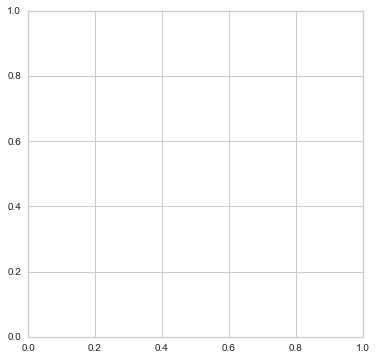

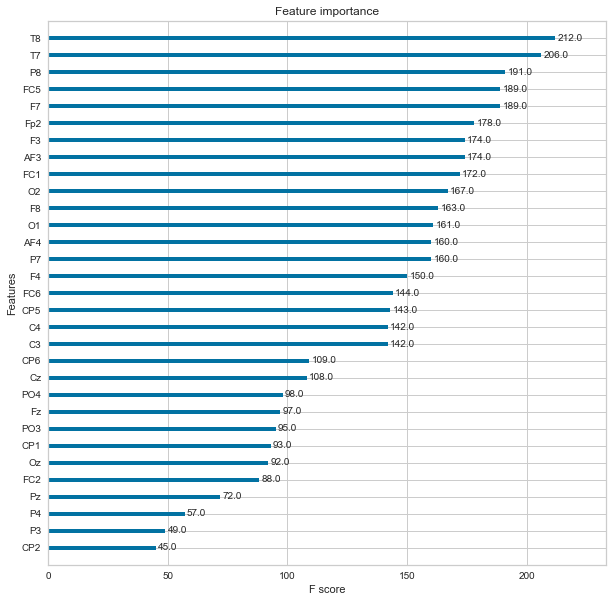

In [31]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

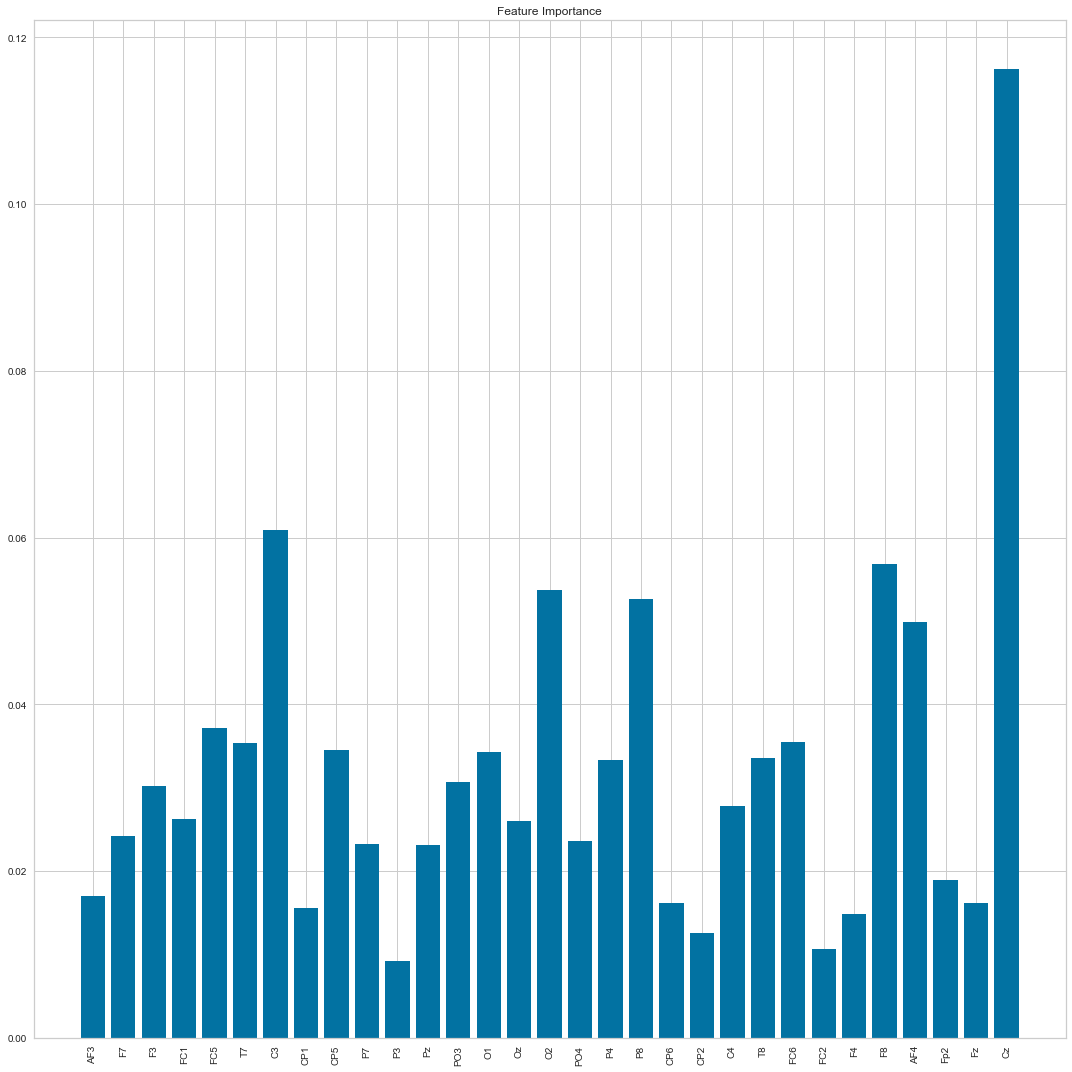

In [32]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

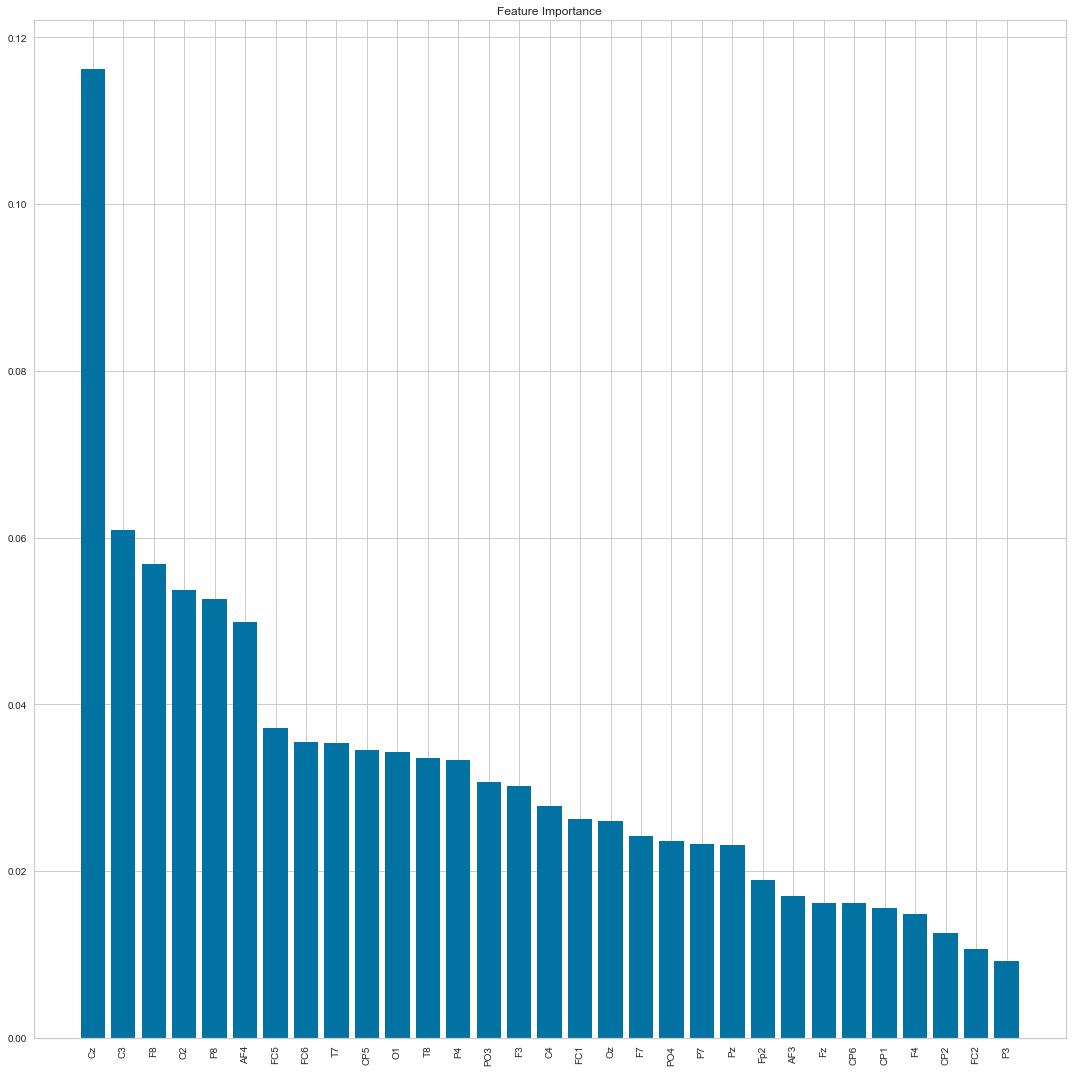

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>KNN Classifier</h2>

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9944058641975309


<h2>n=5 -> 94.80%</h2>

In [35]:
subject = "sub-hc33"
path = f"{os_path}/Healthy/{subject}/"
filename = f"ses-hc/eeg/{subject}_ses-hc_task-rest_eeg.bdf"

EEG_data = mne.io.read_raw_bdf(f"{path}{filename}", preload=True)
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)
raw.crop(tmax=150)
raw = raw.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status'])
std_montage = mne.channels.make_standard_montage('biosemi32')
raw.set_montage(std_montage)

Extracting EDF parameters from C:\Users\utkar\Desktop\Research_Paper\EEG Analysis\Corollary\Parkinsons-EEG-DeepLearning\Parkinson's disease dataset\Healthy\sub-hc33\ses-hc\eeg\sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.1s finished


<RawEDF | sub-hc33_ses-hc_task-rest_eeg.bdf, 32 x 76801 (150.0 s), ~18.8 MB, data loaded>

In [36]:
raw.ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz']

In [37]:
importances

array([0.01700876, 0.02419761, 0.03016463, 0.02627389, 0.03714874,
       0.03539743, 0.06094702, 0.01559334, 0.03448562, 0.02319433,
       0.00924919, 0.02307347, 0.03067731, 0.03423503, 0.02600858,
       0.05376752, 0.02361197, 0.03333309, 0.05260898, 0.01612261,
       0.01251744, 0.02780046, 0.03354643, 0.03550308, 0.01063555,
       0.01486099, 0.05688833, 0.04990366, 0.01887402, 0.01614373,
       0.11622716], dtype=float32)

In [38]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.01700876, 0.02419761, 0.03016463, 0.02627389,
       0.03714874, 0.03539743, 0.06094702, 0.01559334, 0.03448562,
       0.02319433, 0.00924919, 0.02307347, 0.03067731, 0.03423503,
       0.02600858, 0.05376752, 0.02361197, 0.03333309, 0.05260898,
       0.01612261, 0.01251744, 0.02780046, 0.03354643, 0.03550308,
       0.01063555, 0.01486099, 0.05688833, 0.04990366, 0.01887402,
       0.01614373, 0.11622716])

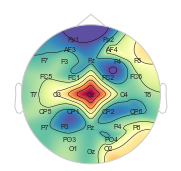

(<matplotlib.image.AxesImage at 0x2ad4d2c7ac0>,
 <matplotlib.contour.QuadContourSet at 0x2ad4d2c7f40>)

In [39]:
fig, ax = plt.subplots(figsize=(3,3))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, show_names=True, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>2. Katz</h2>

In [40]:
katz_pd['Y'] = 1
katz['Y'] = 0

In [41]:
X1 = katz.append(katz_pd).reset_index().drop('index', axis=1)
X = X1.iloc[:,:-1]
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,2.288694,2.261343,1.957151,2.114255,1.901227,2.042649,1.872106,1.760949,1.966785,2.153076,...,2.273533,2.065337,1.798328,1.956942,2.221768,2.133967,1.964263,2.013900,1.824711,0
1,2.271240,1.942415,2.027974,1.843473,1.908158,1.786109,1.800702,1.913688,1.785070,2.119511,...,2.287471,2.135288,1.826597,1.831944,2.061051,2.015384,2.022400,1.804499,1.867882,0
2,1.940628,2.067835,1.866208,2.178841,1.924513,2.013998,1.730977,1.635522,1.859220,2.051848,...,2.288025,2.070668,1.760393,1.797831,2.127728,2.215672,2.149643,1.986197,1.788811,0
3,2.016670,2.138956,1.882197,2.160561,1.754106,1.873918,1.743211,1.568061,1.728979,1.894356,...,2.084844,1.960826,1.592298,1.727301,1.972872,2.114864,1.937659,1.940941,1.984725,0
4,1.941926,1.854944,1.774345,1.909435,2.089550,1.800276,1.731069,1.672566,1.763378,2.024382,...,2.109949,1.831585,1.616957,1.727273,2.070163,1.997455,1.802772,1.836918,2.058511,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,2.105884,1.931786,1.785125,1.911222,1.866587,1.851242,2.014456,2.033359,1.872489,1.917027,...,2.361944,2.021209,1.954975,1.852010,1.979967,2.073413,1.789610,1.765549,1.907884,1
31412,2.034692,1.877924,2.031095,2.055554,1.735893,1.963485,1.707832,1.740751,1.664942,1.698746,...,2.305743,1.914332,1.928771,1.953134,1.856857,1.878968,1.769091,1.913807,1.754775,1
31413,2.049964,1.961412,1.885038,1.969882,1.823174,1.941149,2.113901,1.965771,1.984561,1.948974,...,2.422088,2.076213,1.995753,1.979315,1.988587,2.066007,1.936944,1.977031,1.765201,1
31414,1.960839,2.054216,1.990432,1.977677,1.807211,1.912461,1.879643,1.886140,1.947293,1.782165,...,2.252071,2.080559,2.003303,1.915778,1.892720,1.956484,1.906441,1.931009,1.786607,1


<h2>Pycaret</h2>

In [42]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,7606
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8343,0.9129,0.8659,0.8264,0.8456,0.6670,0.6679,1.6773
lightgbm,Light Gradient Boosting Machine,0.8242,0.9023,0.8600,0.8148,0.8367,0.6465,0.6477,0.1620
knn,K Neighbors Classifier,0.8207,0.9038,0.9378,0.7703,0.8458,0.6366,0.6544,0.8433
et,Extra Trees Classifier,0.8205,0.9051,0.8683,0.8047,0.8352,0.6387,0.6409,0.4427
rf,Random Forest Classifier,0.8147,0.8943,0.8459,0.8092,0.8271,0.6277,0.6285,1.0360
qda,Quadratic Discriminant Analysis,0.8083,0.8921,0.8496,0.7979,0.8229,0.6145,0.6161,0.0320
gbc,Gradient Boosting Classifier,0.7628,0.8443,0.8292,0.7464,0.7856,0.5218,0.5256,1.9127
ada,Ada Boost Classifier,0.7094,0.7770,0.7721,0.7028,0.7358,0.4145,0.4168,0.4300
dt,Decision Tree Classifier,0.6945,0.6936,0.7118,0.7073,0.7095,0.3874,0.3875,0.1293
ridge,Ridge Classifier,0.6802,0.0000,0.7398,0.6790,0.7080,0.3560,0.3576,0.0140


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=7606, reg_alpha=0, ...)

<b>QDA - 78.26<br><b>LGBM - 76.75<br><b>XGboost - 75.90</b>

In [45]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [46]:
import xgboost as xgb
from xgboost import XGBClassifier

In [47]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [48]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,2.261343,1.957151,2.114255,1.901227,2.042649,1.872106,1.760949,1.966785,2.153076,2.089633,...,2.265941,2.273533,2.065337,1.798328,1.956942,2.221768,2.133967,1.964263,2.013900,1.824711
1,1.942415,2.027974,1.843473,1.908158,1.786109,1.800702,1.913688,1.785070,2.119511,1.821740,...,2.231307,2.287471,2.135288,1.826597,1.831944,2.061051,2.015384,2.022400,1.804499,1.867882
2,2.067835,1.866208,2.178841,1.924513,2.013998,1.730977,1.635522,1.859220,2.051848,1.722969,...,2.035051,2.288025,2.070668,1.760393,1.797831,2.127728,2.215672,2.149643,1.986197,1.788811
3,2.138956,1.882197,2.160561,1.754106,1.873918,1.743211,1.568061,1.728979,1.894356,1.716270,...,2.130167,2.084844,1.960826,1.592298,1.727301,1.972872,2.114864,1.937659,1.940941,1.984725
4,1.854944,1.774345,1.909435,2.089550,1.800276,1.731069,1.672566,1.763378,2.024382,1.766127,...,2.100656,2.109949,1.831585,1.616957,1.727273,2.070163,1.997455,1.802772,1.836918,2.058511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.931786,1.785125,1.911222,1.866587,1.851242,2.014456,2.033359,1.872489,1.917027,1.911318,...,2.198273,2.361944,2.021209,1.954975,1.852010,1.979967,2.073413,1.789610,1.765549,1.907884
31412,1.877924,2.031095,2.055554,1.735893,1.963485,1.707832,1.740751,1.664942,1.698746,1.647449,...,1.922369,2.305743,1.914332,1.928771,1.953134,1.856857,1.878968,1.769091,1.913807,1.754775
31413,1.961412,1.885038,1.969882,1.823174,1.941149,2.113901,1.965771,1.984561,1.948974,1.788015,...,2.134953,2.422088,2.076213,1.995753,1.979315,1.988587,2.066007,1.936944,1.977031,1.765201
31414,2.054216,1.990432,1.977677,1.807211,1.912461,1.879643,1.886140,1.947293,1.782165,1.906845,...,2.176257,2.252071,2.080559,2.003303,1.915778,1.892720,1.956484,1.906441,1.931009,1.786607


In [49]:
Y = X1['Y']
Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [50]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.16%


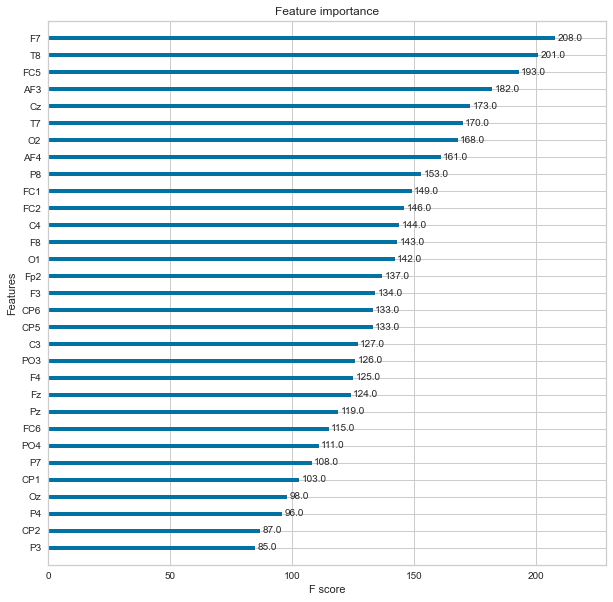

In [51]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

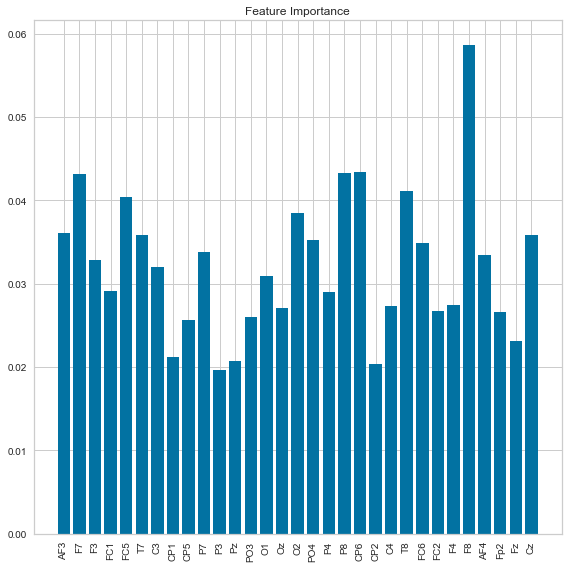

In [52]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

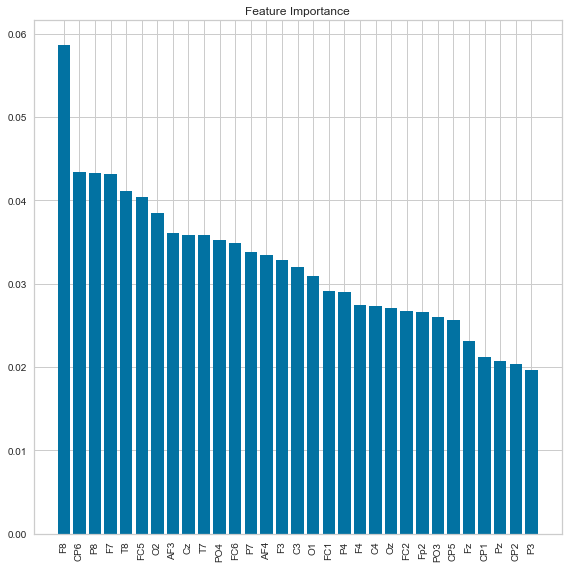

In [53]:
fig, ax = plt.subplots(figsize=(8,8))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [54]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03611819, 0.04314268, 0.03287626, 0.02908285,
       0.04038479, 0.03588657, 0.03203091, 0.02119244, 0.02571023,
       0.03383406, 0.01964185, 0.02073126, 0.02607011, 0.03088668,
       0.02704158, 0.03855132, 0.03521098, 0.02903341, 0.04329684,
       0.04344477, 0.02037606, 0.02738428, 0.04112914, 0.0348385 ,
       0.02677165, 0.02749014, 0.05866292, 0.03350851, 0.0266386 ,
       0.02314391, 0.03588845])

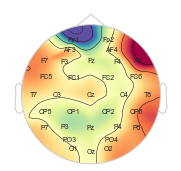

(<matplotlib.image.AxesImage at 0x2ad45420d90>,
 <matplotlib.contour.QuadContourSet at 0x2ad454353a0>)

In [57]:
fig, ax = plt.subplots(figsize=(3,3))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, \
                     show_names=True, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>3. Petrosian</h2>

In [58]:
petrosian_pd['Y'] = 1
petrosian['Y'] = 0

In [59]:
X1 = petrosian.append(petrosian_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.008246,1.007155,1.007883,1.007883,1.006546,1.006546,1.007155,1.007883,1.006911,1.007398,...,1.007033,1.006302,1.006911,1.007033,1.008125,1.007640,1.007761,1.006911,1.007155,0
1,1.008246,1.007033,1.007640,1.007761,1.006668,1.006546,1.006790,1.008246,1.007155,1.007155,...,1.006790,1.006424,1.007033,1.007398,1.007883,1.007398,1.008004,1.006790,1.007033,0
2,1.008004,1.007519,1.007640,1.007640,1.006180,1.006424,1.006668,1.008004,1.006790,1.006790,...,1.006546,1.006180,1.007155,1.006911,1.007883,1.007640,1.007761,1.007033,1.006546,0
3,1.008004,1.007398,1.007761,1.007276,1.006302,1.006668,1.007033,1.008004,1.006790,1.007033,...,1.006790,1.006546,1.006790,1.006790,1.007519,1.007276,1.007519,1.006790,1.006546,0
4,1.007519,1.007276,1.007761,1.007276,1.006302,1.006911,1.007033,1.007883,1.006668,1.007155,...,1.006911,1.006911,1.006790,1.006546,1.007398,1.007155,1.007033,1.006911,1.006424,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.007883,1.007640,1.005325,1.007640,1.006180,1.007640,1.006911,1.007033,1.005570,1.005692,...,1.008971,1.007155,1.005692,1.006911,1.006911,1.006668,1.006424,1.006180,1.005936,1
31412,1.007640,1.007761,1.006058,1.007276,1.006302,1.007276,1.006911,1.007155,1.005814,1.005692,...,1.008729,1.007155,1.005936,1.006546,1.006911,1.006546,1.006302,1.005936,1.005814,1
31413,1.007398,1.007640,1.005936,1.006790,1.006424,1.007155,1.006668,1.007276,1.005814,1.006058,...,1.008971,1.006911,1.005936,1.006424,1.006668,1.006424,1.005814,1.005692,1.006058,1
31414,1.007033,1.007276,1.005814,1.006790,1.006302,1.006790,1.006302,1.007155,1.005447,1.005692,...,1.008971,1.006790,1.005814,1.006302,1.006546,1.006302,1.005570,1.005570,1.006180,1


<h2>Pycaret</h2>

In [60]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,3751
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [61]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9944,0.9998,0.9926,0.9966,0.9946,0.9887,0.9887,0.4620
et,Extra Trees Classifier,0.9724,0.9969,0.9612,0.9859,0.9734,0.9448,0.9452,0.3547
xgboost,Extreme Gradient Boosting,0.9584,0.9926,0.9527,0.9675,0.9600,0.9168,0.9169,0.3747
rf,Random Forest Classifier,0.9565,0.9926,0.9412,0.9749,0.9577,0.9129,0.9136,0.4420
lightgbm,Light Gradient Boosting Machine,0.9329,0.9823,0.9194,0.9509,0.9348,0.8657,0.8663,0.0887
qda,Quadratic Discriminant Analysis,0.8856,0.9557,0.8675,0.9102,0.8882,0.7713,0.7724,0.0313
gbc,Gradient Boosting Classifier,0.8691,0.9408,0.8452,0.8991,0.8712,0.7384,0.7400,0.6013
dt,Decision Tree Classifier,0.8609,0.8606,0.8684,0.8665,0.8674,0.7212,0.7213,0.0433
ada,Ada Boost Classifier,0.7951,0.8751,0.7847,0.8170,0.8004,0.5900,0.5906,0.1587
lda,Linear Discriminant Analysis,0.7591,0.8375,0.7613,0.7752,0.7681,0.5176,0.5178,0.0427


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
knn = create_model('knn', n_neighbors=5, leaf_size=30, p=2, weights='uniform', metric='minkowski', algorithm='auto', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9966,0.9999,0.9948,0.9987,0.9967,0.9932,0.9932
1,0.9932,0.9998,0.9922,0.9948,0.9935,0.9863,0.9863
2,0.9945,0.9999,0.9948,0.9948,0.9948,0.9891,0.9891
3,0.9932,0.9997,0.9935,0.9935,0.9935,0.9863,0.9863
4,0.9918,0.9997,0.9870,0.9974,0.9921,0.9836,0.9837
5,0.9945,0.9999,0.9935,0.9961,0.9948,0.9891,0.9891
6,0.9932,0.9997,0.9909,0.9961,0.9935,0.9863,0.9863
7,0.9945,0.9998,0.9922,0.9974,0.9948,0.9891,0.9891
8,0.9952,0.9998,0.9961,0.9948,0.9954,0.9904,0.9904


<h3>KNN gives highest - 91.17% for k=5</h3>

In [63]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [64]:
#X = X1.iloc[:, :-1]
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.007155,1.007883,1.007883,1.006546,1.006546,1.007155,1.007883,1.006911,1.007398,1.007155,...,1.006058,1.007033,1.006302,1.006911,1.007033,1.008125,1.007640,1.007761,1.006911,1.007155
1,1.007033,1.007640,1.007761,1.006668,1.006546,1.006790,1.008246,1.007155,1.007155,1.007276,...,1.006180,1.006790,1.006424,1.007033,1.007398,1.007883,1.007398,1.008004,1.006790,1.007033
2,1.007519,1.007640,1.007640,1.006180,1.006424,1.006668,1.008004,1.006790,1.006790,1.007398,...,1.005936,1.006546,1.006180,1.007155,1.006911,1.007883,1.007640,1.007761,1.007033,1.006546
3,1.007398,1.007761,1.007276,1.006302,1.006668,1.007033,1.008004,1.006790,1.007033,1.007519,...,1.006302,1.006790,1.006546,1.006790,1.006790,1.007519,1.007276,1.007519,1.006790,1.006546
4,1.007276,1.007761,1.007276,1.006302,1.006911,1.007033,1.007883,1.006668,1.007155,1.007640,...,1.006302,1.006911,1.006911,1.006790,1.006546,1.007398,1.007155,1.007033,1.006911,1.006424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.007640,1.005325,1.007640,1.006180,1.007640,1.006911,1.007033,1.005570,1.005692,1.005447,...,1.006911,1.008971,1.007155,1.005692,1.006911,1.006911,1.006668,1.006424,1.006180,1.005936
31412,1.007761,1.006058,1.007276,1.006302,1.007276,1.006911,1.007155,1.005814,1.005692,1.005814,...,1.007033,1.008729,1.007155,1.005936,1.006546,1.006911,1.006546,1.006302,1.005936,1.005814
31413,1.007640,1.005936,1.006790,1.006424,1.007155,1.006668,1.007276,1.005814,1.006058,1.005570,...,1.007033,1.008971,1.006911,1.005936,1.006424,1.006668,1.006424,1.005814,1.005692,1.006058
31414,1.007276,1.005814,1.006790,1.006302,1.006790,1.006302,1.007155,1.005447,1.005692,1.005936,...,1.006790,1.008971,1.006790,1.005814,1.006302,1.006546,1.006302,1.005570,1.005570,1.006180


In [65]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
31411    1
31412    1
31413    1
31414    1
31415    1
Name: Y, Length: 31416, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [67]:
y_train

24653    1
29813    1
12696    0
23805    1
21325    1
        ..
28636    1
17730    1
28030    1
15725    1
19966    1
Name: Y, Length: 21048, dtype: int64

In [68]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
24653,1.006911,1.007640,1.007033,1.006424,1.007640,1.007398,1.005692,1.005692,1.006058,1.006058,...,1.005202,1.006302,1.007155,1.005447,1.005936,1.007276,1.005936,1.007883,1.006180,1.006058
29813,1.008125,1.006424,1.007398,1.005936,1.006546,1.006790,1.006180,1.005814,1.006302,1.004834,...,1.005570,1.006302,1.005447,1.006546,1.007761,1.005692,1.008004,1.006424,1.006911,1.006180
12696,1.007155,1.007519,1.008488,1.005447,1.006058,1.007155,1.006302,1.008246,1.006790,1.007519,...,1.007033,1.008488,1.006911,1.006790,1.005570,1.006546,1.006911,1.007155,1.004466,1.007276
23805,1.008246,1.008004,1.007155,1.006911,1.007640,1.007883,1.006911,1.007155,1.006180,1.006302,...,1.006058,1.006911,1.007640,1.006790,1.007155,1.007640,1.007640,1.007155,1.007155,1.007155
21325,1.008246,1.007761,1.007640,1.008004,1.007640,1.009453,1.007276,1.007883,1.008246,1.007883,...,1.007761,1.007761,1.008004,1.007761,1.008004,1.008246,1.007761,1.008004,1.008488,1.007155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,1.008004,1.006302,1.006424,1.005936,1.006911,1.007640,1.007640,1.005936,1.006058,1.005447,...,1.006911,1.007519,1.006911,1.007883,1.007519,1.007883,1.007761,1.007276,1.006424,1.007276
17730,1.008246,1.007883,1.007276,1.005936,1.007761,1.008004,1.005814,1.006180,1.006058,1.006424,...,1.006058,1.008609,1.007155,1.005202,1.007519,1.007640,1.009091,1.007883,1.005447,1.005202
28030,1.009091,1.008850,1.008367,1.008125,1.008609,1.009091,1.008246,1.008125,1.008367,1.008125,...,1.008246,1.008367,1.008729,1.009091,1.008367,1.008367,1.009332,1.008971,1.008850,1.008367
15725,1.004834,1.004343,1.004834,1.004957,1.005325,1.005814,1.005447,1.005325,1.004343,1.003851,...,1.004957,1.006180,1.004834,1.004466,1.004466,1.004589,1.004712,1.004097,1.004097,1.005936


In [69]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9869791666666666


<h2>XGBoost</h2>

In [70]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.42%


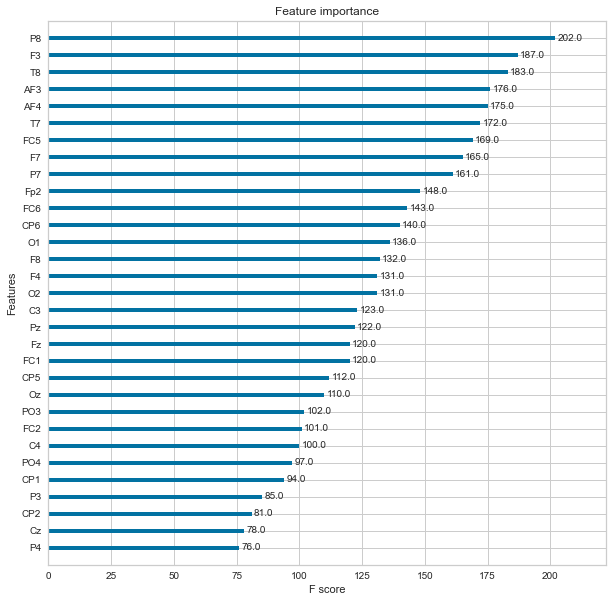

In [71]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

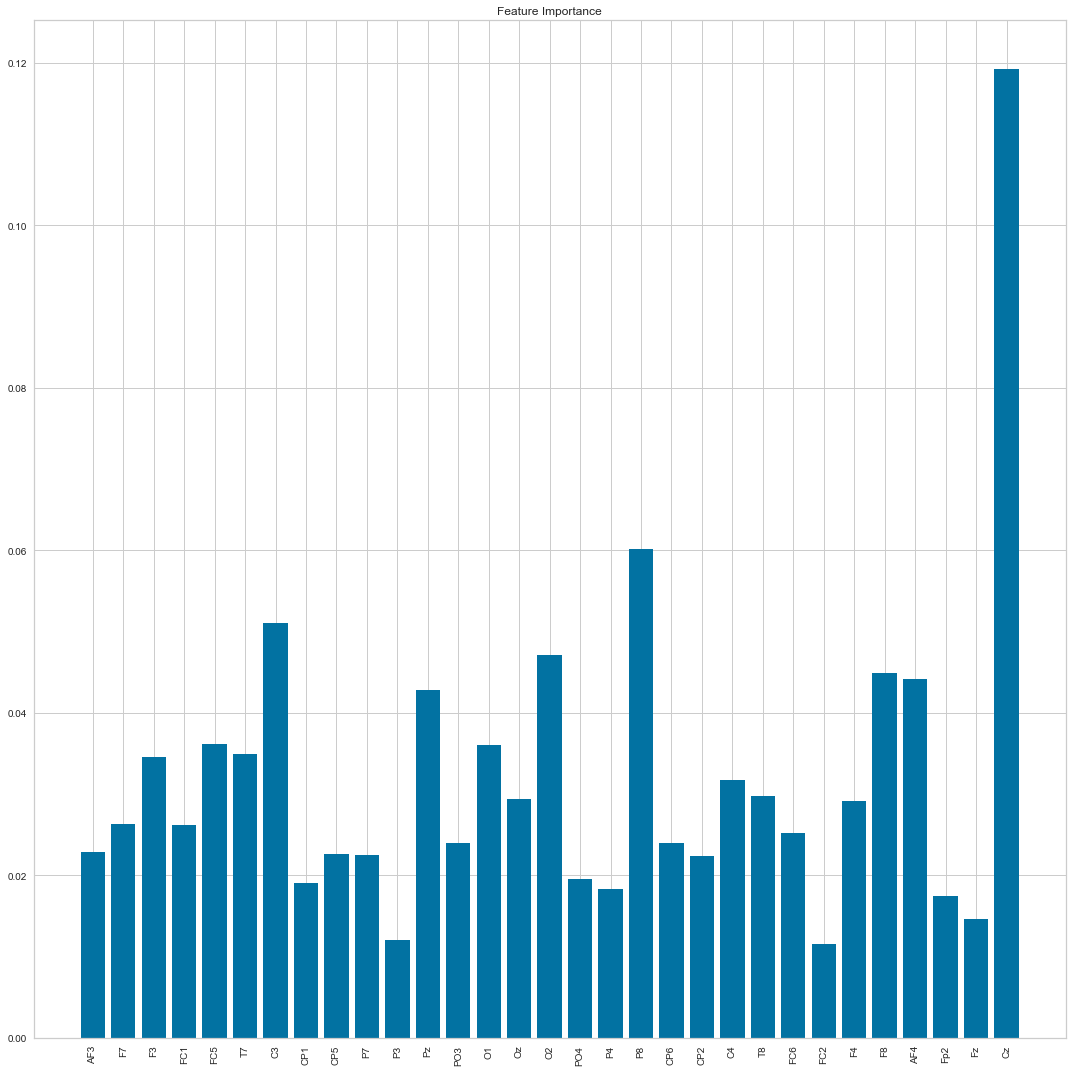

In [72]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

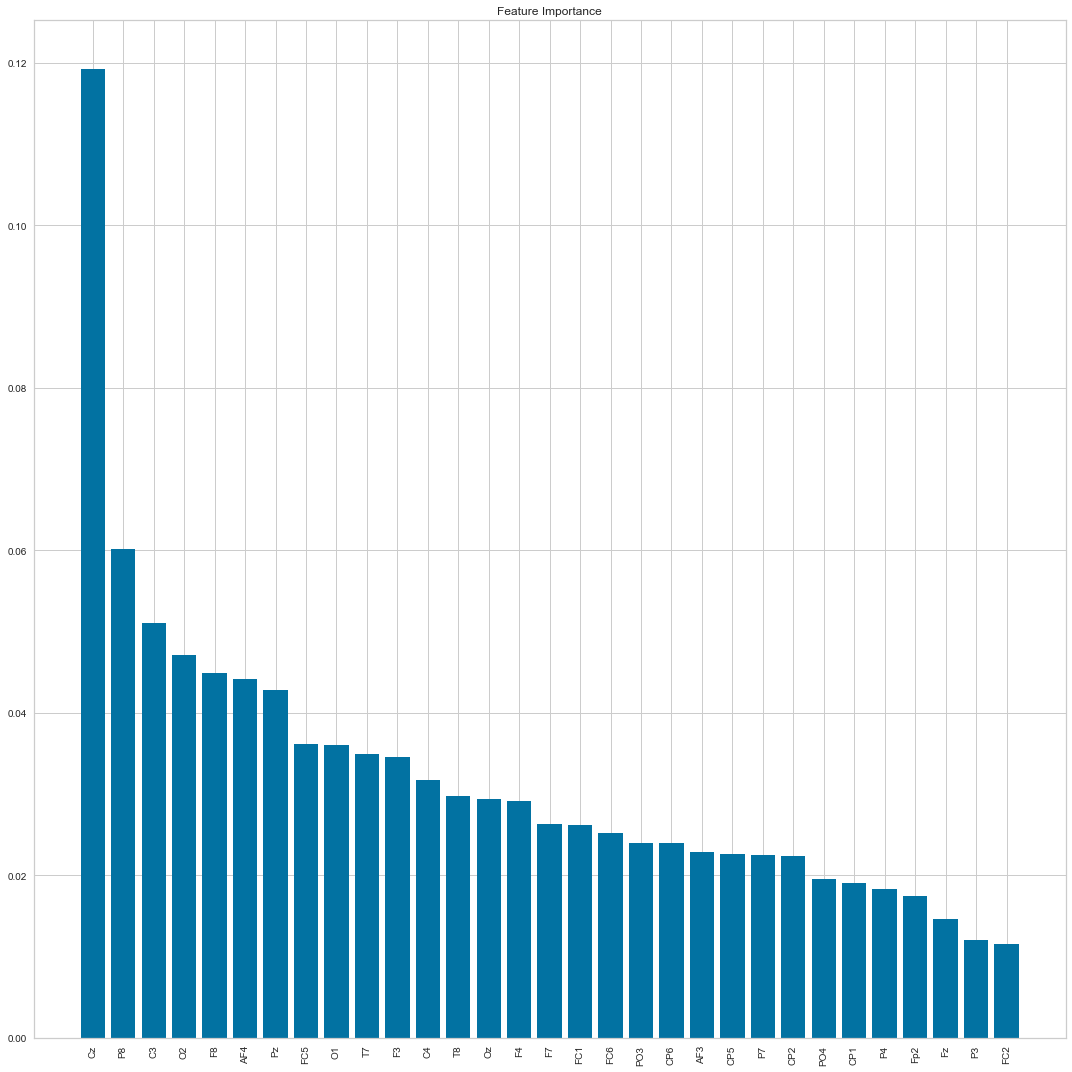

In [73]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [74]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02282773, 0.02634224, 0.03454238, 0.02624075,
       0.0362128 , 0.034985  , 0.05104812, 0.01909392, 0.02258941,
       0.02249693, 0.01206143, 0.04282844, 0.02393664, 0.03603152,
       0.0294034 , 0.04712946, 0.01954725, 0.01835441, 0.06016024,
       0.02391416, 0.0224202 , 0.03172827, 0.02981481, 0.02523981,
       0.01158821, 0.02920428, 0.04484501, 0.04415033, 0.01739196,
       0.01462104, 0.11924985])

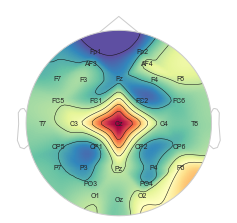

(<matplotlib.image.AxesImage at 0x2ad3fce83d0>,
 <matplotlib.contour.QuadContourSet at 0x2ad3fce86a0>)

In [75]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, show_names=True, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>4. Spectral Entropy</h2>

In [76]:
spec_ent_pd['Y'] = 1
spec_ent['Y'] = 0

In [77]:
X1 = spec_ent.append(spec_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.593967,0.601235,0.498436,0.591953,0.563955,0.563122,0.553224,0.494111,0.429831,0.587258,...,0.613855,0.556259,0.371323,0.439225,0.494452,0.552718,0.523264,0.560992,0.543731,0
1,0.614138,0.607232,0.506640,0.591044,0.566440,0.557145,0.544182,0.473788,0.417434,0.575476,...,0.598543,0.547647,0.430053,0.476861,0.524949,0.578967,0.586756,0.553241,0.537679,0
2,0.603545,0.592898,0.526742,0.554479,0.560185,0.546910,0.520545,0.497092,0.435798,0.576644,...,0.586474,0.567684,0.429973,0.487659,0.504153,0.594890,0.579253,0.569723,0.564027,0
3,0.597484,0.588534,0.542518,0.584253,0.561445,0.565588,0.523113,0.487036,0.409150,0.603123,...,0.600176,0.551018,0.483833,0.451305,0.517955,0.588549,0.574537,0.575964,0.568325,0
4,0.593893,0.606251,0.544915,0.583564,0.555708,0.541626,0.529886,0.517733,0.485719,0.581710,...,0.583697,0.561011,0.546970,0.466231,0.527657,0.590284,0.574503,0.562033,0.546991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,0.535102,0.547017,0.501317,0.525404,0.511222,0.498256,0.531759,0.486050,0.484869,0.450581,...,0.613138,0.553946,0.523587,0.477918,0.509333,0.522364,0.507725,0.521752,0.528271,1
31412,0.538015,0.552424,0.499402,0.527260,0.522223,0.497851,0.488250,0.487559,0.497145,0.456427,...,0.611783,0.556804,0.527201,0.475576,0.509547,0.526026,0.506711,0.521685,0.520391,1
31413,0.536664,0.548055,0.490213,0.518376,0.512761,0.485935,0.483475,0.495131,0.483563,0.459169,...,0.619869,0.549680,0.522616,0.467541,0.514678,0.523608,0.502328,0.519226,0.534516,1
31414,0.512152,0.529756,0.488174,0.526718,0.509740,0.494176,0.499356,0.498925,0.484662,0.469298,...,0.621197,0.542250,0.520810,0.480901,0.501909,0.519345,0.494772,0.512343,0.521845,1


In [78]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,535
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [79]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9696,0.9948,0.9833,0.9598,0.9714,0.9389,0.9393,0.5220
et,Extra Trees Classifier,0.9432,0.9884,0.9385,0.9527,0.9455,0.8863,0.8865,0.4073
xgboost,Extreme Gradient Boosting,0.9372,0.9848,0.9429,0.9379,0.9403,0.8741,0.8742,1.6767
rf,Random Forest Classifier,0.9249,0.9784,0.9185,0.9372,0.9277,0.8495,0.8498,0.9053
lightgbm,Light Gradient Boosting Machine,0.9129,0.9733,0.9167,0.9175,0.9170,0.8254,0.8255,0.1693
qda,Quadratic Discriminant Analysis,0.8497,0.9352,0.9039,0.8262,0.8632,0.6971,0.7007,0.0293
gbc,Gradient Boosting Classifier,0.8442,0.9236,0.8583,0.8470,0.8525,0.6873,0.6876,1.9240
dt,Decision Tree Classifier,0.7985,0.7976,0.8143,0.8044,0.8092,0.5957,0.5959,0.1060
ada,Ada Boost Classifier,0.7675,0.8468,0.7939,0.7704,0.7818,0.5332,0.5337,0.3887
lda,Linear Discriminant Analysis,0.7247,0.7988,0.7506,0.7318,0.7410,0.4472,0.4476,0.0453


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [81]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.601235,0.498436,0.591953,0.563955,0.563122,0.553224,0.494111,0.429831,0.587258,0.571492,...,0.577837,0.613855,0.556259,0.371323,0.439225,0.494452,0.552718,0.523264,0.560992,0.543731
1,0.607232,0.506640,0.591044,0.566440,0.557145,0.544182,0.473788,0.417434,0.575476,0.559509,...,0.560025,0.598543,0.547647,0.430053,0.476861,0.524949,0.578967,0.586756,0.553241,0.537679
2,0.592898,0.526742,0.554479,0.560185,0.546910,0.520545,0.497092,0.435798,0.576644,0.560730,...,0.584703,0.586474,0.567684,0.429973,0.487659,0.504153,0.594890,0.579253,0.569723,0.564027
3,0.588534,0.542518,0.584253,0.561445,0.565588,0.523113,0.487036,0.409150,0.603123,0.567361,...,0.550563,0.600176,0.551018,0.483833,0.451305,0.517955,0.588549,0.574537,0.575964,0.568325
4,0.606251,0.544915,0.583564,0.555708,0.541626,0.529886,0.517733,0.485719,0.581710,0.541070,...,0.560732,0.583697,0.561011,0.546970,0.466231,0.527657,0.590284,0.574503,0.562033,0.546991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,0.547017,0.501317,0.525404,0.511222,0.498256,0.531759,0.486050,0.484869,0.450581,0.443888,...,0.569878,0.613138,0.553946,0.523587,0.477918,0.509333,0.522364,0.507725,0.521752,0.528271
31412,0.552424,0.499402,0.527260,0.522223,0.497851,0.488250,0.487559,0.497145,0.456427,0.445265,...,0.567685,0.611783,0.556804,0.527201,0.475576,0.509547,0.526026,0.506711,0.521685,0.520391
31413,0.548055,0.490213,0.518376,0.512761,0.485935,0.483475,0.495131,0.483563,0.459169,0.442865,...,0.567295,0.619869,0.549680,0.522616,0.467541,0.514678,0.523608,0.502328,0.519226,0.534516
31414,0.529756,0.488174,0.526718,0.509740,0.494176,0.499356,0.498925,0.484662,0.469298,0.463136,...,0.578581,0.621197,0.542250,0.520810,0.480901,0.501909,0.519345,0.494772,0.512343,0.521845


In [82]:
Y = X3['Y']
Y

0        0
1        0
2        0
3        0
4        0
        ..
31411    1
31412    1
31413    1
31414    1
31415    1
Name: Y, Length: 31416, dtype: int64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [84]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
24653,0.594568,0.615369,0.590261,0.569779,0.575686,0.581771,0.516243,0.552403,0.550709,0.565173,...,0.459409,0.573250,0.562156,0.562133,0.569226,0.584907,0.580632,0.605672,0.574717,0.513067
29813,0.625377,0.439492,0.535355,0.546627,0.456332,0.554435,0.440769,0.529639,0.497320,0.406983,...,0.474204,0.437910,0.501986,0.569438,0.587823,0.507423,0.597036,0.577344,0.568402,0.550666
12696,0.489347,0.526136,0.545116,0.405681,0.498796,0.575942,0.515977,0.461782,0.516662,0.564173,...,0.507157,0.475735,0.474908,0.466261,0.453599,0.484167,0.476314,0.514904,0.396092,0.561963
23805,0.582228,0.513555,0.543787,0.445764,0.590265,0.591914,0.400789,0.388999,0.539390,0.535906,...,0.553190,0.573834,0.607255,0.539202,0.542388,0.575198,0.550509,0.534164,0.517628,0.376194
21325,0.607116,0.594689,0.584836,0.489672,0.593473,0.606798,0.590271,0.569818,0.563327,0.561386,...,0.594469,0.581968,0.573802,0.543298,0.529338,0.535531,0.535684,0.539735,0.553355,0.545631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,0.569903,0.522137,0.478490,0.513899,0.450771,0.517014,0.516198,0.492028,0.526503,0.514145,...,0.546600,0.550510,0.552810,0.582290,0.586489,0.554629,0.569163,0.528432,0.551377,0.524344
17730,0.598465,0.548648,0.566352,0.493393,0.511230,0.569989,0.473377,0.483704,0.453980,0.475764,...,0.484926,0.540899,0.450661,0.496049,0.558979,0.505525,0.610592,0.535724,0.497337,0.508224
28030,0.580856,0.532481,0.606536,0.580174,0.566739,0.536983,0.550127,0.591549,0.568839,0.566727,...,0.561421,0.589031,0.574339,0.536369,0.553592,0.580062,0.528166,0.553272,0.549576,0.492316
15725,0.477235,0.474689,0.480206,0.467292,0.529278,0.485329,0.517596,0.469477,0.474154,0.424955,...,0.472164,0.463414,0.461365,0.472932,0.462142,0.453820,0.463930,0.460239,0.458668,0.473462


In [85]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.55%


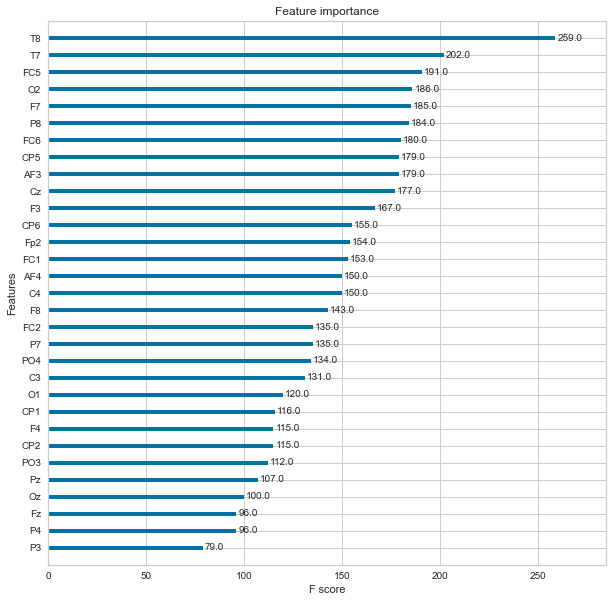

In [86]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

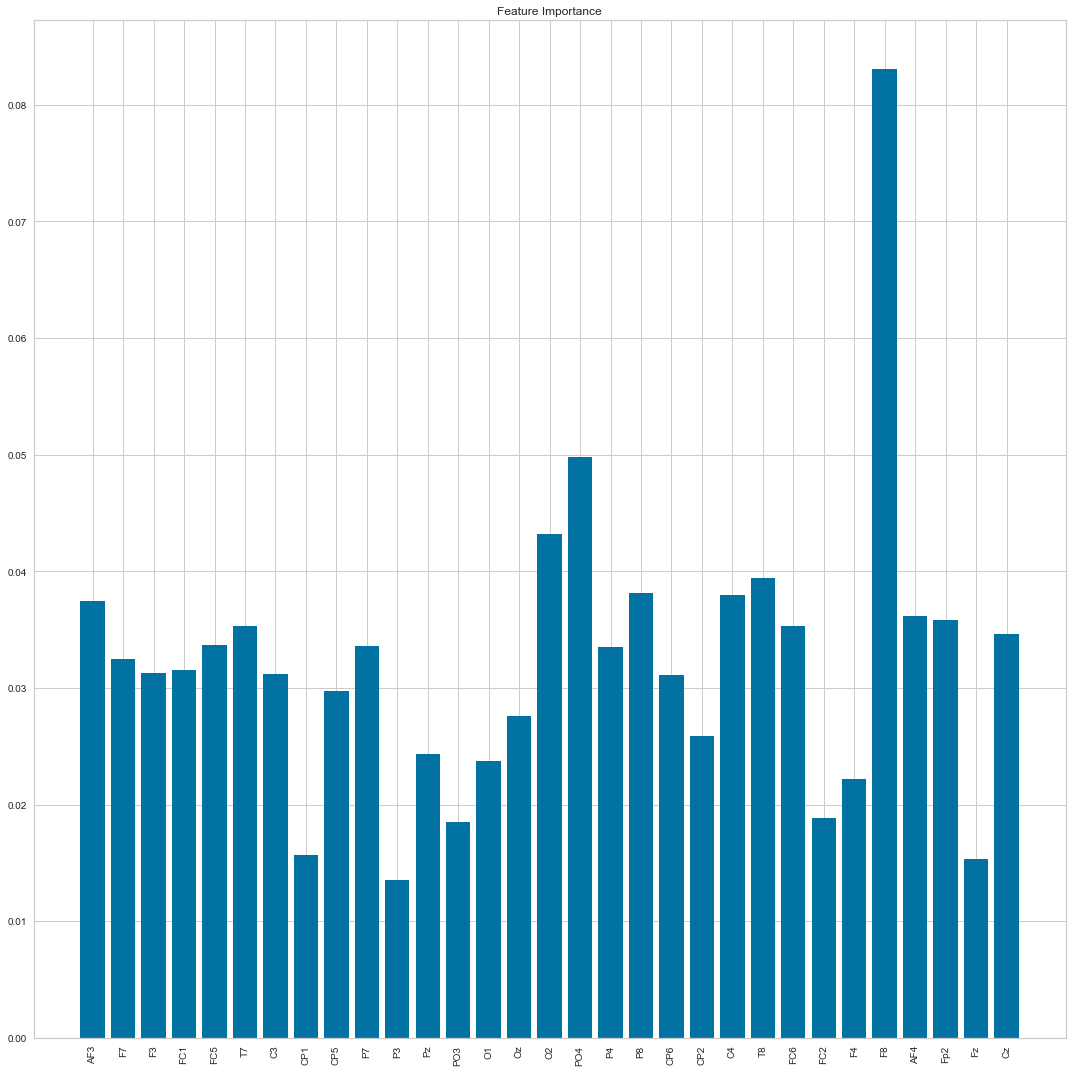

In [87]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

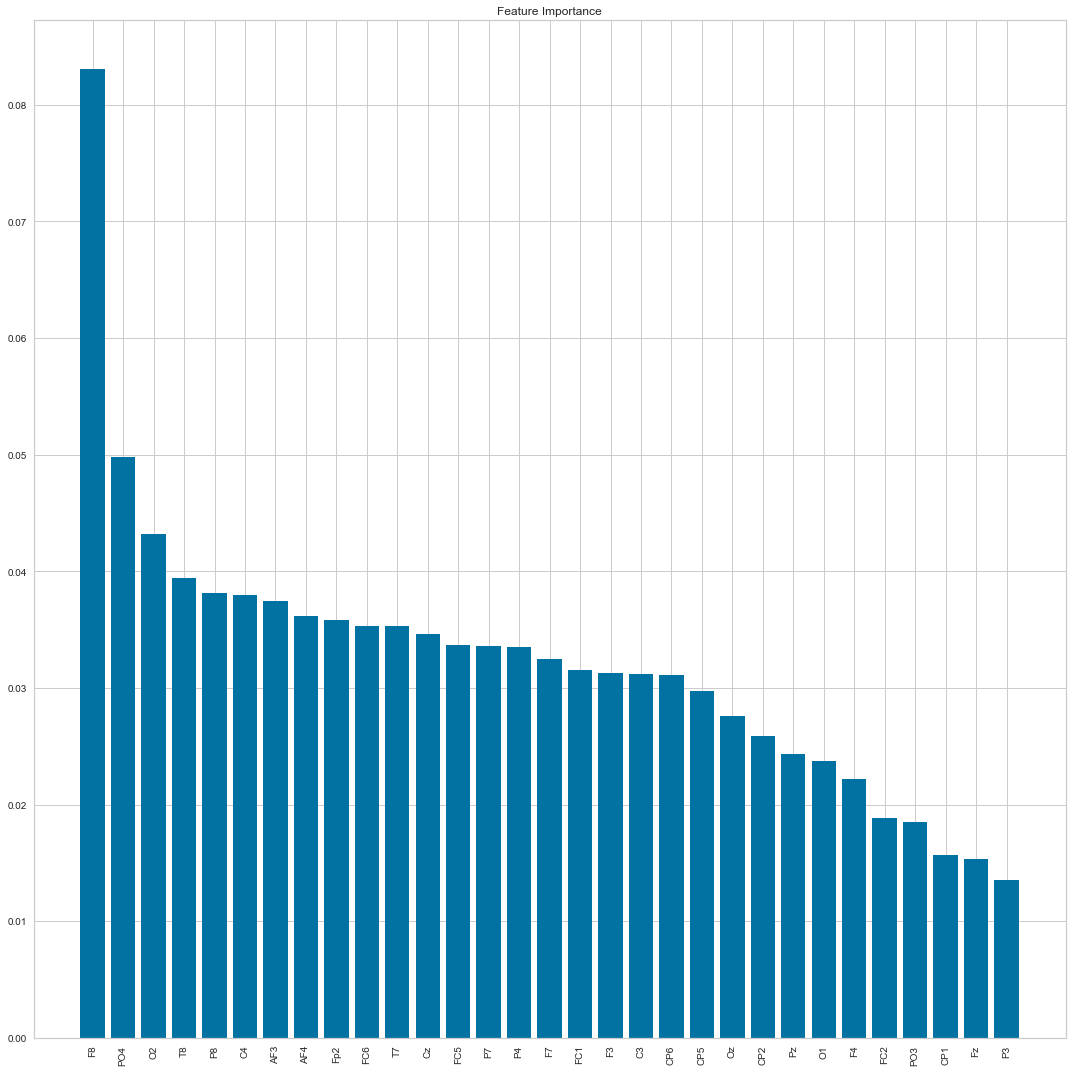

In [88]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [89]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03748538, 0.03244597, 0.0312544 , 0.03153269,
       0.03366806, 0.03530432, 0.03121832, 0.01567511, 0.02976897,
       0.03355822, 0.01349846, 0.02433901, 0.01847501, 0.0237053 ,
       0.02763669, 0.04321418, 0.04976467, 0.03347837, 0.03815277,
       0.03110705, 0.0258792 , 0.03795601, 0.03944122, 0.03531977,
       0.01883027, 0.02216618, 0.08308537, 0.03620107, 0.03586101,
       0.01537394, 0.03460297])

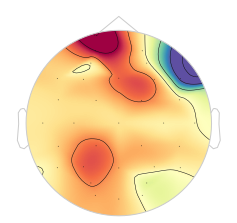

(<matplotlib.image.AxesImage at 0x2ad4413d0a0>,
 <matplotlib.contour.QuadContourSet at 0x2ad4413d400>)

In [90]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>5. Permutation Entropy</h2>

In [91]:
perm_ent_pd['Y'] = 1
perm_ent['Y'] = 0

In [92]:
X1 = perm_ent.append(perm_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.653851,0.627360,0.645523,0.643488,0.609878,0.612827,0.627862,0.645651,0.619856,0.633039,...,0.624846,0.604807,0.621454,0.622621,0.651042,0.638345,0.642443,0.622322,0.627119,0
1,0.654297,0.622920,0.639471,0.640382,0.613473,0.612262,0.617867,0.654224,0.627592,0.627596,...,0.618726,0.607816,0.623577,0.631795,0.645470,0.633832,0.648552,0.618896,0.623855,0
2,0.648503,0.636544,0.639944,0.637357,0.602035,0.608664,0.615517,0.648177,0.617404,0.619040,...,0.613217,0.603204,0.627368,0.620675,0.644206,0.638844,0.641758,0.624919,0.611311,0
3,0.648773,0.632806,0.642671,0.629717,0.604678,0.614617,0.624414,0.647890,0.618342,0.625010,...,0.618313,0.611849,0.616097,0.618576,0.633304,0.630103,0.636296,0.619182,0.612911,0
4,0.636262,0.630430,0.642235,0.628659,0.604159,0.620976,0.623103,0.645244,0.615781,0.627882,...,0.620957,0.620841,0.616797,0.612879,0.629869,0.626783,0.622218,0.621935,0.609994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,0.643994,0.639490,0.580278,0.639832,0.602928,0.638491,0.621825,0.623722,0.584591,0.588264,...,0.671000,0.628035,0.588463,0.622139,0.622374,0.616237,0.608592,0.601141,0.596622,1
31412,0.638498,0.642227,0.600328,0.631442,0.606047,0.628092,0.621318,0.626968,0.590445,0.587609,...,0.665812,0.626904,0.593044,0.612252,0.620111,0.612699,0.605778,0.593453,0.593967,1
31413,0.631785,0.640052,0.597170,0.619405,0.608281,0.625423,0.614860,0.629930,0.590577,0.598062,...,0.671282,0.620763,0.591071,0.609656,0.615310,0.609230,0.593710,0.585933,0.600238,1
31414,0.623586,0.630867,0.593992,0.619230,0.604437,0.618078,0.605539,0.627021,0.580168,0.588484,...,0.671133,0.616818,0.588394,0.606295,0.612971,0.605568,0.585787,0.581723,0.603405,1


In [93]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,5565
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [94]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9940,0.9998,0.9939,0.9947,0.9943,0.9881,0.9881,0.4867
et,Extra Trees Classifier,0.9717,0.9967,0.9596,0.9859,0.9725,0.9434,0.9438,0.4033
xgboost,Extreme Gradient Boosting,0.9520,0.9908,0.9452,0.9623,0.9537,0.9039,0.9041,1.2887
rf,Random Forest Classifier,0.9514,0.9904,0.9351,0.9708,0.9526,0.9028,0.9035,0.8033
lightgbm,Light Gradient Boosting Machine,0.9284,0.9808,0.9136,0.9475,0.9302,0.8568,0.8575,0.1827
qda,Quadratic Discriminant Analysis,0.8774,0.9519,0.8522,0.9074,0.8789,0.7549,0.7565,0.0307
gbc,Gradient Boosting Classifier,0.8673,0.9398,0.8427,0.8971,0.8690,0.7347,0.7363,1.6820
dt,Decision Tree Classifier,0.8522,0.8520,0.8570,0.8598,0.8583,0.7039,0.7040,0.0953
ada,Ada Boost Classifier,0.7921,0.8722,0.7828,0.8124,0.7973,0.5841,0.5846,0.3367
lda,Linear Discriminant Analysis,0.7581,0.8329,0.7578,0.7743,0.7659,0.5157,0.5159,0.0453


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [96]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.627360,0.645523,0.643488,0.609878,0.612827,0.627862,0.645651,0.619856,0.633039,0.626956,...,0.599637,0.624846,0.604807,0.621454,0.622621,0.651042,0.638345,0.642443,0.622322,0.627119
1,0.622920,0.639471,0.640382,0.613473,0.612262,0.617867,0.654224,0.627592,0.627596,0.630097,...,0.602575,0.618726,0.607816,0.623577,0.631795,0.645470,0.633832,0.648552,0.618896,0.623855
2,0.636544,0.639944,0.637357,0.602035,0.608664,0.615517,0.648177,0.617404,0.619040,0.633232,...,0.595977,0.613217,0.603204,0.627368,0.620675,0.644206,0.638844,0.641758,0.624919,0.611311
3,0.632806,0.642671,0.629717,0.604678,0.614617,0.624414,0.647890,0.618342,0.625010,0.636469,...,0.606074,0.618313,0.611849,0.616097,0.618576,0.633304,0.630103,0.636296,0.619182,0.612911
4,0.630430,0.642235,0.628659,0.604159,0.620976,0.623103,0.645244,0.615781,0.627882,0.639411,...,0.606908,0.620957,0.620841,0.616797,0.612879,0.629869,0.626783,0.622218,0.621935,0.609994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,0.639490,0.580278,0.639832,0.602928,0.638491,0.621825,0.623722,0.584591,0.588264,0.583839,...,0.620383,0.671000,0.628035,0.588463,0.622139,0.622374,0.616237,0.608592,0.601141,0.596622
31412,0.642227,0.600328,0.631442,0.606047,0.628092,0.621318,0.626968,0.590445,0.587609,0.594030,...,0.624395,0.665812,0.626904,0.593044,0.612252,0.620111,0.612699,0.605778,0.593453,0.593967
31413,0.640052,0.597170,0.619405,0.608281,0.625423,0.614860,0.629930,0.590577,0.598062,0.585610,...,0.624507,0.671282,0.620763,0.591071,0.609656,0.615310,0.609230,0.593710,0.585933,0.600238
31414,0.630867,0.593992,0.619230,0.604437,0.618078,0.605539,0.627021,0.580168,0.588484,0.597049,...,0.618658,0.671133,0.616818,0.588394,0.606295,0.612971,0.605568,0.585787,0.581723,0.603405


In [97]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
31411    1
31412    1
31413    1
31414    1
31415    1
Name: Y, Length: 31416, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [99]:
y_train

24653    1
29813    1
12696    0
23805    1
21325    1
        ..
28636    1
17730    1
28030    1
15725    1
19966    1
Name: Y, Length: 21048, dtype: int64

In [100]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
24653,0.621825,0.637359,0.622437,0.609101,0.637837,0.631048,0.590378,0.590610,0.598480,0.599500,...,0.576421,0.606366,0.627828,0.583237,0.596424,0.629781,0.597276,0.642674,0.602747,0.599396
29813,0.649195,0.609254,0.632411,0.597114,0.611303,0.612765,0.598168,0.591506,0.606266,0.564992,...,0.585614,0.605935,0.579221,0.612626,0.642864,0.588119,0.648580,0.608571,0.620870,0.600243
12696,0.627725,0.634701,0.657647,0.582331,0.599590,0.625888,0.606056,0.653588,0.618169,0.637293,...,0.624373,0.658418,0.621082,0.618060,0.586062,0.611564,0.621018,0.628361,0.555658,0.629495
23805,0.654224,0.649028,0.627136,0.621602,0.638530,0.644913,0.621868,0.626860,0.599165,0.602428,...,0.599606,0.620441,0.640247,0.616488,0.628507,0.640106,0.639680,0.626212,0.626585,0.628341
21325,0.652915,0.642500,0.640081,0.647361,0.639866,0.681677,0.629484,0.645848,0.653703,0.645892,...,0.642982,0.639949,0.647863,0.642541,0.648979,0.653500,0.640994,0.644246,0.653996,0.626502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,0.646419,0.606585,0.609221,0.596507,0.622452,0.636929,0.637553,0.596100,0.599129,0.583951,...,0.620854,0.635754,0.622297,0.645193,0.635345,0.645591,0.642943,0.631087,0.606812,0.627701
17730,0.653630,0.643778,0.627917,0.596773,0.641338,0.647616,0.591888,0.603000,0.599609,0.608729,...,0.600505,0.661665,0.628240,0.575926,0.631487,0.637845,0.673593,0.646122,0.582344,0.576150
28030,0.673580,0.668121,0.657440,0.650659,0.662891,0.669654,0.652708,0.649668,0.656506,0.649566,...,0.654212,0.657460,0.664997,0.673549,0.654852,0.657286,0.678885,0.666451,0.667377,0.655514
15725,0.566416,0.548101,0.566272,0.569615,0.579340,0.593375,0.584045,0.578933,0.550967,0.535098,...,0.565235,0.602138,0.566683,0.555255,0.556278,0.557176,0.559411,0.544788,0.543080,0.594484


<h2>KNN</h2>

In [101]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9872685185185185


<h2>XGBoost</h2>

In [102]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.14%


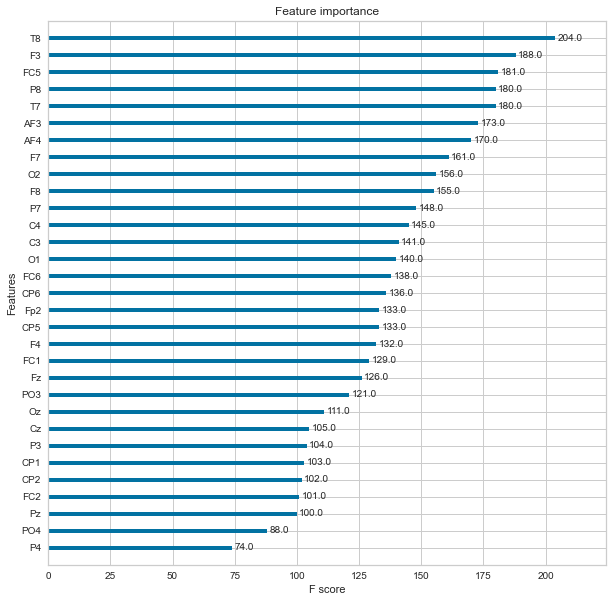

In [103]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

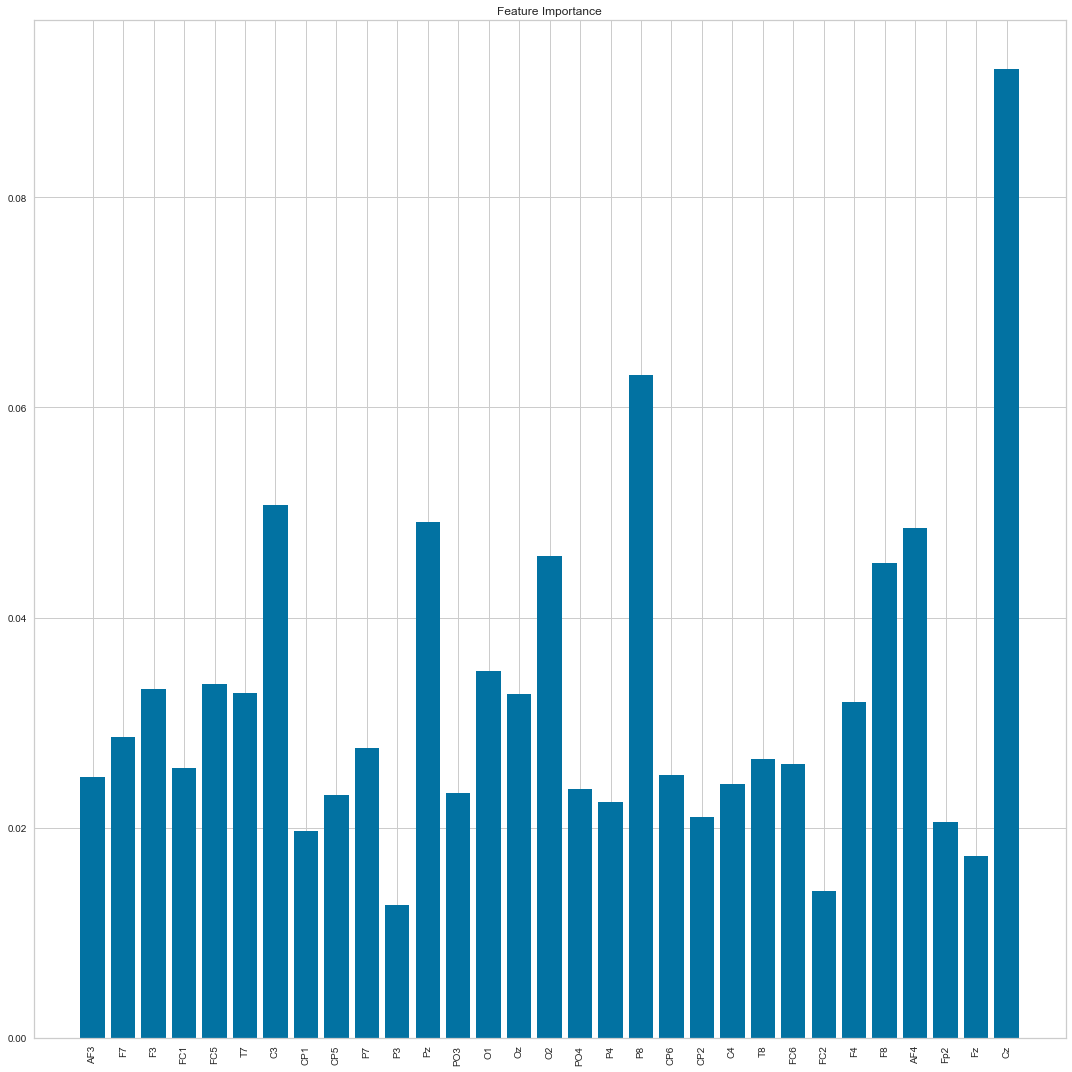

In [104]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

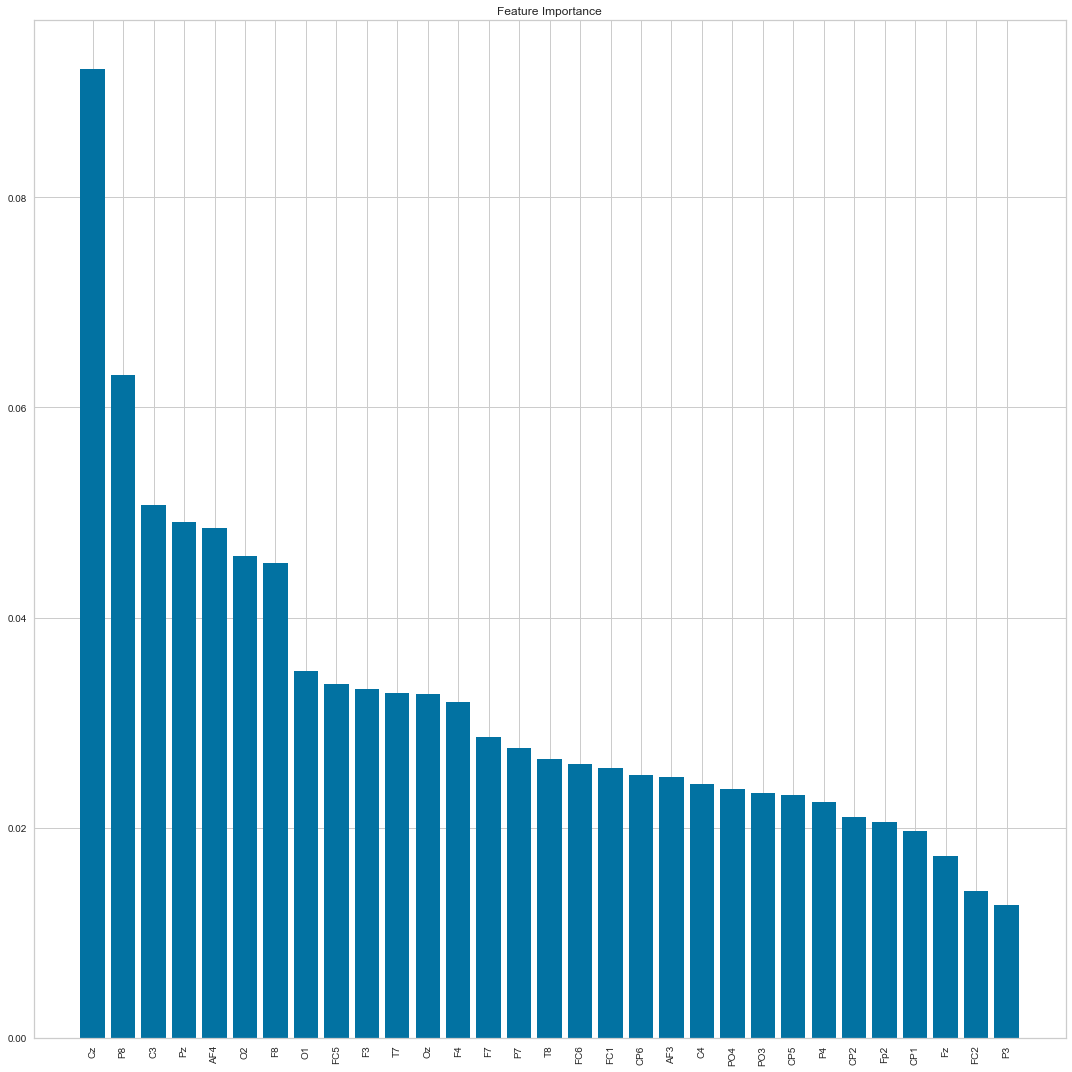

In [105]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [106]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.024809  , 0.02859778, 0.03319039, 0.02568297,
       0.03365113, 0.03281697, 0.05073884, 0.01968202, 0.02315178,
       0.02753563, 0.01268245, 0.0490585 , 0.02327891, 0.03488246,
       0.0326792 , 0.04585877, 0.02369563, 0.02245887, 0.06310891,
       0.02505241, 0.02098987, 0.02412248, 0.02649416, 0.02602636,
       0.0139813 , 0.03197461, 0.04518396, 0.04854833, 0.02055018,
       0.01729674, 0.09221938])

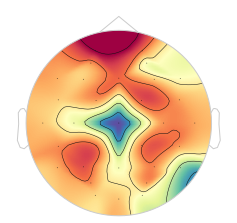

(<matplotlib.image.AxesImage at 0x2ad4da47970>,
 <matplotlib.contour.QuadContourSet at 0x2ad4da47c10>)

In [107]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h1>6. Spectral value Decomposition Entropy</h1>

In [108]:
svd_ent_pd['Y'] = 1
svd_ent['Y'] = 0

In [109]:
X1 = svd_ent.append(svd_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.458908,0.434869,0.340702,0.386782,0.365884,0.406409,0.351328,0.261940,0.284195,0.438961,...,0.470504,0.379502,0.268096,0.302053,0.422935,0.424511,0.366348,0.368851,0.346873,0
1,0.451221,0.414923,0.333681,0.400294,0.382259,0.401564,0.351616,0.244627,0.282746,0.449121,...,0.457795,0.395324,0.266374,0.315600,0.413950,0.428986,0.410144,0.376822,0.350924,0
2,0.442712,0.405934,0.358528,0.414467,0.378981,0.403102,0.354399,0.263503,0.292610,0.446254,...,0.447096,0.390877,0.260363,0.304534,0.423262,0.433876,0.421878,0.373819,0.349290,0
3,0.443365,0.405043,0.397247,0.411909,0.373343,0.402101,0.362022,0.297858,0.306358,0.446022,...,0.452488,0.400232,0.281295,0.288024,0.426370,0.448459,0.427499,0.372182,0.351973,0
4,0.427519,0.416873,0.382063,0.425301,0.385304,0.405295,0.371534,0.352647,0.328541,0.445981,...,0.462046,0.425562,0.325038,0.280174,0.424157,0.400534,0.405728,0.356408,0.380610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,0.426737,0.386440,0.355278,0.391680,0.345785,0.365751,0.377506,0.312071,0.350744,0.338818,...,0.526423,0.408071,0.344942,0.327153,0.366753,0.372729,0.349138,0.348855,0.327931,1
31412,0.413442,0.386828,0.363758,0.382504,0.340986,0.354322,0.373816,0.325424,0.380766,0.346549,...,0.531966,0.401510,0.352280,0.315852,0.362566,0.373248,0.343578,0.344399,0.342816,1
31413,0.411477,0.387859,0.361936,0.378916,0.349416,0.363834,0.373632,0.325861,0.380687,0.347404,...,0.535919,0.398389,0.352305,0.318847,0.366708,0.369939,0.346098,0.344295,0.347714,1
31414,0.376722,0.368527,0.315015,0.367529,0.353491,0.307580,0.304171,0.336031,0.364281,0.309294,...,0.516294,0.364558,0.360230,0.320408,0.331749,0.346275,0.321614,0.349506,0.346797,1


In [110]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,2114
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [111]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9981,0.9998,0.9977,0.9986,0.9982,0.9962,0.9962,0.3547
et,Extra Trees Classifier,0.9970,0.9999,0.9959,0.9984,0.9971,0.9940,0.9940,0.3353
xgboost,Extreme Gradient Boosting,0.9931,0.9998,0.9942,0.9926,0.9934,0.9861,0.9862,1.5473
rf,Random Forest Classifier,0.9908,0.9996,0.9896,0.9928,0.9912,0.9815,0.9815,0.8247
lightgbm,Light Gradient Boosting Machine,0.9858,0.9991,0.9869,0.9860,0.9865,0.9716,0.9716,0.1613
qda,Quadratic Discriminant Analysis,0.9453,0.9821,0.9451,0.9502,0.9476,0.8904,0.8905,0.0293
dt,Decision Tree Classifier,0.9391,0.9390,0.9398,0.9438,0.9417,0.8779,0.8780,0.0960
gbc,Gradient Boosting Classifier,0.9309,0.9816,0.9327,0.9353,0.9340,0.8616,0.8616,1.7693
ada,Ada Boost Classifier,0.8558,0.9292,0.8758,0.8529,0.8641,0.7105,0.7109,0.3760
ridge,Ridge Classifier,0.7839,0.0000,0.7989,0.7908,0.7948,0.5666,0.5668,0.0140


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [112]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9993,1.0000,0.9987,1.0000,0.9993,0.9986,0.9986
1,0.9973,1.0000,0.9961,0.9987,0.9974,0.9945,0.9945
2,0.9959,0.9992,0.9961,0.9961,0.9961,0.9918,0.9918
3,0.9973,0.9987,0.9948,1.0000,0.9974,0.9945,0.9945
4,0.9980,1.0000,0.9987,0.9974,0.9980,0.9959,0.9959
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9980,1.0000,0.9974,0.9987,0.9980,0.9959,0.9959
7,0.9980,1.0000,0.9974,0.9987,0.9980,0.9959,0.9959
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


<h2> KNN giving 99.75% accuracy </h2>

In [113]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9945,0.9999,0.9948,0.9948,0.9948,0.9891,0.9891
1,0.9939,0.9998,0.9961,0.9922,0.9942,0.9877,0.9877
2,0.9939,0.9999,0.9935,0.9948,0.9941,0.9877,0.9877
3,0.9925,0.9998,0.9909,0.9948,0.9928,0.9850,0.9850
4,0.9932,0.9997,0.9961,0.9909,0.9935,0.9863,0.9863
5,0.9939,0.9999,0.9948,0.9935,0.9941,0.9877,0.9877
6,0.9939,0.9997,0.9896,0.9987,0.9941,0.9877,0.9877
7,0.9939,0.9999,0.9961,0.9922,0.9942,0.9877,0.9877
8,0.9925,0.9999,0.9987,0.9871,0.9929,0.9850,0.9850


In [114]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [115]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.434869,0.340702,0.386782,0.365884,0.406409,0.351328,0.261940,0.284195,0.438961,0.354649,...,0.435934,0.470504,0.379502,0.268096,0.302053,0.422935,0.424511,0.366348,0.368851,0.346873
1,0.414923,0.333681,0.400294,0.382259,0.401564,0.351616,0.244627,0.282746,0.449121,0.370914,...,0.435363,0.457795,0.395324,0.266374,0.315600,0.413950,0.428986,0.410144,0.376822,0.350924
2,0.405934,0.358528,0.414467,0.378981,0.403102,0.354399,0.263503,0.292610,0.446254,0.382962,...,0.429538,0.447096,0.390877,0.260363,0.304534,0.423262,0.433876,0.421878,0.373819,0.349290
3,0.405043,0.397247,0.411909,0.373343,0.402101,0.362022,0.297858,0.306358,0.446022,0.404536,...,0.429794,0.452488,0.400232,0.281295,0.288024,0.426370,0.448459,0.427499,0.372182,0.351973
4,0.416873,0.382063,0.425301,0.385304,0.405295,0.371534,0.352647,0.328541,0.445981,0.431712,...,0.431816,0.462046,0.425562,0.325038,0.280174,0.424157,0.400534,0.405728,0.356408,0.380610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,0.386440,0.355278,0.391680,0.345785,0.365751,0.377506,0.312071,0.350744,0.338818,0.319768,...,0.428702,0.526423,0.408071,0.344942,0.327153,0.366753,0.372729,0.349138,0.348855,0.327931
31412,0.386828,0.363758,0.382504,0.340986,0.354322,0.373816,0.325424,0.380766,0.346549,0.327408,...,0.432879,0.531966,0.401510,0.352280,0.315852,0.362566,0.373248,0.343578,0.344399,0.342816
31413,0.387859,0.361936,0.378916,0.349416,0.363834,0.373632,0.325861,0.380687,0.347404,0.330016,...,0.433586,0.535919,0.398389,0.352305,0.318847,0.366708,0.369939,0.346098,0.344295,0.347714
31414,0.368527,0.315015,0.367529,0.353491,0.307580,0.304171,0.336031,0.364281,0.309294,0.304514,...,0.413915,0.516294,0.364558,0.360230,0.320408,0.331749,0.346275,0.321614,0.349506,0.346797


In [116]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
31411    1
31412    1
31413    1
31414    1
31415    1
Name: Y, Length: 31416, dtype: int64

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [118]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
24653,0.449578,0.514429,0.466572,0.433468,0.474344,0.430080,0.427110,0.409751,0.418394,0.428232,...,0.379001,0.440380,0.437282,0.422301,0.435517,0.478109,0.430994,0.457533,0.424031,0.421515
29813,0.511437,0.328213,0.401973,0.332996,0.336947,0.412725,0.324592,0.380943,0.357382,0.316352,...,0.345564,0.336495,0.361731,0.426210,0.446461,0.353781,0.492992,0.404771,0.346514,0.391918
12696,0.393107,0.392786,0.430443,0.299973,0.357668,0.461835,0.367009,0.379797,0.403223,0.461783,...,0.385182,0.400762,0.337016,0.363665,0.322147,0.365732,0.359452,0.356107,0.300158,0.404531
23805,0.450208,0.402438,0.444163,0.360377,0.459556,0.462319,0.256163,0.274462,0.382005,0.375221,...,0.400500,0.432643,0.465917,0.385513,0.412346,0.441018,0.420432,0.419060,0.407704,0.293649
21325,0.495845,0.476705,0.454249,0.392894,0.530767,0.509343,0.455354,0.429266,0.462721,0.424571,...,0.472889,0.430765,0.496679,0.454658,0.437529,0.441096,0.468472,0.472315,0.451764,0.349024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,0.484603,0.394525,0.404703,0.372165,0.309919,0.386646,0.394592,0.334973,0.349893,0.362916,...,0.434433,0.437436,0.425982,0.435142,0.522793,0.442801,0.485199,0.421993,0.415329,0.374347
17730,0.501782,0.432689,0.441596,0.360998,0.422600,0.460021,0.353360,0.331808,0.291546,0.313619,...,0.331422,0.444071,0.341047,0.371654,0.451111,0.426642,0.545194,0.436312,0.366446,0.345999
28030,0.571459,0.506536,0.549334,0.492960,0.544237,0.573178,0.554164,0.480010,0.569246,0.485587,...,0.470816,0.492158,0.479183,0.503524,0.507620,0.513392,0.496207,0.513851,0.516866,0.473537
15725,0.347891,0.341777,0.362092,0.337435,0.388133,0.360428,0.389911,0.326473,0.331498,0.302070,...,0.350452,0.366731,0.356259,0.352734,0.347754,0.333973,0.345224,0.343916,0.339695,0.326645


<h2>KNN</h2>

In [119]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9932484567901234


<h2>XGBoost</h2>


In [120]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.03%


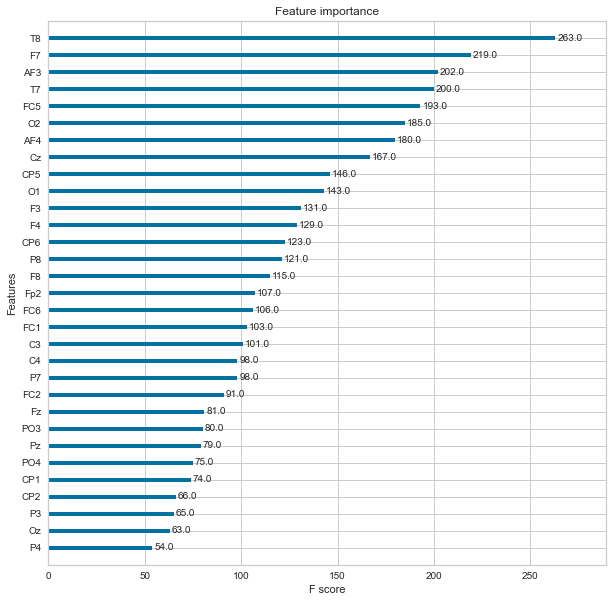

In [121]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

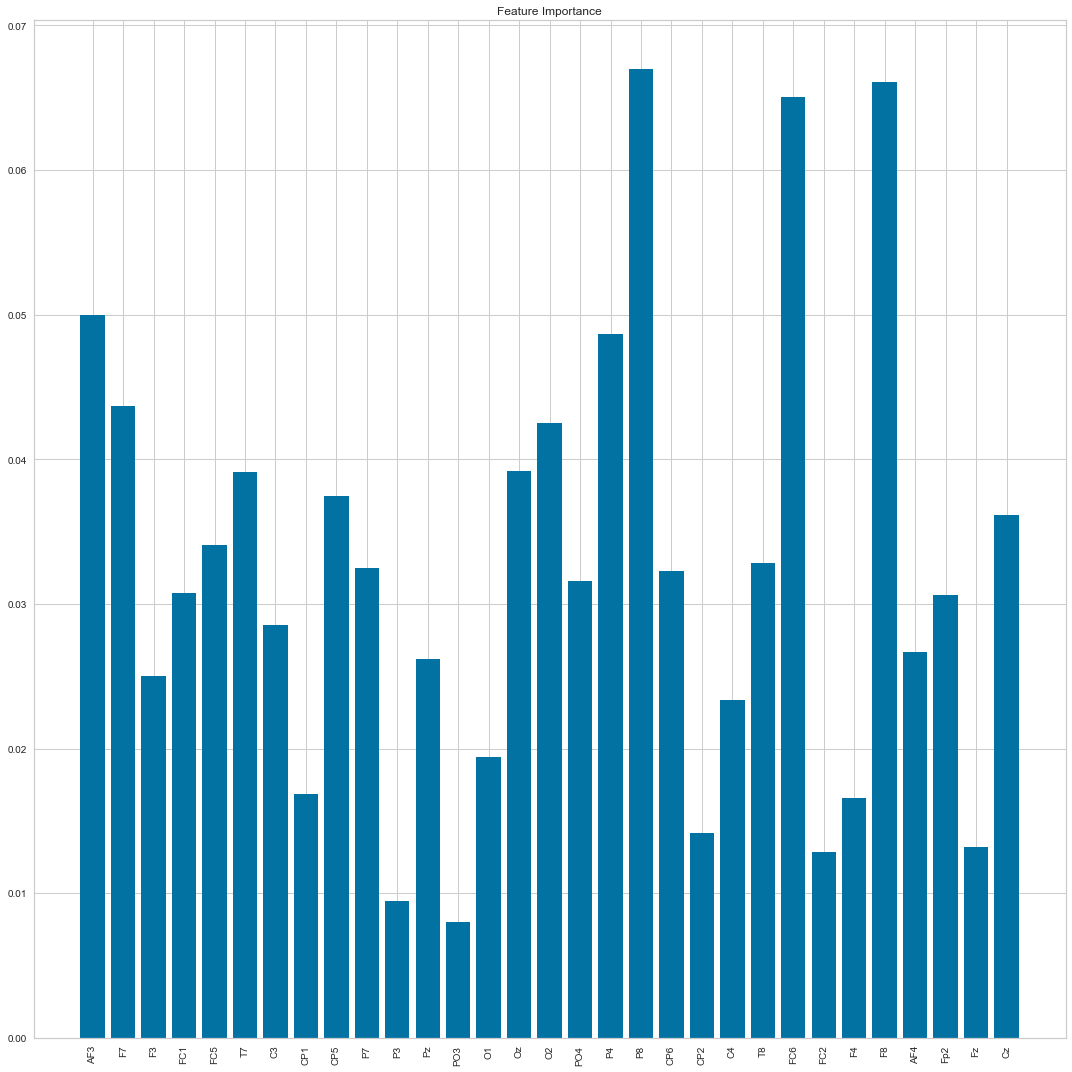

In [122]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

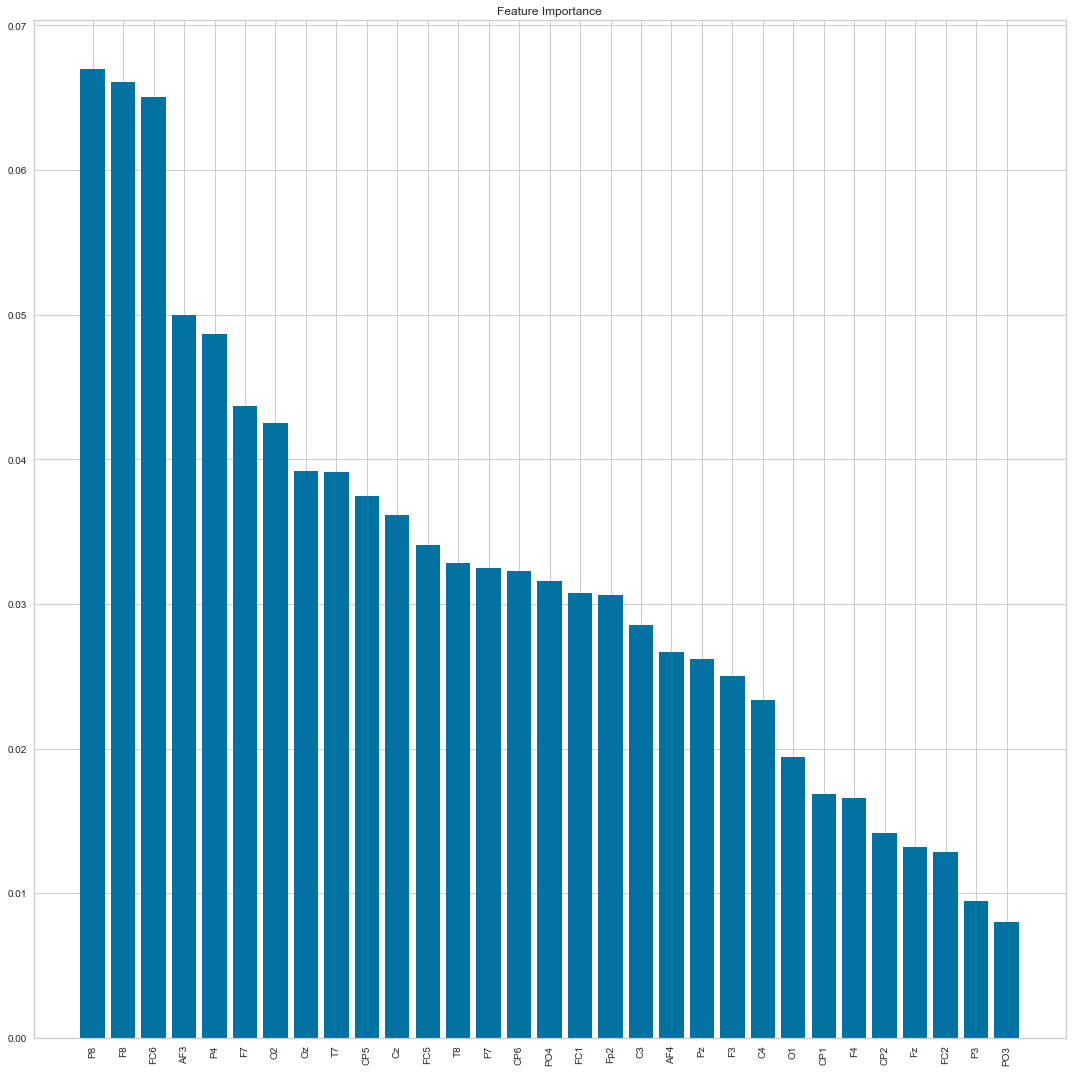

In [123]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [124]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.04998432, 0.04371757, 0.02504491, 0.03075191,
       0.0340594 , 0.03914567, 0.02855609, 0.01685733, 0.037437  ,
       0.03250097, 0.0094384 , 0.02618632, 0.007996  , 0.01942673,
       0.0392225 , 0.04252306, 0.03157569, 0.04865227, 0.06699781,
       0.03227504, 0.01417131, 0.02338083, 0.03282944, 0.06508576,
       0.01285259, 0.01657679, 0.06609411, 0.02671108, 0.03060255,
       0.01320967, 0.03613682])

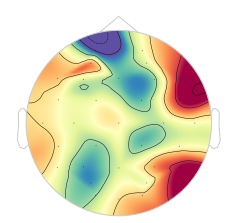

(<matplotlib.image.AxesImage at 0x2ad45ff5ee0>,
 <matplotlib.contour.QuadContourSet at 0x2ad45ff31c0>)

In [125]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>7. Approximate Entropy</h2>

In [126]:
app_ent_pd['Y'] = 1
app_ent['Y'] = 0

In [127]:
X1 = app_ent.append(app_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.608399,0.592641,0.499266,0.590276,0.541234,0.547793,0.526568,0.440637,0.428584,0.590560,...,0.611423,0.573341,0.390734,0.499534,0.586011,0.575989,0.573572,0.564809,0.520519,0
1,0.612127,0.575712,0.501814,0.574655,0.526315,0.532914,0.504102,0.431733,0.434503,0.583169,...,0.611636,0.566332,0.394060,0.498518,0.576815,0.577422,0.599860,0.536493,0.520509,0
2,0.598262,0.573636,0.526803,0.580620,0.516986,0.541781,0.497811,0.422138,0.449770,0.579532,...,0.604212,0.538910,0.376080,0.465711,0.589777,0.580878,0.588510,0.523997,0.518797,0
3,0.595707,0.562079,0.540473,0.568735,0.515643,0.536079,0.519471,0.475700,0.474518,0.592080,...,0.607388,0.550898,0.410824,0.428255,0.565751,0.594195,0.586411,0.527057,0.520588,0
4,0.566543,0.568753,0.520980,0.567246,0.527861,0.534045,0.518571,0.542767,0.503279,0.598884,...,0.612203,0.563076,0.515210,0.407216,0.579116,0.551464,0.564179,0.512798,0.543995,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,0.610626,0.536774,0.516713,0.553578,0.532969,0.543047,0.560032,0.507509,0.505482,0.480700,...,0.558271,0.544668,0.538468,0.518900,0.533795,0.556619,0.521884,0.503268,0.500044,1
31412,0.590589,0.529383,0.535776,0.535025,0.528969,0.535422,0.551932,0.500042,0.534822,0.490737,...,0.586543,0.530439,0.528780,0.488496,0.532626,0.567276,0.512164,0.491006,0.543074,1
31413,0.582026,0.527088,0.533144,0.538969,0.531679,0.525019,0.549411,0.505467,0.545188,0.496140,...,0.596063,0.536164,0.519093,0.490355,0.538128,0.565157,0.506568,0.480406,0.559935,1
31414,0.535705,0.512478,0.463604,0.535651,0.522449,0.465983,0.461039,0.510331,0.540590,0.450683,...,0.594629,0.517025,0.520454,0.490846,0.491639,0.525878,0.488513,0.503223,0.555112,1


In [128]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,5402
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [129]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9829,0.9981,0.9879,0.9796,0.9837,0.9656,0.9657,0.6047
et,Extra Trees Classifier,0.9545,0.9923,0.9500,0.9627,0.9563,0.9088,0.9089,0.4613
xgboost,Extreme Gradient Boosting,0.9354,0.9842,0.9394,0.9376,0.9384,0.8704,0.8706,1.8333
rf,Random Forest Classifier,0.9264,0.9802,0.9155,0.9426,0.9288,0.8527,0.8532,0.9233
lightgbm,Light Gradient Boosting Machine,0.9100,0.9715,0.9124,0.9157,0.9140,0.8196,0.8197,0.1713
gbc,Gradient Boosting Classifier,0.8385,0.9182,0.8410,0.8495,0.8452,0.6764,0.6765,2.1527
dt,Decision Tree Classifier,0.8137,0.8134,0.8193,0.8243,0.8217,0.6265,0.6267,0.1007
qda,Quadratic Discriminant Analysis,0.7926,0.8992,0.9139,0.7472,0.8221,0.5795,0.5967,0.0293
ada,Ada Boost Classifier,0.7720,0.8521,0.7912,0.7779,0.7844,0.5426,0.5428,0.4173
ridge,Ridge Classifier,0.6980,0.0000,0.7282,0.7054,0.7165,0.3935,0.3939,0.0140


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [130]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9836,0.9990,0.9883,0.9806,0.9845,0.9672,0.9672
1,0.9823,0.9984,0.9805,0.9856,0.9831,0.9645,0.9645
2,0.9782,0.9982,0.9844,0.9743,0.9793,0.9562,0.9563
3,0.9789,0.9982,0.9844,0.9755,0.9799,0.9576,0.9576
4,0.9823,0.9976,0.9857,0.9806,0.9831,0.9644,0.9644
5,0.9802,0.9970,0.9857,0.9768,0.9812,0.9603,0.9604
6,0.9864,0.9981,0.9935,0.9807,0.9871,0.9726,0.9727
7,0.9857,0.9984,0.9935,0.9795,0.9864,0.9713,0.9714
8,0.9850,0.9987,0.9870,0.9844,0.9857,0.9699,0.9699


In [131]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9980,0.9979,0.9987,0.9974,0.9981,0.9959,0.9959
1,0.9966,0.9966,0.9961,0.9974,0.9967,0.9932,0.9932
2,0.9952,0.9952,0.9948,0.9961,0.9954,0.9904,0.9904
3,0.9925,0.9923,0.9961,0.9897,0.9929,0.9850,0.9850
4,0.9966,0.9966,0.9961,0.9974,0.9967,0.9932,0.9932
5,0.9939,0.9935,1.0000,0.9884,0.9942,0.9877,0.9878
6,0.9966,0.9966,0.9961,0.9974,0.9967,0.9932,0.9932
7,0.9932,0.9932,0.9935,0.9935,0.9935,0.9863,0.9863
8,0.9945,0.9946,0.9935,0.9961,0.9948,0.9891,0.9891


In [132]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [133]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='distance')


In [134]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9373,0.9817,0.9389,0.9413,0.9401,0.8743,0.8743
1,0.9338,0.9837,0.9181,0.9541,0.9357,0.8676,0.8683
2,0.9277,0.9800,0.9428,0.9212,0.9319,0.8549,0.8551
3,0.9345,0.9828,0.9350,0.9399,0.9374,0.8687,0.8688
4,0.9434,0.9847,0.9506,0.9420,0.9463,0.8864,0.8865
5,0.9407,0.9854,0.9480,0.9394,0.9437,0.8810,0.8810
6,0.9400,0.9860,0.9350,0.9498,0.9423,0.8798,0.8799
7,0.9229,0.9838,0.9337,0.9205,0.9270,0.8454,0.8454
8,0.9379,0.9874,0.9336,0.9472,0.9403,0.8757,0.8758


In [135]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [137]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9690393518518519


In [138]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.42%


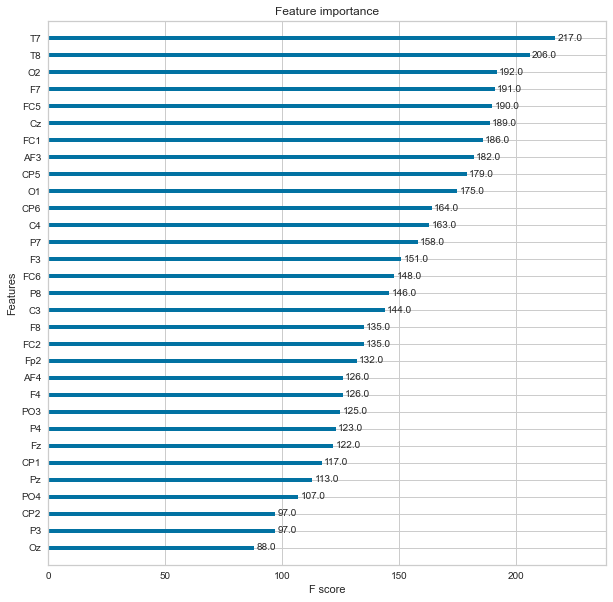

In [139]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

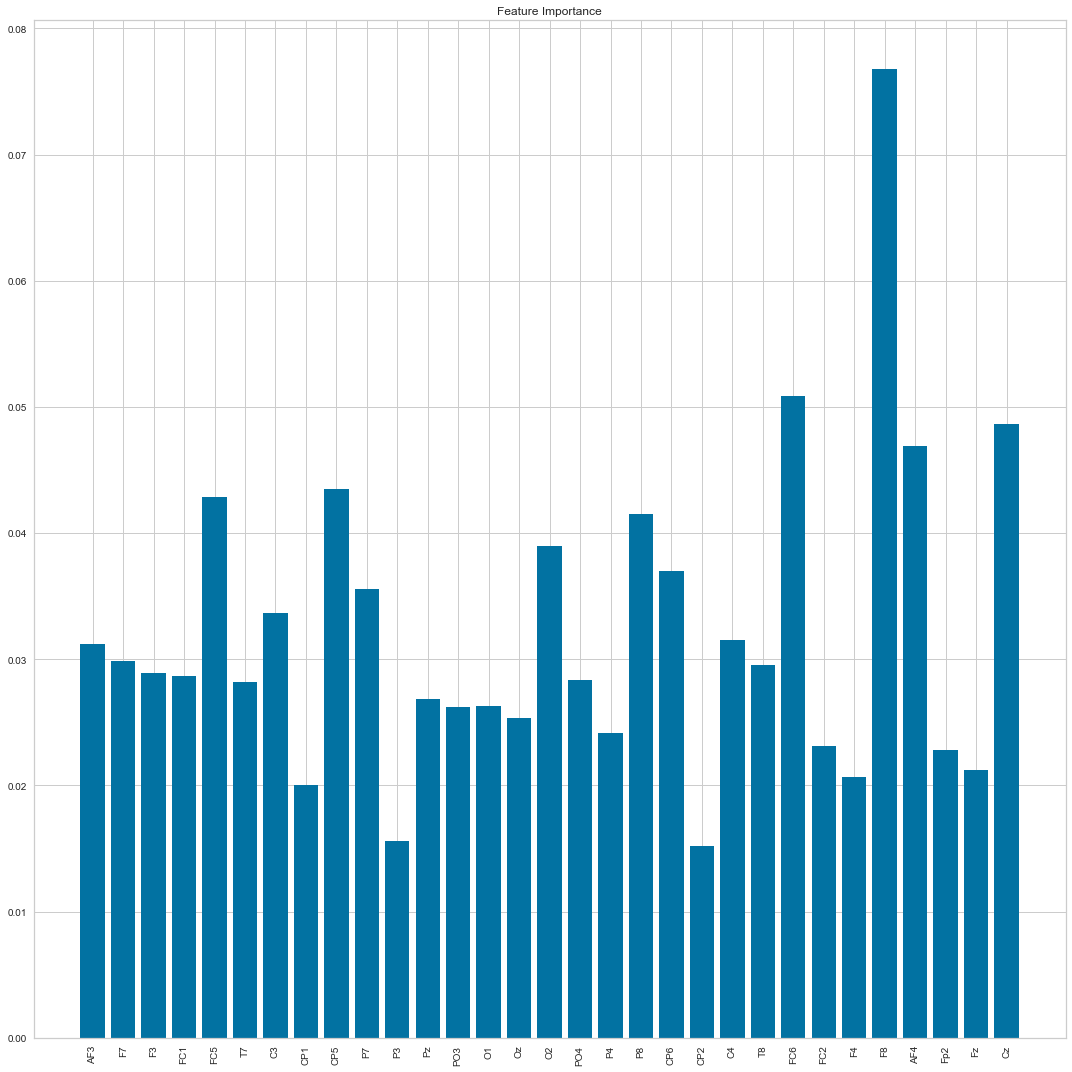

In [140]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

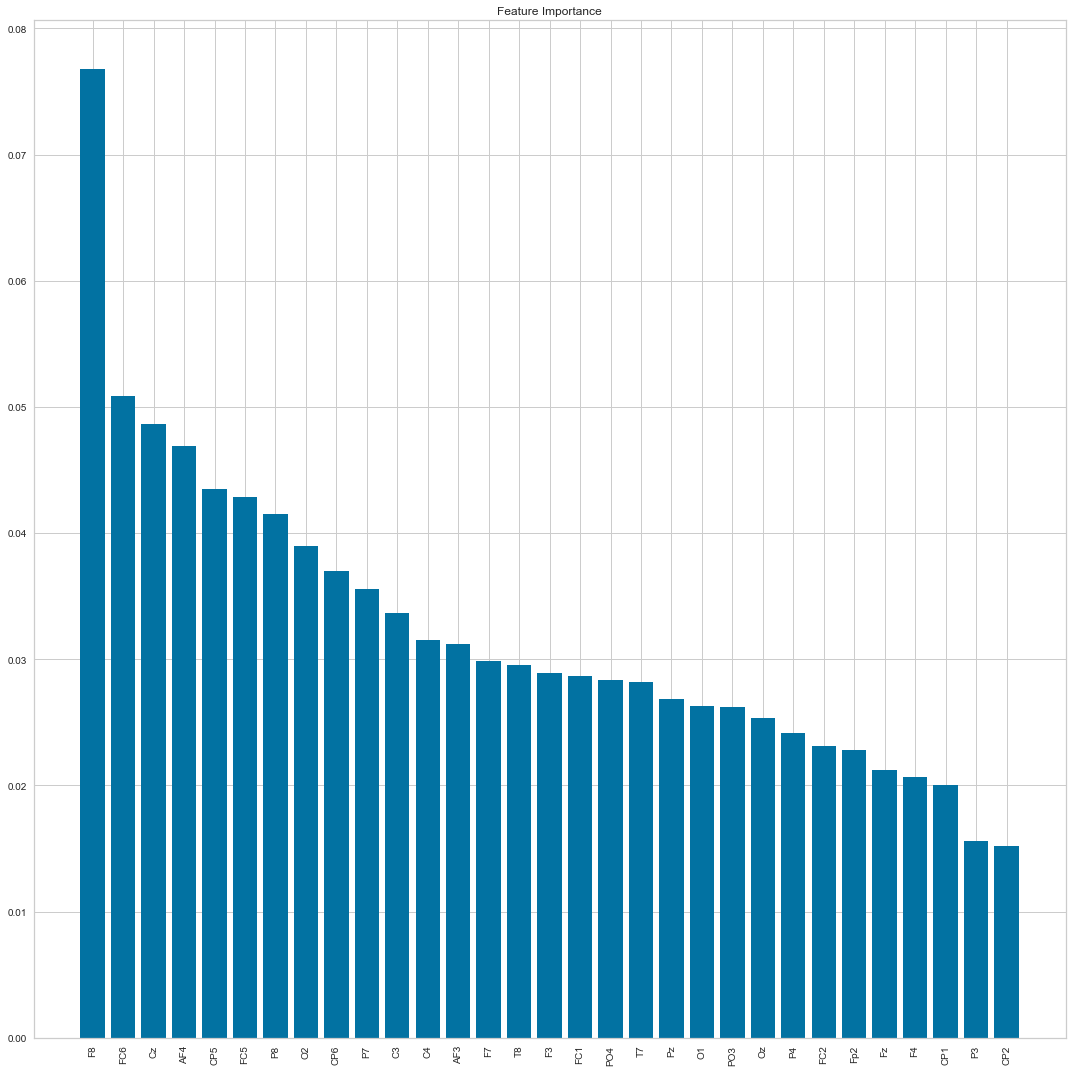

In [141]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [142]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03119473, 0.02987892, 0.02887502, 0.02863754,
       0.04285857, 0.0281962 , 0.03368938, 0.02003084, 0.04351052,
       0.03559598, 0.0155721 , 0.02683431, 0.02622193, 0.02631178,
       0.02534264, 0.03896871, 0.02835776, 0.02416366, 0.04151783,
       0.03695814, 0.01523723, 0.03149244, 0.02952485, 0.05089065,
       0.0231535 , 0.02070737, 0.0767855 , 0.04688881, 0.02279475,
       0.02118864, 0.04861984])

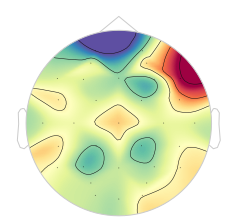

(<matplotlib.image.AxesImage at 0x2ad4610cca0>,
 <matplotlib.contour.QuadContourSet at 0x2ad4610cf40>)

In [143]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>8. Sample Entropy</h2>

In [144]:
samp_ent_pd['Y'] = 1
samp_ent['Y'] = 0

In [145]:
X1 = samp_ent.append(samp_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.582628,0.614241,0.447238,0.569299,0.488091,0.532631,0.485144,0.381798,0.374451,0.581432,...,0.597126,0.554783,0.351066,0.433761,0.553919,0.566720,0.530955,0.508668,0.490510,0
1,0.583185,0.560122,0.440506,0.552947,0.486461,0.511653,0.433857,0.378004,0.393586,0.576374,...,0.618027,0.550460,0.362531,0.430035,0.543375,0.561501,0.559718,0.477255,0.483114,0
2,0.571587,0.539989,0.482044,0.567084,0.485137,0.527220,0.422681,0.378056,0.418751,0.573873,...,0.606687,0.517334,0.345098,0.403887,0.552810,0.569258,0.545561,0.470186,0.492849,0
3,0.573620,0.534649,0.512365,0.550360,0.489326,0.535212,0.438767,0.415559,0.459515,0.590014,...,0.589053,0.528840,0.385214,0.368973,0.521215,0.594823,0.544818,0.487543,0.490200,0
4,0.527894,0.544877,0.481538,0.546149,0.518319,0.529601,0.448878,0.472037,0.451159,0.600163,...,0.592395,0.554378,0.486038,0.353087,0.540221,0.545153,0.523380,0.468574,0.524681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,0.580885,0.490064,0.476380,0.491598,0.497011,0.481560,0.510669,0.444682,0.442216,0.402844,...,0.518516,0.517952,0.483713,0.470965,0.463629,0.518994,0.439554,0.464886,0.444322,1
31412,0.563824,0.478032,0.499227,0.454612,0.475433,0.477537,0.503379,0.439977,0.488757,0.421768,...,0.556680,0.491280,0.464932,0.431747,0.479246,0.533968,0.414391,0.437041,0.485701,1
31413,0.545221,0.478719,0.498772,0.466847,0.485253,0.487664,0.500597,0.440952,0.493275,0.434906,...,0.599668,0.495773,0.471256,0.435262,0.498387,0.528796,0.422073,0.428534,0.497957,1
31414,0.488084,0.456193,0.428045,0.454964,0.484608,0.428787,0.417943,0.459805,0.489676,0.371771,...,0.579658,0.452745,0.475661,0.433958,0.446139,0.488150,0.401621,0.446723,0.504798,1


In [146]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,2514
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [147]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9900,0.9991,0.9922,0.9887,0.9904,0.9799,0.9800,0.6207
et,Extra Trees Classifier,0.9711,0.9963,0.9703,0.9743,0.9723,0.9421,0.9422,0.4187
xgboost,Extreme Gradient Boosting,0.9529,0.9907,0.9585,0.9517,0.9551,0.9057,0.9058,1.7067
rf,Random Forest Classifier,0.9465,0.9889,0.9471,0.9503,0.9487,0.8929,0.8929,0.9553
lightgbm,Light Gradient Boosting Machine,0.9271,0.9803,0.9329,0.9280,0.9304,0.8539,0.8540,0.1627
gbc,Gradient Boosting Classifier,0.8608,0.9345,0.8738,0.8616,0.8676,0.7208,0.7210,1.9940
qda,Quadratic Discriminant Analysis,0.8511,0.9331,0.9080,0.8246,0.8643,0.7002,0.7043,0.0300
dt,Decision Tree Classifier,0.8423,0.8418,0.8527,0.8465,0.8495,0.6838,0.6839,0.1113
ada,Ada Boost Classifier,0.7841,0.8635,0.8107,0.7835,0.7968,0.5667,0.5672,0.4280
lr,Logistic Regression,0.7112,0.7854,0.7289,0.7211,0.7249,0.4210,0.4211,0.0720


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [148]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9884,0.9993,0.9935,0.9845,0.9890,0.9768,0.9768
1,0.9952,0.9998,0.9935,0.9974,0.9954,0.9904,0.9904
2,0.9959,0.9998,0.9961,0.9961,0.9961,0.9918,0.9918
3,0.9911,0.9997,0.9948,0.9883,0.9915,0.9822,0.9822
4,0.9884,0.9979,0.9908,0.9870,0.9889,0.9768,0.9768
5,0.9891,0.9996,0.9935,0.9857,0.9896,0.9781,0.9782
6,0.9932,0.9988,0.9948,0.9922,0.9935,0.9863,0.9863
7,0.9836,0.9983,0.9869,0.9818,0.9844,0.9672,0.9672
8,0.9898,0.9987,0.9908,0.9896,0.9902,0.9795,0.9795


In [149]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9884,0.9995,0.9856,0.9921,0.9889,0.9768,0.9768
1,0.9939,0.9999,0.9882,1.0000,0.9941,0.9877,0.9878
2,0.9959,0.9992,0.9935,0.9987,0.9961,0.9918,0.9918
3,0.9939,0.9998,0.9908,0.9974,0.9941,0.9877,0.9877
4,0.9911,0.9983,0.9882,0.9947,0.9915,0.9822,0.9823
5,0.9918,0.9996,0.9856,0.9987,0.9921,0.9836,0.9837
6,0.9918,0.9989,0.9869,0.9974,0.9921,0.9836,0.9837
7,0.9877,0.9987,0.9830,0.9934,0.9882,0.9754,0.9755
8,0.9884,0.9989,0.9843,0.9934,0.9888,0.9768,0.9768


In [150]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [151]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')


In [152]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9407,0.9877,0.9595,0.9292,0.9441,0.8810,0.8815
1,0.9591,0.9930,0.9595,0.9620,0.9607,0.9180,0.9180
2,0.9543,0.9914,0.9647,0.9486,0.9566,0.9083,0.9085
3,0.9502,0.9918,0.9647,0.9413,0.9529,0.9001,0.9004
4,0.9604,0.9909,0.9608,0.9633,0.9620,0.9207,0.9207
5,0.9584,0.9901,0.9686,0.9524,0.9605,0.9166,0.9167
6,0.9550,0.9905,0.9621,0.9521,0.9571,0.9097,0.9098
7,0.9523,0.9897,0.9595,0.9495,0.9545,0.9043,0.9043
8,0.9598,0.9926,0.9673,0.9561,0.9617,0.9193,0.9194


In [153]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [155]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9788773148148148


In [156]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.51%


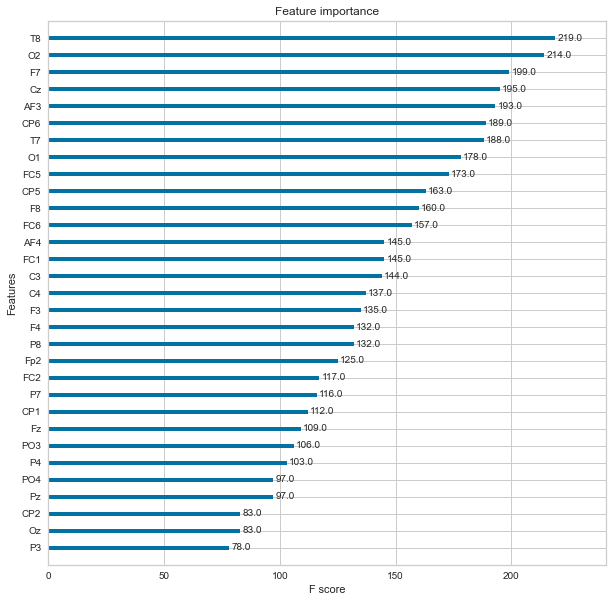

In [157]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

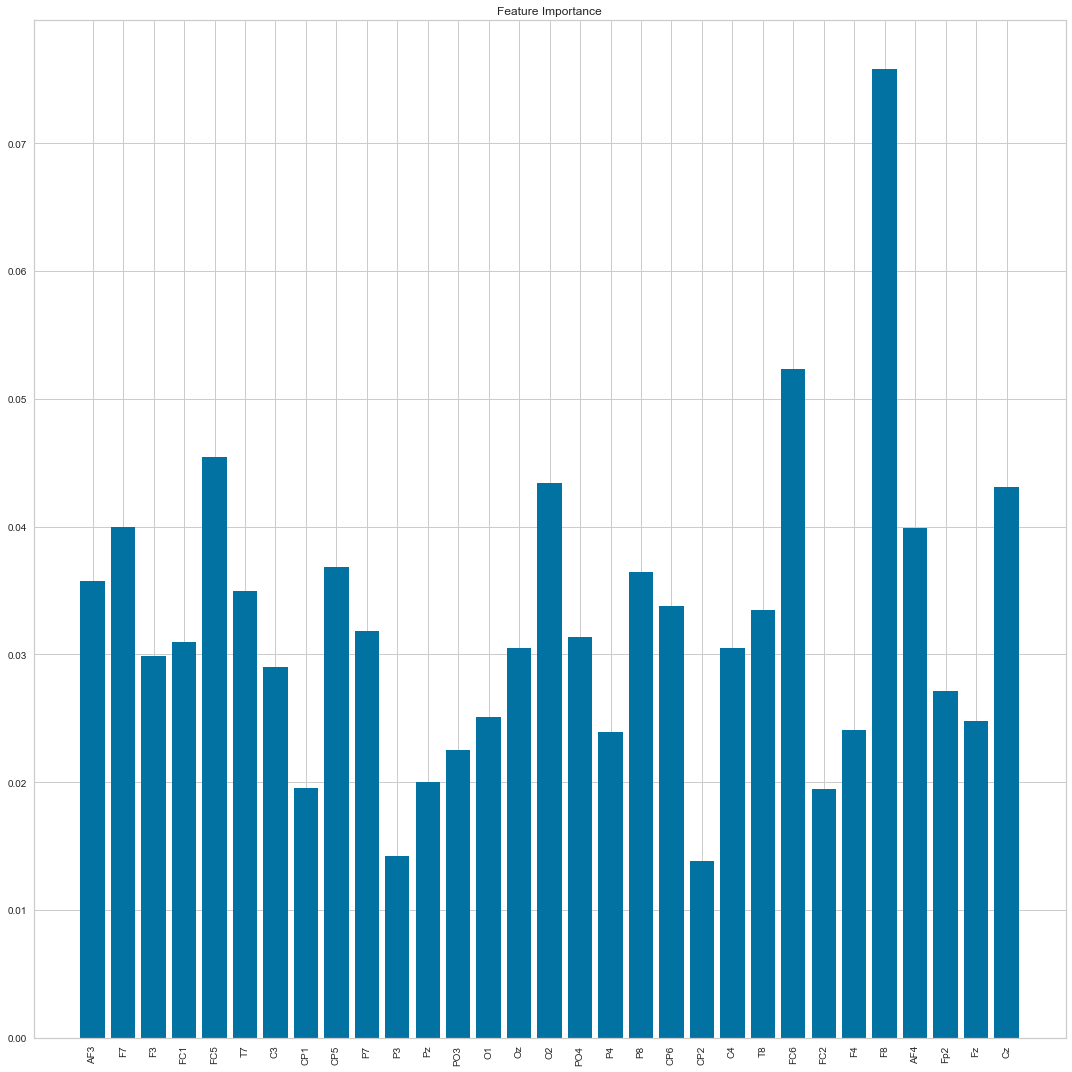

In [158]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

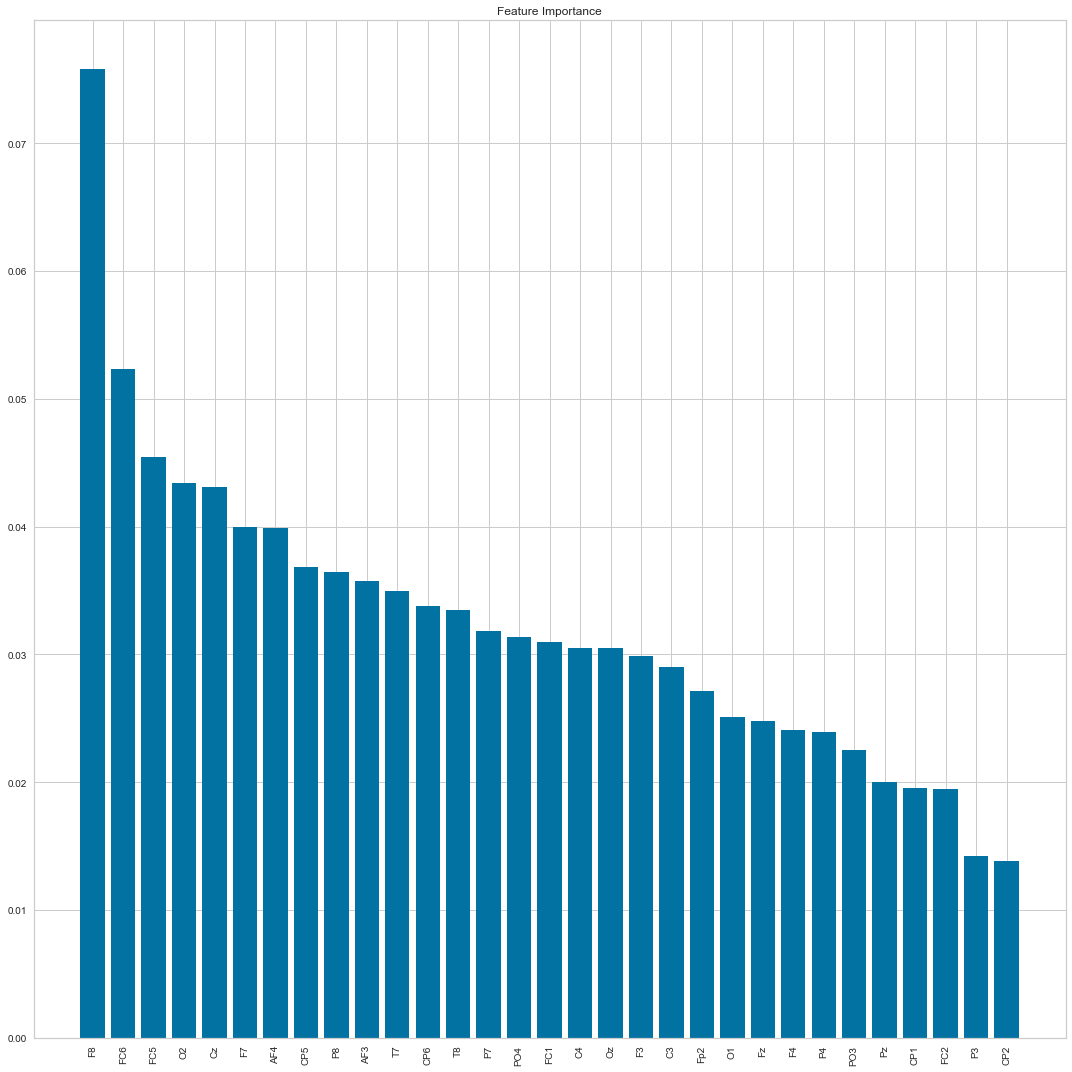

In [159]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [160]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03574744, 0.03997846, 0.02984503, 0.03094612,
       0.04545189, 0.03496288, 0.02900955, 0.0195108 , 0.03683694,
       0.03181736, 0.01422548, 0.02001704, 0.02255635, 0.02512218,
       0.03049026, 0.0433952 , 0.03139824, 0.02396562, 0.0364424 ,
       0.03378528, 0.01386285, 0.03049831, 0.03347648, 0.05235101,
       0.01950017, 0.02408858, 0.07582664, 0.03986251, 0.02713277,
       0.02481513, 0.04308102])

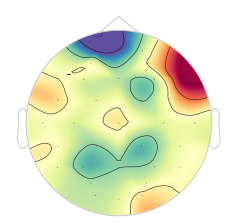

(<matplotlib.image.AxesImage at 0x2ad45db9eb0>,
 <matplotlib.contour.QuadContourSet at 0x2ad460dd310>)

In [161]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>9. Hjorth<h2>

In [162]:
hjorth_pd['Y'] = 1
hjorth['Y'] = 0

In [163]:
X1 = hjorth.append(hjorth_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,"(0.23509864086702706, 1.7016537852098106)","(0.2389916789133262, 1.573095909368606)","(0.1382944775474783, 2.538243768530137)","(0.21082225106143992, 1.7761978590151895)","(0.18283999279027985, 1.8464558266319033)","(0.20005564336469422, 1.6262825664660145)","(0.18825840538570549, 1.7284094986118896)","(0.12791324920830327, 2.8858310625770405)","(0.1081797050867288, 3.3743297891827573)","(0.2145690712291062, 1.682679649149783)",...,"(0.2474819126770867, 1.4512692928818614)","(0.190128077962786, 1.7457142730377457)","(0.0966822532840317, 3.567017480059147)","(0.12759591919550553, 2.560552849944286)","(0.19398163861502724, 2.09943091438472)","(0.20222694457069698, 1.8302572991090051)","(0.1711456497387571, 2.1589406931016732)","(0.17196857120633102, 1.7825439779374004)","(0.15604622354822759, 2.261030059537884)",0
1,"(0.22473453337618343, 1.7687015854157146)","(0.1970427352893741, 1.8808984076206943)","(0.13488210276278542, 2.526149654820842)","(0.20390386538180694, 1.847957058892789)","(0.18625822541370723, 1.7842532789814416)","(0.1880281073827649, 1.723663475430726)","(0.16066932558289765, 1.9636650684493346)","(0.11035682005314099, 3.326741777507837)","(0.10521255784674846, 3.4935714591649507)","(0.22767093962276314, 1.5350870637349616)",...,"(0.2363418379532188, 1.4981316884385034)","(0.18633887556532372, 1.7915160445303517)","(0.094209167617533, 3.639979916983916)","(0.1318513019532175, 2.5546031518754395)","(0.1858544020198199, 2.1731195470425733)","(0.20602415042178265, 1.751590953699859)","(0.1947808329918801, 1.9566133989220629)","(0.17143264883119233, 1.7719399553551147)","(0.15488702238974442, 2.2706319356720392)",0
2,"(0.21540896186317315, 1.8066134400946827)","(0.18411000393573784, 2.0393517217872077)","(0.14962476108871417, 2.289372265965418)","(0.2069512030404091, 1.8151354270949216)","(0.17673629300186022, 1.8004949825024235)","(0.18769985428486866, 1.7080282248566572)","(0.15477899184767732, 2.042790611951186)","(0.10608252949306972, 3.4470407690066893)","(0.1087135613951738, 3.242471748394757)","(0.226637938666271, 1.5110487623478819)",...,"(0.2296102107234201, 1.5239485803700843)","(0.1778986533000398, 1.7931445526068448)","(0.09044506925170444, 3.7946978814996535)","(0.11850593931438122, 2.77754053497176)","(0.19824436760713054, 2.0371514274052434)","(0.2098294653968427, 1.7260993156126443)","(0.19707756039349092, 1.911174373812439)","(0.16495405657216627, 1.839500608551608)","(0.15679957230936653, 2.174003454779873)",0
3,"(0.21747492270593274, 1.7856238988733846)","(0.1821020645869565, 2.0672439102748403)","(0.18247539216612174, 1.842189675027226)","(0.19937684049189916, 1.8145346932466861)","(0.1637884338754405, 1.9895211776648944)","(0.18879198585896007, 1.7279164454677713)","(0.1581146360696983, 2.058372022667972)","(0.11843346289766686, 2.9784274557802153)","(0.11598074489446317, 2.999321835603926)","(0.22372319408212218, 1.5526567423369007)",...,"(0.2319448547676318, 1.5358046324278143)","(0.18553405843031007, 1.7824915086107218)","(0.10211000537752278, 3.3057113730585757)","(0.10695379905571925, 3.0459115167688116)","(0.2004177378127792, 1.9767399656652511)","(0.22572726323165662, 1.5531353675404536)","(0.20157074105417785, 1.833947635213611)","(0.1627576277854818, 1.9006928882377923)","(0.15408468933223582, 2.2094732464690585)",0
4,"(0.20071959394782343, 1.856762572287078)","(0.19258198052120623, 1.9595871010725674)","(0.17287641366250714, 1.9310203036292808)","(0.20440516916818574, 1.744850473007409)","(0.17271899840126825, 1.8749606995236494)","(0.1894617043893342, 1.7111424373154787)","(0.16168529275545168, 2.0146761978027903)","(0.14498106344601436, 2.441558311280497)","(0.1289212305265706, 2.707450674518341)","(0.22306824562541058, 1.583406748344944)",...,"(0.24171061761240997, 1.5034436415950314)","(0.20316901972942128, 1.6693262960791666)","(0.14234507228177554, 2.4108955592455197)","(0.10138030173027757, 3.2290389471

In [164]:
X2 = X1.iloc[:, :-1].applymap(lambda x: (float(x.split(',')[0].split('(')[1]) + float(x.split(',')[1].split(')')[0]))/2)
X2

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.968376,0.906044,1.338269,0.993510,1.014648,0.913169,0.958334,1.506872,1.741255,0.948624,...,0.832327,0.849376,0.967921,1.831850,1.344074,1.146706,1.016242,1.165043,0.977256,1.208538
1,0.996718,1.038971,1.330516,1.025930,0.985256,0.955846,1.062167,1.718549,1.799392,0.881379,...,0.841269,0.867237,0.988927,1.867095,1.343227,1.179487,0.978808,1.075697,0.971686,1.212759
2,1.011011,1.111731,1.219499,1.011043,0.988616,0.947864,1.098785,1.776562,1.675593,0.868843,...,0.820924,0.876779,0.985522,1.942571,1.448023,1.117698,0.967964,1.054126,1.002227,1.165402
3,1.001549,1.124673,1.012333,1.006956,1.076655,0.958354,1.108243,1.548430,1.557651,0.888190,...,0.833448,0.883875,0.984013,1.703911,1.576433,1.088579,0.889431,1.017759,1.031725,1.181779
4,1.028741,1.076085,1.051948,0.974628,1.023840,0.950302,1.088181,1.293270,1.418186,0.903237,...,0.824255,0.872577,0.936248,1.276620,1.665210,1.053448,1.023855,1.051075,1.083694,1.083061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.039054,1.155959,1.104630,1.046730,1.153251,1.156543,1.163259,1.320018,1.127815,1.037952,...,0.950017,0.846636,1.012633,1.070104,1.291754,1.082982,1.055750,1.074434,1.083854,1.206250
31412,1.062619,1.163197,1.123518,1.048564,1.137469,1.157628,1.152805,1.250024,1.010971,1.010733,...,0.940765,0.822361,1.033410,1.077180,1.298466,1.091002,1.043144,1.082834,1.087145,1.094377
31413,1.047732,1.130556,1.115565,1.025052,1.109688,1.105281,1.131260,1.246280,0.997450,1.032163,...,0.940935,0.818194,1.034910,1.070954,1.309589,1.054792,1.019634,1.057552,1.061044,1.012750
31414,1.156424,1.185340,1.291085,1.063881,1.084441,1.345557,1.431296,1.167478,1.024879,1.179990,...,0.982550,0.859499,1.099135,0.975923,1.255552,1.176117,1.125276,1.092872,1.006116,1.017755


In [165]:
X2 = pd.concat([X2, X1.iloc[:, -1]], axis=1)
X2

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.968376,0.906044,1.338269,0.993510,1.014648,0.913169,0.958334,1.506872,1.741255,0.948624,...,0.849376,0.967921,1.831850,1.344074,1.146706,1.016242,1.165043,0.977256,1.208538,0
1,0.996718,1.038971,1.330516,1.025930,0.985256,0.955846,1.062167,1.718549,1.799392,0.881379,...,0.867237,0.988927,1.867095,1.343227,1.179487,0.978808,1.075697,0.971686,1.212759,0
2,1.011011,1.111731,1.219499,1.011043,0.988616,0.947864,1.098785,1.776562,1.675593,0.868843,...,0.876779,0.985522,1.942571,1.448023,1.117698,0.967964,1.054126,1.002227,1.165402,0
3,1.001549,1.124673,1.012333,1.006956,1.076655,0.958354,1.108243,1.548430,1.557651,0.888190,...,0.883875,0.984013,1.703911,1.576433,1.088579,0.889431,1.017759,1.031725,1.181779,0
4,1.028741,1.076085,1.051948,0.974628,1.023840,0.950302,1.088181,1.293270,1.418186,0.903237,...,0.872577,0.936248,1.276620,1.665210,1.053448,1.023855,1.051075,1.083694,1.083061,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.039054,1.155959,1.104630,1.046730,1.153251,1.156543,1.163259,1.320018,1.127815,1.037952,...,0.846636,1.012633,1.070104,1.291754,1.082982,1.055750,1.074434,1.083854,1.206250,1
31412,1.062619,1.163197,1.123518,1.048564,1.137469,1.157628,1.152805,1.250024,1.010971,1.010733,...,0.822361,1.033410,1.077180,1.298466,1.091002,1.043144,1.082834,1.087145,1.094377,1
31413,1.047732,1.130556,1.115565,1.025052,1.109688,1.105281,1.131260,1.246280,0.997450,1.032163,...,0.818194,1.034910,1.070954,1.309589,1.054792,1.019634,1.057552,1.061044,1.012750,1
31414,1.156424,1.185340,1.291085,1.063881,1.084441,1.345557,1.431296,1.167478,1.024879,1.179990,...,0.859499,1.099135,0.975923,1.255552,1.176117,1.125276,1.092872,1.006116,1.017755,1


In [166]:
clf = setup(data=X2, target='Y')

,Description,Value
0,session_id,3515
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [167]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9871,0.9993,0.9940,0.9816,0.9878,0.9742,0.9743,0.4107
knn,K Neighbors Classifier,0.9869,0.9989,0.9910,0.9840,0.9875,0.9737,0.9738,0.5807
xgboost,Extreme Gradient Boosting,0.9789,0.9980,0.9857,0.9743,0.9800,0.9578,0.9579,1.7473
rf,Random Forest Classifier,0.9779,0.9978,0.9860,0.9720,0.9790,0.9556,0.9557,1.0180
lightgbm,Light Gradient Boosting Machine,0.9610,0.9938,0.9720,0.9542,0.9630,0.9217,0.9219,0.1660
gbc,Gradient Boosting Classifier,0.9003,0.9645,0.9336,0.8824,0.9073,0.7997,0.8012,2.0013
dt,Decision Tree Classifier,0.8880,0.8876,0.8953,0.8910,0.8930,0.7754,0.7756,0.1207
ada,Ada Boost Classifier,0.8090,0.8881,0.8366,0.8054,0.8207,0.6166,0.6172,0.4367
lr,Logistic Regression,0.7690,0.8359,0.8027,0.7662,0.7840,0.5359,0.5367,0.1027
ridge,Ridge Classifier,0.7647,0.0000,0.8077,0.7579,0.7819,0.5270,0.5284,0.0147


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3515, verbose=0,
                     warm_start=False)

In [168]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9973,0.9817,0.9703,0.9760,0.9494,0.9495
1,0.9802,0.9981,0.9856,0.9767,0.9811,0.9603,0.9604
2,0.9761,0.9971,0.9869,0.9679,0.9773,0.9521,0.9523
3,0.9782,0.9978,0.9817,0.9766,0.9791,0.9562,0.9563
4,0.9850,0.9982,0.9896,0.9819,0.9857,0.9699,0.9699
5,0.9768,0.9977,0.9869,0.9692,0.9780,0.9535,0.9537
6,0.9802,0.9986,0.9909,0.9718,0.9813,0.9603,0.9605
7,0.9816,0.9981,0.9896,0.9755,0.9825,0.9631,0.9632
8,0.9741,0.9980,0.9830,0.9679,0.9754,0.9480,0.9481


In [169]:
et = create_model('et', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9877,0.9990,0.9883,0.9883,0.9883,0.9754,0.9754
1,0.9864,0.9992,0.9935,0.9806,0.9870,0.9726,0.9727
2,0.9857,0.9994,0.9935,0.9794,0.9864,0.9713,0.9714
3,0.9870,0.9993,0.9895,0.9857,0.9876,0.9740,0.9740
4,0.9932,0.9997,0.9987,0.9884,0.9935,0.9863,0.9864
5,0.9850,0.9992,0.9935,0.9781,0.9858,0.9699,0.9700
6,0.9864,0.9995,0.9974,0.9770,0.9871,0.9726,0.9729
7,0.9911,0.9998,0.9948,0.9883,0.9915,0.9822,0.9822
8,0.9816,0.9993,0.9935,0.9719,0.9826,0.9631,0.9633


In [170]:
X3 = X2.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [171]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
31411    1
31412    1
31413    1
31414    1
31415    1
Name: Y, Length: 31416, dtype: int64

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [173]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9776234567901234


In [174]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.97%


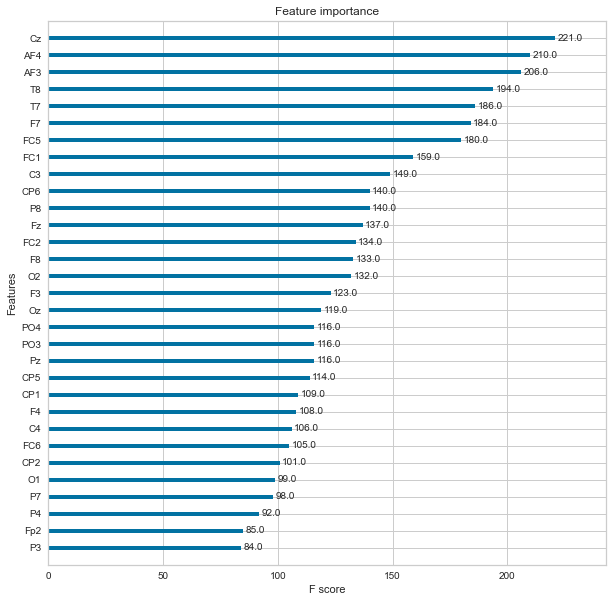

In [175]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

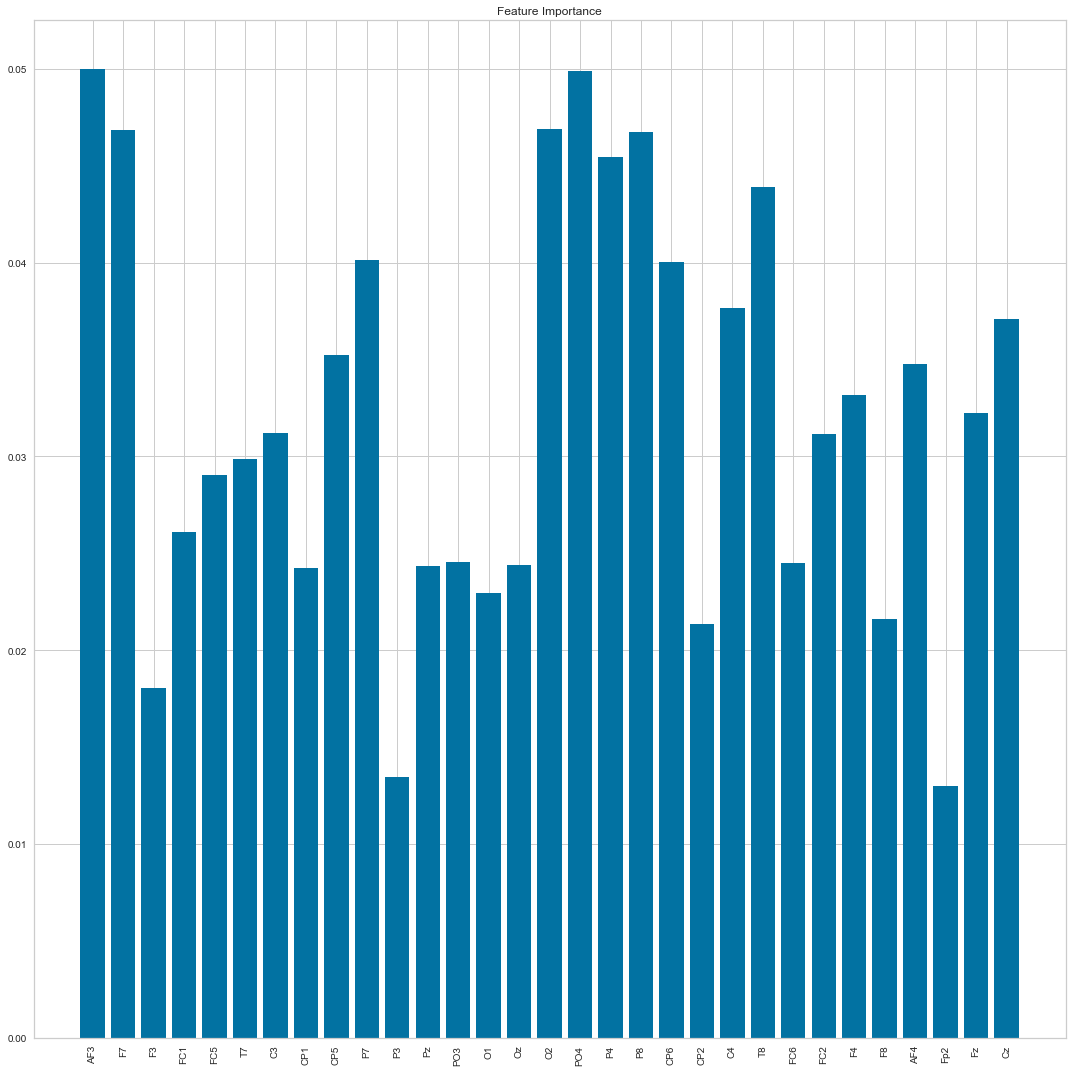

In [176]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

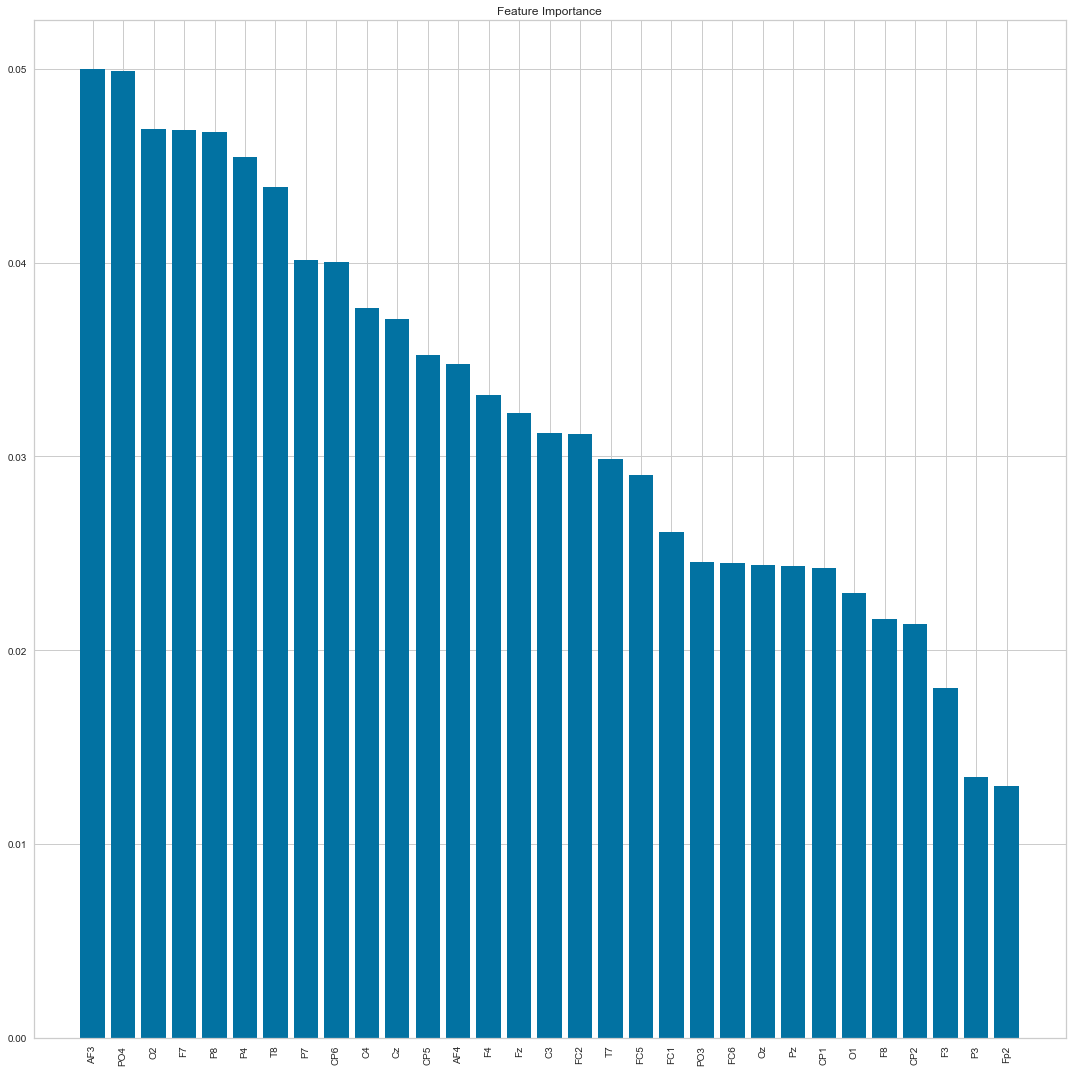

In [177]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [178]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.0500025 , 0.04685898, 0.01805187, 0.02610217,
       0.02905219, 0.02986235, 0.03121786, 0.02423387, 0.03521512,
       0.0401641 , 0.01344282, 0.02436904, 0.02457133, 0.02294738,
       0.02441499, 0.04691346, 0.0498966 , 0.04544057, 0.04674741,
       0.04002129, 0.02133779, 0.03764303, 0.04390533, 0.02451328,
       0.03113557, 0.03317319, 0.02159072, 0.034777  , 0.01301849,
       0.03226214, 0.03711754])

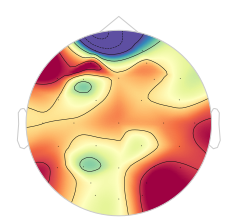

(<matplotlib.image.AxesImage at 0x2ad46149a60>,
 <matplotlib.contour.QuadContourSet at 0x2ad46149970>)

In [179]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>10. Num Zero Crossings</h2>

In [180]:
num_zero_pd['Y'] = 1
num_zero['Y'] = 0

In [181]:
X1 = num_zero.append(num_zero_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,35,31,17,27,17,35,16,13,15,32,...,42,33,25,20,25,29,23,33,23,0
1,32,27,18,32,18,36,15,14,15,35,...,42,37,19,24,25,32,26,36,23,0
2,32,25,25,35,19,34,13,15,20,34,...,42,40,15,22,26,32,27,35,23,0
3,31,25,26,31,19,33,18,17,22,34,...,46,41,18,22,30,34,28,35,25,0
4,26,27,22,33,22,32,20,21,22,34,...,48,43,19,19,30,30,29,33,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,25,29,30,30,18,28,29,15,25,25,...,46,28,22,20,24,21,24,24,20,1
31412,25,28,30,24,16,26,26,18,28,24,...,49,28,22,17,24,22,20,22,20,1
31413,25,30,29,24,18,29,25,20,25,23,...,53,29,23,17,28,20,20,22,20,1
31414,23,29,24,24,18,26,20,22,25,21,...,49,26,27,19,27,20,20,22,20,1


In [182]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,5254
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [183]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9950,0.9998,0.9967,0.9937,0.9952,0.9899,0.9899,0.5333
et,Extra Trees Classifier,0.9876,0.9992,0.9917,0.9846,0.9881,0.9751,0.9752,0.3800
rf,Random Forest Classifier,0.9701,0.9962,0.9759,0.9670,0.9715,0.9400,0.9401,0.4893
xgboost,Extreme Gradient Boosting,0.9696,0.9959,0.9768,0.9654,0.9711,0.9391,0.9392,0.4173
lightgbm,Light Gradient Boosting Machine,0.9438,0.9881,0.9533,0.9399,0.9465,0.8873,0.8874,0.0933
qda,Quadratic Discriminant Analysis,0.8961,0.9613,0.9075,0.8949,0.9012,0.7917,0.7919,0.0293
dt,Decision Tree Classifier,0.8759,0.8759,0.8770,0.8844,0.8806,0.7515,0.7516,0.0520
gbc,Gradient Boosting Classifier,0.8688,0.9423,0.8939,0.8602,0.8767,0.7366,0.7373,0.6767
ada,Ada Boost Classifier,0.7873,0.8703,0.8259,0.7798,0.8021,0.5727,0.5739,0.1647
ridge,Ridge Classifier,0.7271,0.0000,0.7658,0.7262,0.7453,0.4517,0.4527,0.0153


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [184]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9952,0.9999,0.9974,0.9935,0.9954,0.9904,0.9904
1,0.9966,0.9999,0.9948,0.9987,0.9967,0.9932,0.9932
2,0.9959,0.9999,0.9974,0.9948,0.9961,0.9918,0.9918
3,0.9966,0.9999,0.9987,0.9948,0.9967,0.9932,0.9932
4,0.9918,0.9998,0.9935,0.9909,0.9922,0.9836,0.9836
5,0.9911,0.9992,0.9974,0.9858,0.9916,0.9822,0.9823
6,0.9959,0.9999,0.9974,0.9948,0.9961,0.9918,0.9918
7,0.9939,0.9999,0.9987,0.9896,0.9941,0.9877,0.9877
8,0.9980,1.0000,0.9987,0.9974,0.9980,0.9959,0.9959


In [185]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9986,1.0000,1.0000,0.9974,0.9987,0.9973,0.9973
1,0.9993,1.0000,0.9987,1.0000,0.9993,0.9986,0.9986
2,0.9980,0.9993,0.9987,0.9974,0.9980,0.9959,0.9959
3,0.9986,1.0000,0.9987,0.9987,0.9987,0.9973,0.9973
4,0.9973,1.0000,0.9974,0.9974,0.9974,0.9945,0.9945
5,0.9966,0.9986,0.9987,0.9948,0.9967,0.9932,0.9932
6,0.9986,1.0000,0.9987,0.9987,0.9987,0.9973,0.9973
7,0.9973,1.0000,1.0000,0.9948,0.9974,0.9945,0.9945
8,0.9993,1.0000,0.9987,1.0000,0.9993,0.9986,0.9986


In [186]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9686,0.9972,0.9804,0.9603,0.9702,0.9371,0.9373
1,0.9584,0.9949,0.9634,0.9571,0.9603,0.9166,0.9166
2,0.9693,0.9964,0.9778,0.9639,0.9708,0.9385,0.9386
3,0.9645,0.9929,0.9699,0.9624,0.9661,0.9289,0.9289
4,0.9748,0.9950,0.9830,0.9691,0.9760,0.9494,0.9495
5,0.9754,0.9975,0.9830,0.9703,0.9766,0.9508,0.9509
6,0.9700,0.9963,0.9791,0.9640,0.9715,0.9398,0.9399
7,0.9754,0.9974,0.9817,0.9715,0.9766,0.9508,0.9508
8,0.9782,0.9974,0.9869,0.9717,0.9792,0.9562,0.9564


In [187]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [189]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9875578703703703


In [190]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.02%


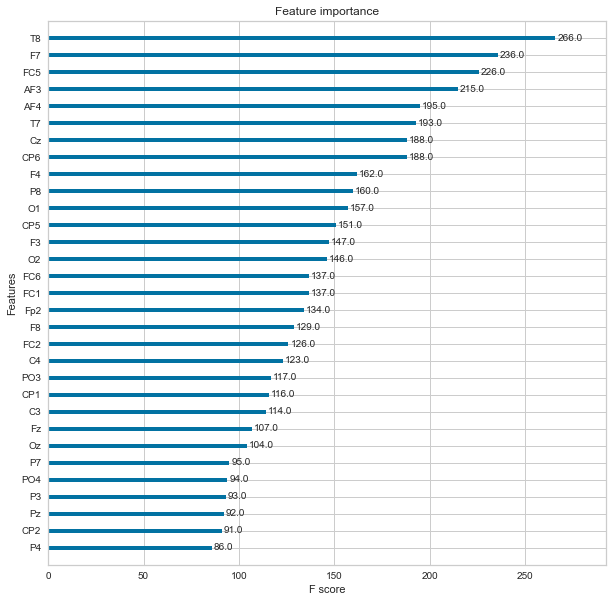

In [191]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

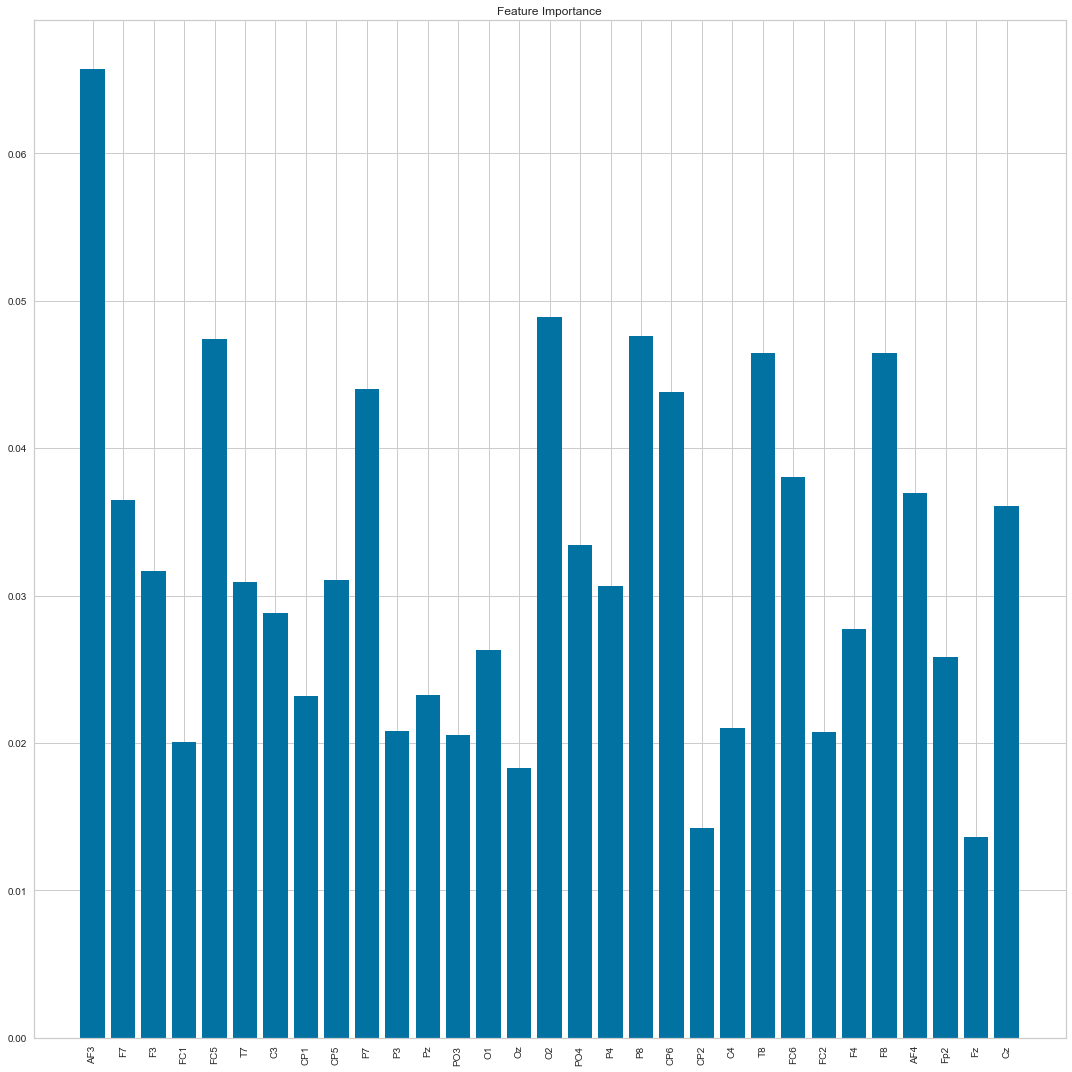

In [192]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

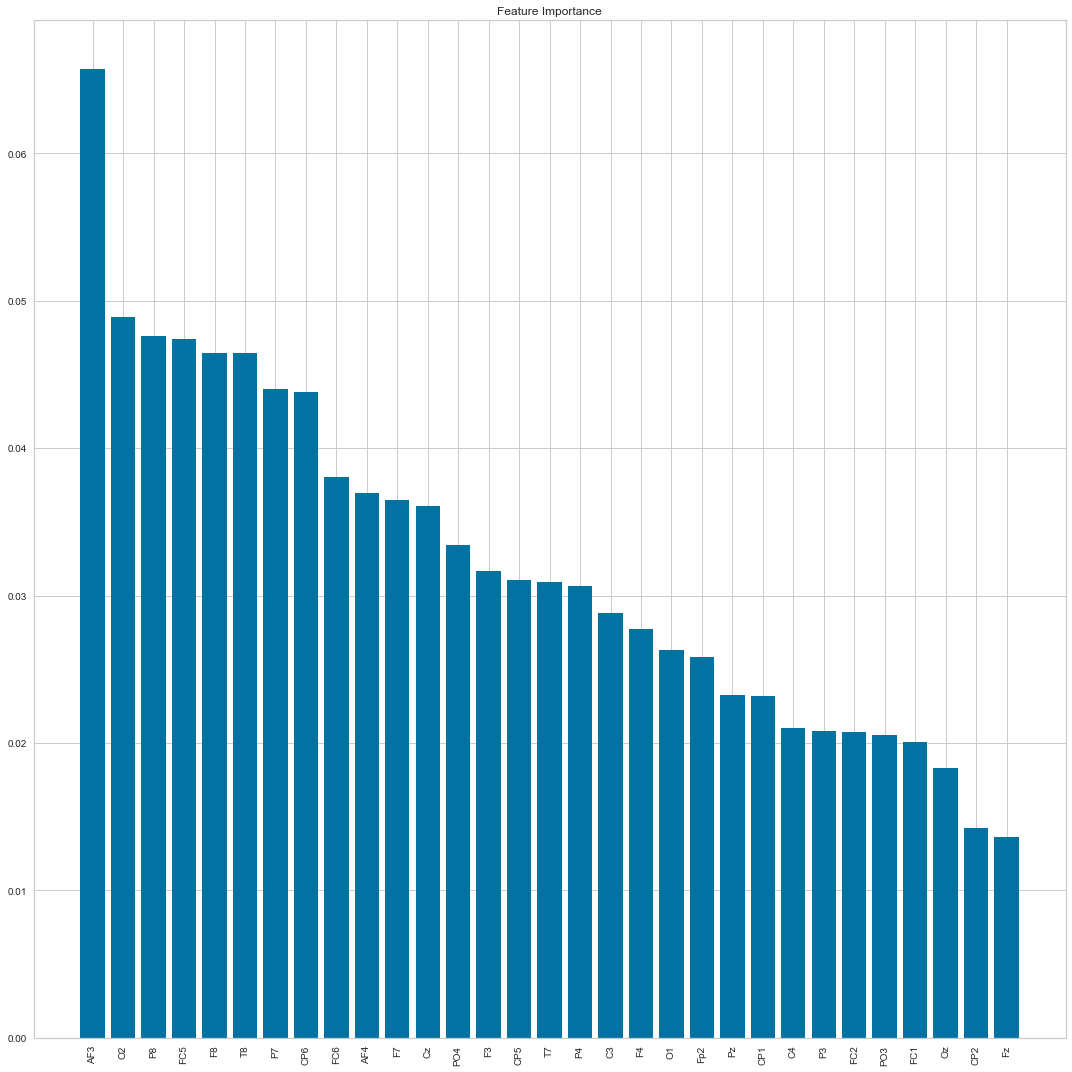

In [193]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [194]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.06571983, 0.03649154, 0.03167059, 0.02004117,
       0.04738118, 0.03091466, 0.02881664, 0.02318799, 0.0310653 ,
       0.04404097, 0.02078023, 0.02325117, 0.02052019, 0.02627162,
       0.01826871, 0.04891922, 0.03343768, 0.03065583, 0.04760298,
       0.04380414, 0.01421337, 0.02102962, 0.04645437, 0.03803329,
       0.02072167, 0.02774038, 0.04646875, 0.03696357, 0.02585006,
       0.01361674, 0.03606643])

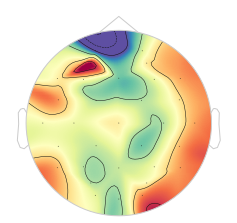

(<matplotlib.image.AxesImage at 0x2ad45aca190>,
 <matplotlib.contour.QuadContourSet at 0x2ad45aca460>)

In [195]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>12. Detrended Fluctuation </h2>

In [196]:
det_fluc_pd['Y'] = 1
det_fluc['Y'] = 0

In [197]:
X1 = det_fluc.append(det_fluc_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.380256,1.488126,1.649236,1.494442,1.590985,1.603191,1.633116,1.533686,1.524974,1.548991,...,1.504753,1.608704,1.617063,1.591630,1.461176,1.524330,1.521949,1.599900,1.593243,0
1,1.383177,1.436692,1.608022,1.489039,1.558199,1.608659,1.639360,1.594404,1.502572,1.535177,...,1.491832,1.563374,1.602164,1.626429,1.439995,1.528798,1.474631,1.543713,1.562020,0
2,1.409752,1.458431,1.600342,1.519146,1.594245,1.648993,1.639111,1.573934,1.508335,1.498072,...,1.524516,1.628937,1.591778,1.613667,1.475830,1.581943,1.539003,1.583211,1.530354,0
3,1.399992,1.470498,1.565102,1.541624,1.638368,1.630962,1.648737,1.545116,1.572608,1.480441,...,1.506958,1.577103,1.599725,1.591576,1.451109,1.501421,1.492131,1.566339,1.564976,0
4,1.411446,1.477599,1.664193,1.534740,1.571277,1.657381,1.671368,1.595824,1.583559,1.489984,...,1.484342,1.536206,1.610764,1.610511,1.489340,1.513806,1.522189,1.575189,1.574359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,1.516513,1.571588,1.668754,1.599591,1.670982,1.654889,1.630406,1.705523,1.724706,1.797992,...,1.313172,1.561152,1.661332,1.601771,1.631688,1.620621,1.672485,1.668042,1.608861,1
31412,1.616128,1.620249,1.718683,1.680569,1.696918,1.747919,1.709056,1.712759,1.707205,1.771055,...,1.337368,1.595430,1.672020,1.649586,1.720902,1.692151,1.750257,1.701005,1.676513,1
31413,1.589889,1.579825,1.688988,1.623843,1.634895,1.705226,1.707566,1.727324,1.660552,1.742616,...,1.314716,1.611698,1.689628,1.640909,1.674572,1.662880,1.712008,1.676120,1.711682,1
31414,1.614818,1.609475,1.701359,1.699445,1.669413,1.708116,1.717292,1.721312,1.682921,1.760733,...,1.375090,1.660163,1.686902,1.689636,1.694648,1.684614,1.730299,1.707050,1.672207,1


In [198]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,5138
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(31416, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [199]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9904,0.9989,0.9877,0.9940,0.9908,0.9808,0.9808,0.3313
xgboost,Extreme Gradient Boosting,0.9787,0.9977,0.9778,0.9815,0.9796,0.9574,0.9574,1.6753
et,Extra Trees Classifier,0.9736,0.9971,0.9660,0.9834,0.9746,0.9472,0.9474,0.3720
rf,Random Forest Classifier,0.9665,0.9948,0.9609,0.9748,0.9678,0.9330,0.9331,0.8967
lightgbm,Light Gradient Boosting Machine,0.9659,0.9947,0.9647,0.9701,0.9674,0.9318,0.9318,0.1627
qda,Quadratic Discriminant Analysis,0.9456,0.9853,0.9412,0.9543,0.9477,0.8911,0.8912,0.0300
gbc,Gradient Boosting Classifier,0.9141,0.9715,0.9116,0.9235,0.9174,0.8279,0.8282,1.9553
dt,Decision Tree Classifier,0.8949,0.8945,0.9015,0.8981,0.8998,0.7892,0.7893,0.1080
ada,Ada Boost Classifier,0.8362,0.9135,0.8537,0.8369,0.8451,0.6713,0.6716,0.4220
ridge,Ridge Classifier,0.8110,0.0000,0.8313,0.8123,0.8216,0.6207,0.6211,0.0140


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [200]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9877,0.9988,0.9857,0.9908,0.9883,0.9754,0.9754
1,0.9843,0.9986,0.9778,0.9921,0.9849,0.9686,0.9687
2,0.9905,0.9997,0.9870,0.9947,0.9908,0.9809,0.9809
3,0.9918,0.9998,0.9909,0.9935,0.9922,0.9836,0.9836
4,0.9939,0.9998,0.9909,0.9974,0.9941,0.9877,0.9877
5,0.9891,0.9970,0.9909,0.9883,0.9896,0.9781,0.9781
6,0.9939,0.9991,0.9922,0.9961,0.9941,0.9877,0.9877
7,0.9911,0.9990,0.9870,0.9961,0.9915,0.9822,0.9823
8,0.9911,0.9969,0.9870,0.9961,0.9915,0.9822,0.9823


In [201]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9673,0.9962,0.9674,0.9700,0.9687,0.9344,0.9344
1,0.9768,0.9963,0.9739,0.9816,0.9777,0.9535,0.9536
2,0.9761,0.9973,0.9752,0.9791,0.9771,0.9522,0.9522
3,0.9775,0.9980,0.9765,0.9804,0.9784,0.9549,0.9549
4,0.9809,0.9982,0.9804,0.9830,0.9817,0.9617,0.9617
5,0.9870,0.9989,0.9896,0.9857,0.9876,0.9740,0.9740
6,0.9782,0.9979,0.9765,0.9817,0.9791,0.9563,0.9563
7,0.9795,0.9973,0.9753,0.9855,0.9804,0.9590,0.9591
8,0.9823,0.9979,0.9805,0.9856,0.9830,0.9645,0.9645


In [202]:
X3 = X2.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [203]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
31411    1
31412    1
31413    1
31414    1
31415    1
Name: Y, Length: 31416, dtype: int64

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [205]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9776234567901234


In [206]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.97%


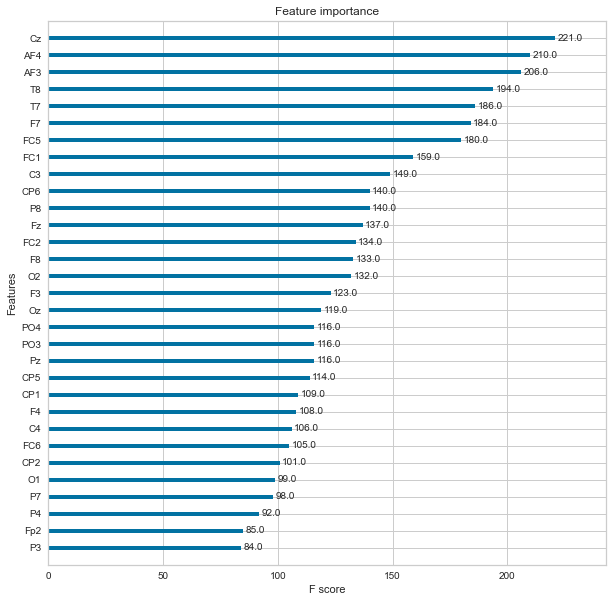

In [207]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

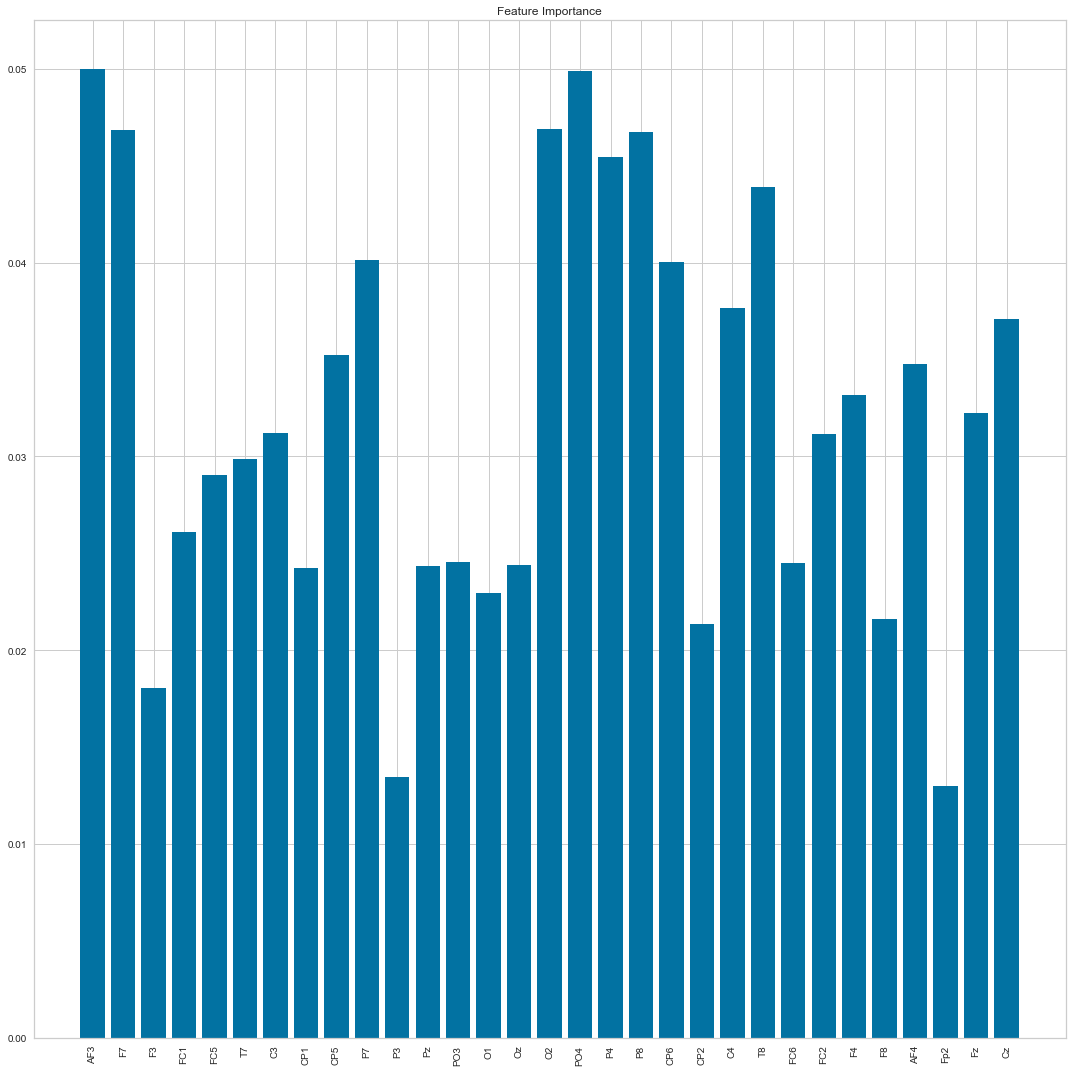

In [208]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

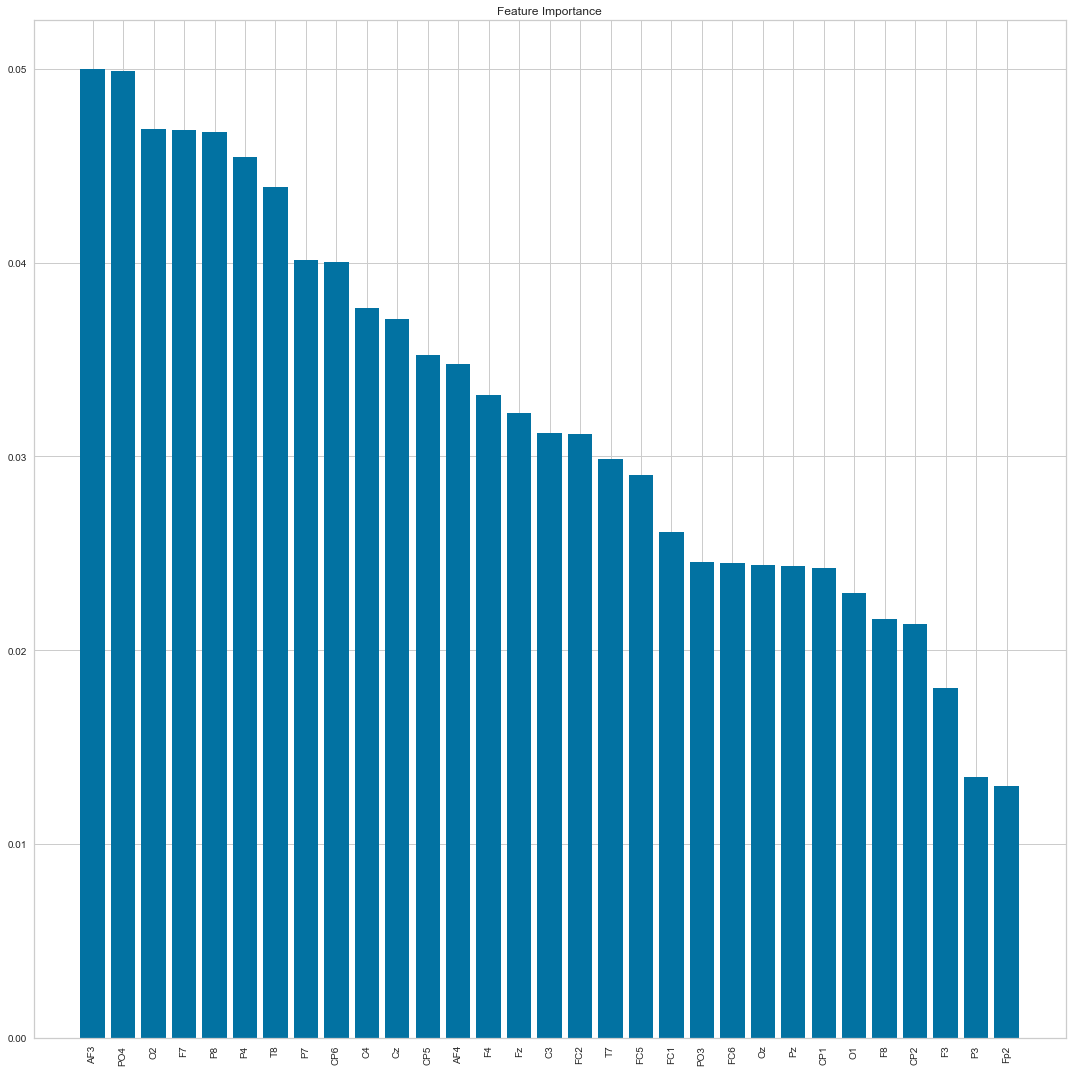

In [209]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [210]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.0500025 , 0.04685898, 0.01805187, 0.02610217,
       0.02905219, 0.02986235, 0.03121786, 0.02423387, 0.03521512,
       0.0401641 , 0.01344282, 0.02436904, 0.02457133, 0.02294738,
       0.02441499, 0.04691346, 0.0498966 , 0.04544057, 0.04674741,
       0.04002129, 0.02133779, 0.03764303, 0.04390533, 0.02451328,
       0.03113557, 0.03317319, 0.02159072, 0.034777  , 0.01301849,
       0.03226214, 0.03711754])

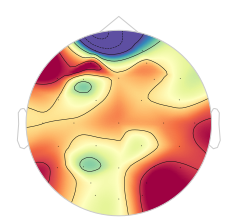

(<matplotlib.image.AxesImage at 0x2ad3fb161c0>,
 <matplotlib.contour.QuadContourSet at 0x2ad3fb168e0>)

In [211]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)